In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
##for missing data
import missingno
# from thefuzz import fuzz

In [3]:
f2student2_raw = pd.read_csv("../HSLS New/HSLS/F2STUDENT2.csv")

C:\Users\offli\AppData\Local\Temp\ipykernel_8508\1104685557.py:1: DtypeWarning: Columns (1195,1216,1223,1229,1303,1479,1544,1698,1704,1827,1852,1854,1872) have mixed types. Specify dtype option on import or set low_memory=False.
  f2student2_raw = pd.read_csv("../HSLS New/HSLS/F2STUDENT2.csv")


In [4]:
f2student2_raw

,STU_ID,SCH_ID,X1NCESID,X2NCESID,STRAT_ID,PSU,X2UNIV1,X2UNIV2A,X2UNIV2B,X3UNIV1,...,X5PFYNETPRICEGRT_IM,X5PFYPELLPACK_IM,X5PFYTOTLOAN_IM,X5PFYTOTLOAN2_IM,X5PFYTOTLOAN3_IM,X5EVRFEDAPP_IM,X5FEDAPP14_IM,X5FEDAPP15_IM,X5FEDAPP16_IM,X5PFYTUITION_IM
0,10001,1723,271026000642,271026000642,398,1,11,1,1,1111,...,0,0,0,0,0,0,0,0,0,0
1,10002,1024,421230006126,421230006126,249,2,11,1,1,1111,...,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8
2,10003,1768,060816001122,060816001122,117,2,11,1,1,1111,...,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8
3,10004,1464,240006090441,240006090441,420,1,10,1,7,1001,...,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6
4,10005,1244,010180000631,010180000631,405,1,11,1,1,1111,...,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25201,35202,1197,481119000582,481119008711,287,2,11,1,6,1111,...,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8
25202,35203,1273,422415002184,422415002184,243,1,11,1,1,1111,...,-6,-6,-6,-6,-6,-6,-6,-6,-6,-6
25203,35204,1498,00809484,317011002240,487,1,11,1,1,1111,...,0,0,0,0,0,0,0,0,0,0
25204,35205,1322,172307002544,172307002544,380,2,11,1,1,1111,...,2,2,0,0,0,2,2,2,2,0


In [276]:
f2student2 = f2student2_raw.copy()

# Selected variables 

* Personal
    * Student's sex (X1SEX)
    * Student's race (X1RACE)
    * X4DISABLED
* Parents
    * Parent 1: highest level of education (X1PAR1EDU) 
    * Parent 2: highest level of education (X1PAR2EDU)
* Socio-economic status: X1SES (there is also an X1SES_U version and a revised X4 version)
* GPAs
    * GPAENG, 
    * GPAMAT, 
    * GPASCI, 
    * GPALANG (foreign language),
    * Aggregated GPAs: 
        * GPASOCST (social studies), 
        * GPAART (fine arts), 
        * GPASTEM (STEM),
        * GPACTE (CTE courses),
        * GPAACAD (for all academic courses),
        * GPANONA (for non-acadmeic courses)
        * Overal GPA - honor weigted version
        * GPAs for 9th, 10th, 11th, 12th grades
* Standardized mathematics theta score: X1TXMTSCOR and X2TXMTSCOR
* Student's expectations:
   * X2REQLEVEL: Highest level of education student indicates will meet minimum requirements
   * X2STUEDEXPCT: How far in school sample member thinks he/she will get
* Other student-level:
    * X2BEHAVEIN: Scale of school motivation (S2LATESCH, S2SKIPCLASS, S2INSCHSUSP, S2ABSENT, S2WOHWDN, S2WOPAPER, S2WOBOOK)
    * X4HSCLGCRED: Ever took courses for college credit in high school
    * X1SCHOOLBEL: Scale of student's sense of school belonging (S1SAFE, S1PROUD, S1TALKPROB, S1SCHWASTE, and S1GOODGRADES)
    * X1SCHOOLENG: Scale of student's school engagement (S1NOHWDN, S1NOPAPER, S1NOBOOKS, and S1LATE)
    * S1PAYOFF: 9th grader thinks studying in school rarely pays off later with good job
    * S1NOTALKPRB: 9th grader didn't talk to these people (parents, friends, teachers, counselor) about personal problems
    * S1FRNDSCHOOL: 9th grader's closest friend is interested in school
    * S1HRVIDEO: Hours spent playing video games on typical schoolday
    * S1HRONLINE: Hours spent chatting or surfing online on typical schoolday
    * S1FYBA: 9th grader plans to enroll in Bachelor's program in 1st year after HS
    * S2CLGSEARCH: Searched Internet or read college guides for college options
    * _S2DOOKAY_: Teen thinks people can do OK even if they drop out of high school
* School related:
    * X1LOCALE: locale (urbanicity: city, suburb, town, rural) 
    * X2REGION (Northest, Midwest, South, West)
    * A1FREELUNCH: % of student body receiving free or reduced-price lunch
    * X2PROBLEM: Scale of the administrator's assessment of his/her school's problems (A2TARDY, A2STUABSENT, A2CUT, A2DROPOUT, A2APATHY, A2PRNTINV, A2RESOURCES, A2UNPREP, A2HEALTH)
    * X1SCHOOLCLI: Scale of administrator's assessment of school climate (A1CONFLICT, A1ROBBERY, A1VANDALISM, A1DRUGUSE, A1ALCOHOL, A1DRUGSALE, A1WEAPONS, A1PHYSABUSE, A1TENSION, A1BULLY, A1VERBAL, A1MISBEHAVE, A1DISRESPECT, and A1GANG)
    * A1ADA: Average daily attendance percentage for high school students
    * A2HIGHERED: % of 2010-2011 seniors entered higher education programs
    * C1CASELOAD: Average caseload for school's counselors

__Math/Science specific variables__
* X2MEFFORT, X2SEFFORT: Scale of math/science class effort (S2MATTENTION, S2MONTIME, S2MSTOPTRYING, S2MGETBY)
* X2MTHID, X2SCIID: Scale of student's mathematics/science identity ("You see yourself as a math/science person" and/or "Others see me as a math/science person")  
* X2MTHUTI, X2SCIUTI: Scale of student's mathematics/science utility (S2MUSELIFE, S2MUSECLG, and S2MUSEJOB)
* X2MTHEFF: Scale of student's mathematics/science self-efficacy (S2MTESTS, S2MTEXTBOOK, S2MSKILLS, and S2MASSEXCL)
* X2MTHINT_R, X2SCIINT: Scale of student's interest in fall 2009 math/science course (S2MENJOYING, S2MWASTE, S2MBORING, S2FAVSUBJ, and S2MENJOYS)
* S2SBORN, S2MBORN: You have to be born with the ability to be good at math/science
* S1NOMSACT: 9th grader did not participate in any math/science activities listed (club, competition, camp, study groupy)
* A1MTHSCIFAIR: School holds math or science fairs/workshops/competitions
* A1MSSUMMER: School partners w/ college/university that offers math/science summer program
* A1MSSPEAKER: School brings in guest speakers to talk about math or science
* _X2S2SSPR12_ Taking science/comp science tech couses: TODO: binary
* S1TEFRNDS: Time/effort in math/science means not enough time with friends
* About math, sci teacher:
    * S1MTCHINTRST S1STCHINTRST: 9th grader's fall 2009 math/science teacher makes math/science interesting, easy to understand 
    * S1MTCHEASY S1STCHEASY: 9th grader's fall 2009 math/science teacher makes math/science easy to understand
    * for future consideration: M1SEX, M1GIVEUP M1EXPLAIN N1SEX, N1GIVEUP


__Target variables__
1. Went to college: X4EVRATNDCLG (ever attended college)
2. Type Sector, level, e.g. X4PS1SECTOR, X4PS1LEVEL, X4PS1CTRL, __X4PS1SELECT__ (suggested: sector of 1st, X5PFYSEC, Category and sector X5PFYINSTCAT2, duplicated if attended more colleges: I5CONTROL, I5SECTOR, I5SELC)
3. Chose STEM as major: __X4ENTMJST__ X4ENTMJSTNSF (suggested initial intention S4FIELD or S4FIELD2)

In [921]:
selected_vars = ['X1SEX', 'X1RACE', 'X1TXMTSCOR', 'X2TXMTSCOR',
                 'X1PAR1EDU', 'X1PAR2EDU', 'X1SES', 'X2PROBLEM', 'X2BEHAVEIN', 
                 'X1STUEDEXPCT', 'X2REQLEVEL', 
                 'X3TGPAENG', 'X3TGPAMAT', 'X3TGPASCI', 'X3TGPASOCST', 'X3TGPAART', 'X3TGPALANG', 
                 'X3TGPAACAD', 'X3TGPACTE', 'X3TGPANONA', 'X3TGPASTEM', 
                 'X3TGPAWGT', 'X3TGPA9TH', 'X3TGPA10TH', 'X3TAGPA11', 'X3TAGPA12', 
                 'X4HSCLGCRED', 'X4DISABLED', 'X1SCHOOLBEL', 'X1SCHOOLENG', 'S1PAYOFF', 
                 'S1NOTALKPRB', 'S1FRNDSCHOOL', 'S1HRVIDEO', 'S1HRONLINE', 'S1FYBA', 'S2CLGSEARCH',
                 #Math/sci related
                 'X2MEFFORT', 'X2MTHID', 'X2MTHUTI', 'X2MTHEFF', 'X2MTHINT_R', 
                 'X2SEFFORT', 'X2SCIID', 'X2SCIUTI', 'X2SCIEFF', 'X2SCIINT', 'S1NOMSACT', 
                 'S1MTCHINTRST', 'S1STCHINTRST', 'S1MTCHEASY', 'S1STCHEASY', 'S1TEFRNDS', 
                 'S2MBORN', 'S2SBORN', 'A1MTHSCIFAIR', 'A1MSSUMMER', 'A1MSSPEAKER',
                 #school related
                 'X1LOCALE', 'X1REGION', 'A1FREELUNCH', 'A1ADA', 'C1CASELOAD', 'X1SCHOOLCLI', 'A2HIGHERED',
                 #Targets 
                 'X4EVRATNDCLG', 'X4PS1SELECT', 'X4ENTMJST']

In [922]:
#???????
f2student2 = f2student2_raw[selected_vars].replace([-6,-7,-8,-9], np.nan)

In [923]:
f2student2

,X1SEX,X1RACE,X1TXMTSCOR,X2TXMTSCOR,X1PAR1EDU,X1PAR2EDU,X1SES,X2PROBLEM,X2BEHAVEIN,X1STUEDEXPCT,...,X1LOCALE,X1REGION,A1FREELUNCH,A1ADA,C1CASELOAD,X1SCHOOLCLI,A2HIGHERED,X4EVRATNDCLG,X4PS1SELECT,X4ENTMJST
0,1.0,8.0,59.3710,68.6447,5.0,5.0,1.5644,-2.14,-2.17,8.0,...,4,2,20.0,96.0,400.0,0.60,70.0,1.0,5.0,NaN
1,2.0,8.0,47.6821,54.0863,3.0,2.0,-0.3699,-0.33,0.61,11.0,...,4,1,50.0,92.0,325.0,0.32,50.0,1.0,2.0,0.0
2,2.0,3.0,64.2431,55.6336,7.0,NaN,1.2741,-1.01,0.52,10.0,...,2,4,24.0,94.0,515.0,-0.61,75.0,1.0,3.0,1.0
3,2.0,8.0,49.2690,NaN,4.0,NaN,0.5498,0.84,NaN,10.0,...,2,3,27.0,94.0,NaN,-2.14,50.0,0.0,NaN,NaN
4,1.0,8.0,62.5897,50.5818,4.0,NaN,0.1495,0.01,1.21,6.0,...,1,3,12.0,97.0,400.0,-0.65,95.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25201,2.0,5.0,57.5729,52.2326,NaN,NaN,0.0205,NaN,-0.58,10.0,...,2,3,65.0,95.0,370.0,-0.57,10.0,NaN,NaN,NaN
25202,2.0,5.0,46.0488,48.0447,2.0,NaN,-1.2098,0.30,0.87,4.0,...,2,1,NaN,90.0,350.0,-0.80,75.0,0.0,NaN,NaN
25203,2.0,8.0,49.7801,48.1044,2.0,2.0,-0.0649,NaN,0.89,10.0,...,1,2,0.0,97.0,220.0,1.33,92.0,1.0,2.0,0.0
25204,1.0,8.0,61.3193,50.2191,5.0,NaN,0.8512,0.02,-0.23,6.0,...,2,2,3.0,94.0,350.0,-0.05,90.0,1.0,5.0,0.0


In [924]:
f2student2.dtypes.unique()

array([dtype('float64'), dtype('int64')], dtype=object)

In [925]:
f2student2.describe()

,X1SEX,X1RACE,X1TXMTSCOR,X2TXMTSCOR,X1PAR1EDU,X1PAR2EDU,X1SES,X2PROBLEM,X2BEHAVEIN,X1STUEDEXPCT,...,X1LOCALE,X1REGION,A1FREELUNCH,A1ADA,C1CASELOAD,X1SCHOOLCLI,A2HIGHERED,X4EVRATNDCLG,X4PS1SELECT,X4ENTMJST
count,25148.000000,23233.000000,21444.000000,20594.000000,16988.000000,13315.000000,21992.000000,19084.000000,19978.000000,21444.000000,...,25206.000000,25206.000000,23078.000000,20478.000000,22790.000000,19897.000000,21451.000000,17335.000000,12957.000000,12829.000000
mean,1.488786,6.123531,51.109568,51.501025,2.998764,2.952835,0.041606,-0.176119,0.051487,7.699683,...,2.294731,2.592121,33.115001,93.535648,347.372927,-0.375112,73.077246,0.753043,3.044686,0.194715
std,0.499884,2.235774,10.077673,10.154157,1.383684,1.492417,0.780689,1.064729,0.959781,3.011829,...,1.116208,0.949835,25.277731,6.050065,129.918589,1.052717,22.632673,0.431254,1.654401,0.514947
min,1.000000,1.000000,24.018000,22.238300,1.000000,1.000000,-1.930200,-2.140000,-5.640000,1.000000,...,1.000000,1.000000,0.000000,3.000000,2.000000,-4.220000,0.000000,0.000000,1.000000,-1.000000
25%,1.000000,5.000000,44.970275,45.246675,2.000000,2.000000,-0.515500,-0.950000,-0.320000,6.000000,...,1.000000,2.000000,11.000000,93.000000,267.000000,-1.000000,60.000000,1.000000,2.000000,0.000000
50%,1.000000,8.000000,50.971650,51.235350,3.000000,2.000000,-0.025700,-0.160000,0.300000,8.000000,...,2.000000,3.000000,30.000000,95.000000,350.000000,-0.330000,79.000000,1.000000,2.000000,0.000000
75%,2.000000,8.000000,58.161825,57.819850,4.000000,4.000000,0.549900,0.570000,0.710000,10.000000,...,3.000000,3.000000,51.000000,96.000000,420.000000,0.350000,92.000000,1.000000,5.000000,0.000000
max,2.000000,8.000000,82.187600,84.905100,7.000000,7.000000,2.880700,2.940000,1.210000,11.000000,...,4.000000,4.000000,100.000000,99.000000,999.000000,1.970000,100.000000,1.000000,6.000000,1.000000


<AxesSubplot:>

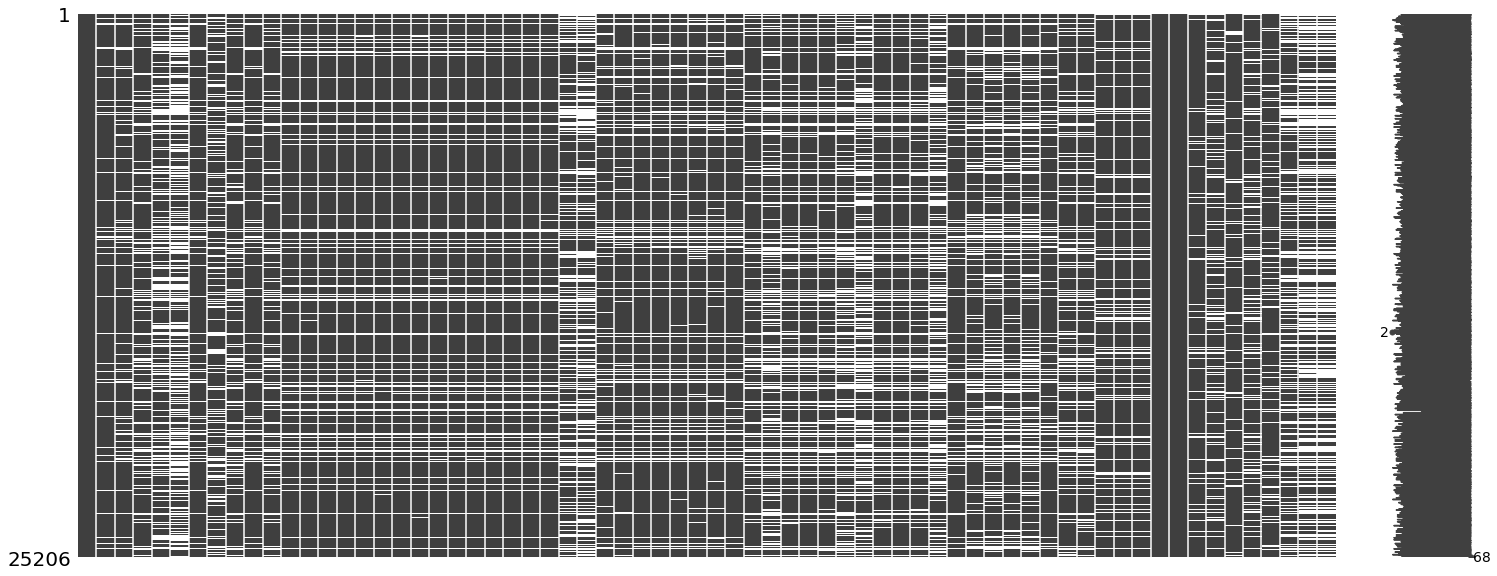

In [926]:
missingno.matrix(f2student2)

<AxesSubplot:xlabel='X1TXMTSCOR', ylabel='X2TXMTSCOR'>

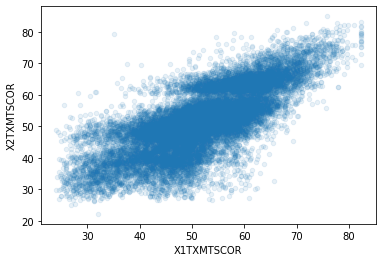

In [927]:
#???????
f2student2[['X1TXMTSCOR', 'X2TXMTSCOR']].replace(-8, np.nan).plot.scatter('X1TXMTSCOR', 'X2TXMTSCOR', alpha=.1)

In [928]:
for col in f2student2: 
    if 'GPA' in col:
        f2student2[col] = f2student2[col].replace(-1, np.nan)

In [929]:
f2student2['X4ENTMJST'] = f2student2['X4ENTMJST'].replace(-1, np.nan)

In [931]:
f2student2['X4PS1SELECT'].unique()

array([ 5.,  2.,  3., nan,  1.,  4.,  6.])

In [933]:
# 1: 2year, 2: inclusive 4-year, 3: moderatey selective 4y, 4: highly selective 4y
f2student2['X4PS1SELECT'] = f2student2['X4PS1SELECT'].replace([1,2,3,4,5,6], [4, 3, 2, 2, 1, 1])

In [934]:
f2student2['X1STUEDEXPCT'] = f2student2['X1STUEDEXPCT'].replace(11, np.nan)

In [935]:
#Agree/disagree variables
agdisagcols = ['S1PAYOFF', 'S1MTCHINTRST', 'S1STCHINTRST', 'S1MTCHEASY', 'S1STCHEASY', 'S1TEFRNDS', 'S2MBORN']

In [936]:
for col in agdisagcols:
    f2student2[col] = f2student2[col].replace([1,2,3,4], [2, 1, -1, -2])

In [937]:
for col in ['X1SEX', 'X4HSCLGCRED', 'S1FRNDSCHOOL']:
    f2student2[col] = f2student2[col]-1

In [938]:
boolean_vars = [col for col in f2student2.columns if f2student2[col].nunique()==2]

In [939]:
f2student2[boolean_vars]

,X1SEX,X4HSCLGCRED,X4DISABLED,S1NOTALKPRB,S1FRNDSCHOOL,S1FYBA,S2CLGSEARCH,S1NOMSACT,A1MTHSCIFAIR,A1MSSUMMER,A1MSSPEAKER,X4EVRATNDCLG,X4ENTMJST
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,NaN
1,1.0,1.0,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
3,1.0,1.0,NaN,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,0.0,NaN
4,0.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25201,1.0,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN
25202,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,NaN
25203,1.0,1.0,NaN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
25204,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,0.0


Categorical: X1RACE, X1LOCALE, X1REGION, 

Boolean: X1SEX, X4HSCLGCRED, X4DISABLED, S1NOTALKPRB, S1FRNDSCHOOL, 
         S1FYBA, S2CLGSEARCH, S1NOMSACT, A1MTHSCIFAIR, A1MSSUMMER, A1MSSPEAKER, 
         X4EVRATNDCLG, X4ENTMJST

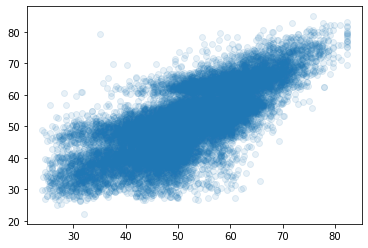

In [940]:
plt.scatter(f2student2.X1TXMTSCOR, f2student2.X2TXMTSCOR, alpha=.1)

# Correlation of variables 

In [1289]:
hsls_corr = f2student2.corr()

In [1290]:
import seaborn as sns

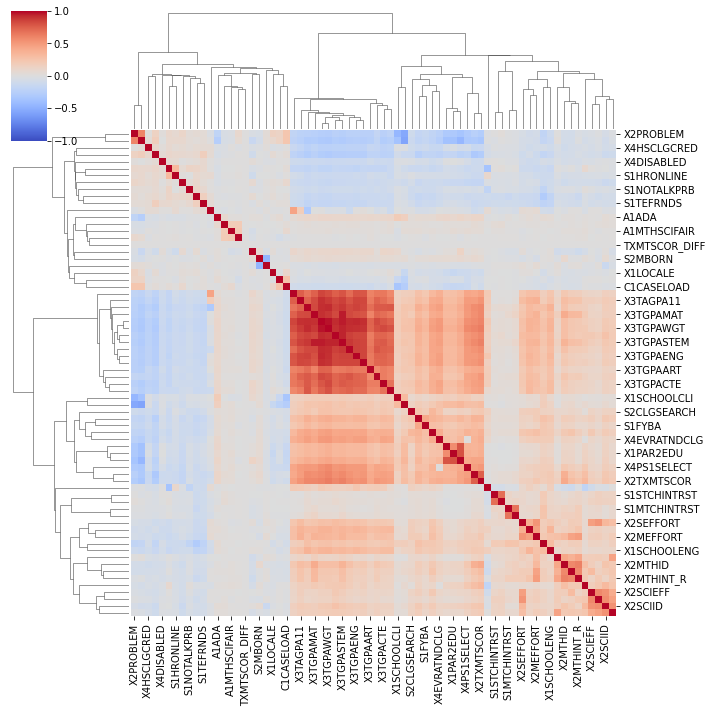

In [1291]:
sns.clustermap(hsls_corr.fillna(0), cmap='coolwarm', vmin=-1, vmax=1)

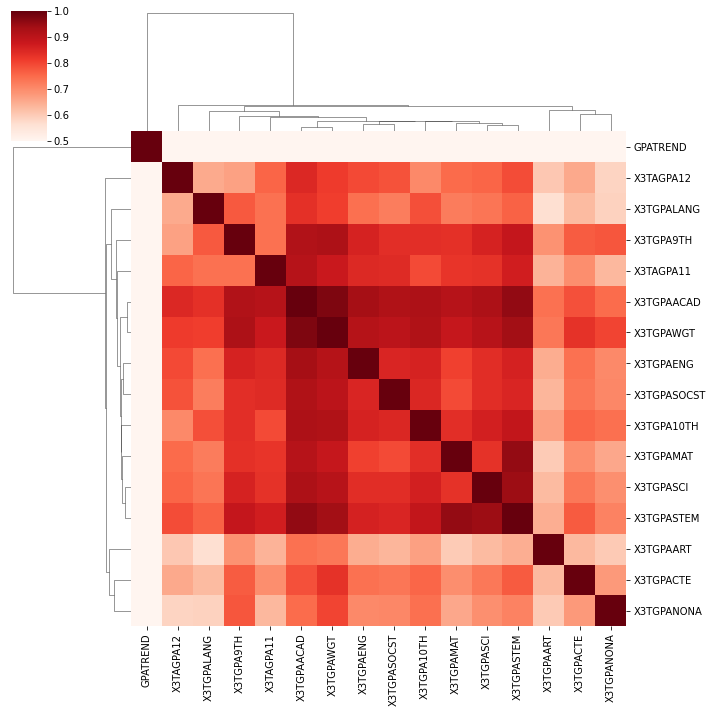

In [1292]:
sns.clustermap(f2student2[[col for col in f2student2.columns if 'GPA' in col]].corr(), cmap='Reds', vmin=.5, vmax=1)

In [945]:
def get_pairwise_corr(corr_table):
    pairwise_corr = corr_table.where(np.triu(np.ones(corr_table.shape), k=1).astype(bool)).unstack().dropna()
    pairwise_corr = pd.DataFrame(pairwise_corr.abs().sort_values(ascending=False)).reset_index()
    pairwise_corr.columns = ['var1', 'var2', 'corr']
    
    return pairwise_corr

In [946]:
pairwise = get_pairwise_corr(hsls_corr)

In [947]:
pairwise.head(20)

,var1,var2,corr
0,X3TGPAWGT,X3TGPAACAD,0.974648
1,X3TGPASTEM,X3TGPAACAD,0.955677
2,X3TGPASTEM,X3TGPAMAT,0.954385
3,X3TGPASTEM,X3TGPASCI,0.944061
4,X3TGPAWGT,X3TGPASTEM,0.939347
5,X3TGPAACAD,X3TGPAENG,0.933988
6,X3TGPAACAD,X3TGPASCI,0.923305
7,X3TGPA9TH,X3TGPAWGT,0.923164
8,X3TGPA10TH,X3TGPAACAD,0.922075
9,X3TGPA10TH,X3TGPAWGT,0.918855


In [948]:
hsls_corr['X3TGPAMAT']['X3TGPASCI']

0.8284521263403214

In [949]:
f2student2[[col for col in f2student2.columns if 'GPA' in col]].isna().sum().sort_values()

X3TGPAWGT      3330
X3TGPAACAD     3348
X3TGPASTEM     3382
X3TGPAENG      3442
X3TGPAMAT      3445
X3TGPASCI      3528
X3TGPASOCST    3632
X3TGPANONA     3678
X3TGPA9TH      4063
X3TGPA10TH     5221
X3TGPACTE      5471
X3TAGPA11      6214
X3TGPAART      7006
X3TAGPA12      7058
X3TGPALANG     7106
dtype: int64

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='X3TGPAMAT', ylabel='X3TGPASCI'>

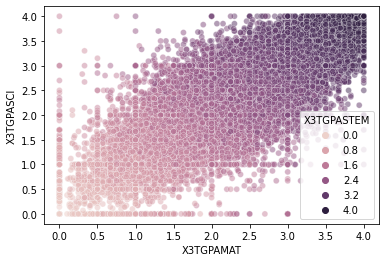

In [950]:
sns.scatterplot(f2student2.X3TGPAMAT, f2student2.X3TGPASCI, hue=f2student2.X3TGPASTEM, alpha=.5)

Calc trend

In [951]:
from sklearn.linear_model import LinearRegression

In [952]:
all(np.isnan(np.array([np.nan, np.nan, np.nan, np.nan])))

True

In [953]:
def calc_trend(gpa9, gpa10, gpa11, gpa12):
    list_of_gpas = np.array([gpa9, gpa10, gpa11, gpa12])
    if all(np.isnan(list_of_gpas)):
        return np.nan
    else:
        list_of_gpas = np.nan_to_num(list_of_gpas, nan=np.nanmean(list_of_gpas))
        reg = LinearRegression().fit(np.array([1,2,3,4]).reshape(-1, 1), list_of_gpas)
        return reg.coef_[0]

In [954]:
f2student2['GPATREND'] = f2student2.apply(lambda row: calc_trend(row['X3TGPA9TH'], row['X3TGPA10TH'],
                                                                 row['X3TAGPA11'],row['X3TAGPA12']), axis=1)

<AxesSubplot:ylabel='Frequency'>

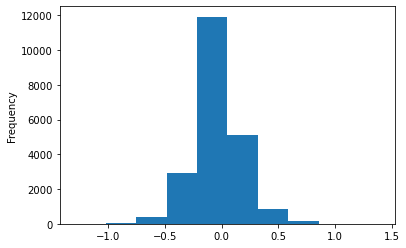

In [955]:
f2student2['GPATREND'].plot.hist()

In [956]:
f2student2['TXMTSCOR_DIFF'] = f2student2['X2TXMTSCOR'] - f2student2['X2TXMTSCOR']

In [957]:
to_drop = ['X3TGPAWGT', 'X3TGPAACAD', 'X3TGPASTEM', 'X3TGPA9TH', 'X3TGPA10TH', 'X3TAGPA11', 'X3TAGPA12', 'X2TXMTSCOR']

In [958]:
f2student2_selected = f2student2.drop(columns=to_drop)

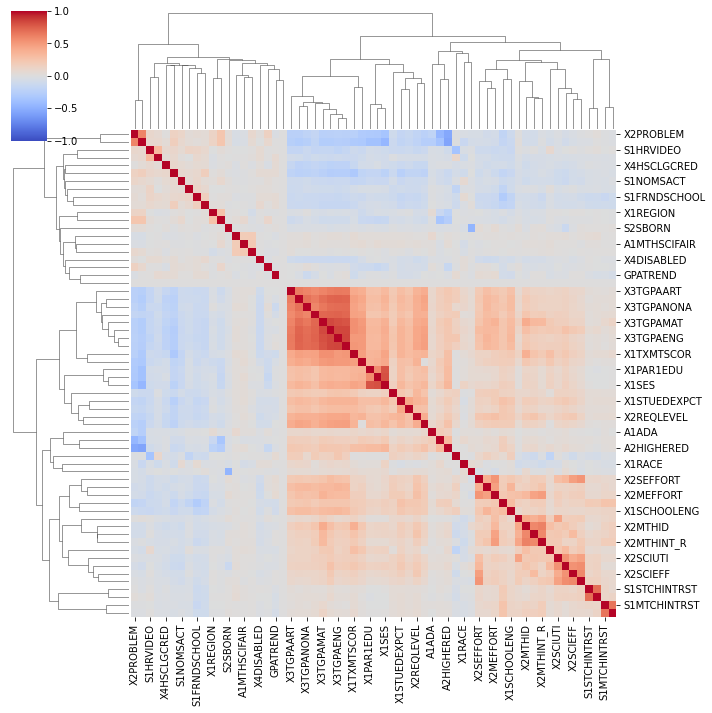

In [959]:
sns.clustermap(f2student2_selected.corr().fillna(0), vmin=-1, vmax=1, cmap='coolwarm')

In [960]:
pairwise_selected = get_pairwise_corr(f2student2_selected.corr())

In [961]:
pairwise_selected.head(20)

,var1,var2,corr
0,X3TGPASOCST,X3TGPAENG,0.850034
1,X3TGPASCI,X3TGPAENG,0.836923
2,X3TGPASOCST,X3TGPASCI,0.835982
3,X3TGPASCI,X3TGPAMAT,0.828452
4,X1SES,X1PAR2EDU,0.807665
5,X3TGPAMAT,X3TGPAENG,0.805531
6,X3TGPASOCST,X3TGPAMAT,0.792436
7,X1SES,X1PAR1EDU,0.791615
8,X3TGPALANG,X3TGPAENG,0.742021
9,X3TGPACTE,X3TGPAENG,0.738469


# Predict wether whether they go to college or not 

In [962]:
pairwise_selected[(pairwise_selected.var1=='X4EVRATNDCLG')|(pairwise_selected.var2=='X4EVRATNDCLG')].head(10)

,var1,var2,corr
55,X4EVRATNDCLG,X3TGPASOCST,0.469890
58,X4EVRATNDCLG,X3TGPAENG,0.467310
61,X4EVRATNDCLG,X3TGPASCI,0.458552
69,X4EVRATNDCLG,X3TGPACTE,0.444949
76,X4EVRATNDCLG,X3TGPAMAT,0.427771
79,X4EVRATNDCLG,X3TGPANONA,0.423433
87,X4EVRATNDCLG,X3TGPAART,0.394959
88,X4EVRATNDCLG,X2REQLEVEL,0.393068
103,X4EVRATNDCLG,X3TGPALANG,0.367977
114,X4EVRATNDCLG,X1TXMTSCOR,0.355022


#### Drop STEM major specific features and other targets

In [1087]:
f2student2_selected.columns

Index(['X1SEX', 'X1RACE', 'X1TXMTSCOR', 'X1PAR1EDU', 'X1PAR2EDU', 'X1SES',
       'X2PROBLEM', 'X2BEHAVEIN', 'X1STUEDEXPCT', 'X2REQLEVEL', 'X3TGPAENG',
       'X3TGPAMAT', 'X3TGPASCI', 'X3TGPASOCST', 'X3TGPAART', 'X3TGPALANG',
       'X3TGPACTE', 'X3TGPANONA', 'X4HSCLGCRED', 'X4DISABLED', 'X1SCHOOLBEL',
       'X1SCHOOLENG', 'S1PAYOFF', 'S1NOTALKPRB', 'S1FRNDSCHOOL', 'S1HRVIDEO',
       'S1HRONLINE', 'S1FYBA', 'S2CLGSEARCH', 'X2MEFFORT', 'X2MTHID',
       'X2MTHUTI', 'X2MTHEFF', 'X2MTHINT_R', 'X2SEFFORT', 'X2SCIID',
       'X2SCIUTI', 'X2SCIEFF', 'X2SCIINT', 'S1NOMSACT', 'S1MTCHINTRST',
       'S1STCHINTRST', 'S1MTCHEASY', 'S1STCHEASY', 'S1TEFRNDS', 'S2MBORN',
       'S2SBORN', 'A1MTHSCIFAIR', 'A1MSSUMMER', 'A1MSSPEAKER', 'X1LOCALE',
       'X1REGION', 'A1FREELUNCH', 'A1ADA', 'C1CASELOAD', 'X1SCHOOLCLI',
       'A2HIGHERED', 'X4EVRATNDCLG', 'X4PS1SELECT', 'X4ENTMJST', 'GPATREND',
       'TXMTSCOR_DIFF'],
      dtype='object')

In [1088]:
f2student2_clg = f2student2_selected.drop(columns=['X2MEFFORT', 'X2MTHID', 'X2MTHUTI', 'X2MTHEFF', 'X2MTHINT_R', 
                                                   'X2SEFFORT', 'X2SCIID', 'X2SCIUTI', 'X2SCIEFF', 'X2SCIINT', 
                                                   'S1NOMSACT', 'S1MTCHINTRST', 'S1STCHINTRST', 'S1MTCHEASY', 
                                                   'S1STCHEASY', 'S1TEFRNDS', 'S2MBORN', 'S2SBORN', 'A1MTHSCIFAIR', 
                                                   'A1MSSUMMER', 'A1MSSPEAKER','X4PS1SELECT', 'X4ENTMJST'])

In [1089]:
f2student2_clg

,X1SEX,X1RACE,X1TXMTSCOR,X1PAR1EDU,X1PAR2EDU,X1SES,X2PROBLEM,X2BEHAVEIN,X1STUEDEXPCT,X2REQLEVEL,...,X1LOCALE,X1REGION,A1FREELUNCH,A1ADA,C1CASELOAD,X1SCHOOLCLI,A2HIGHERED,X4EVRATNDCLG,GPATREND,TXMTSCOR_DIFF
0,0.0,8.0,59.3710,5.0,5.0,1.5644,-2.14,-2.17,8.0,5.0,...,4,2,20.0,96.0,400.0,0.60,70.0,1.0,-0.005,0.0
1,1.0,8.0,47.6821,3.0,2.0,-0.3699,-0.33,0.61,NaN,4.0,...,4,1,50.0,92.0,325.0,0.32,50.0,1.0,-0.024,0.0
2,1.0,3.0,64.2431,7.0,NaN,1.2741,-1.01,0.52,10.0,4.0,...,2,4,24.0,94.0,515.0,-0.61,75.0,1.0,-0.239,0.0
3,1.0,8.0,49.2690,4.0,NaN,0.5498,0.84,NaN,10.0,NaN,...,2,3,27.0,94.0,NaN,-2.14,50.0,0.0,0.025,NaN
4,0.0,8.0,62.5897,4.0,NaN,0.1495,0.01,1.21,6.0,3.0,...,1,3,12.0,97.0,400.0,-0.65,95.0,0.0,-0.088,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25201,1.0,5.0,57.5729,NaN,NaN,0.0205,NaN,-0.58,10.0,3.0,...,2,3,65.0,95.0,370.0,-0.57,10.0,NaN,-0.139,0.0
25202,1.0,5.0,46.0488,2.0,NaN,-1.2098,0.30,0.87,4.0,2.0,...,2,1,NaN,90.0,350.0,-0.80,75.0,0.0,-0.543,0.0
25203,1.0,8.0,49.7801,2.0,2.0,-0.0649,NaN,0.89,10.0,4.0,...,1,2,0.0,97.0,220.0,1.33,92.0,1.0,-0.279,0.0
25204,0.0,8.0,61.3193,5.0,NaN,0.8512,0.02,-0.23,6.0,3.0,...,2,2,3.0,94.0,350.0,-0.05,90.0,1.0,0.199,0.0


__Try__

1. Drop missing data
2. Built-in handling
3. Impute missing data
4. Weights of the students

In [1090]:
f2student2_clg = f2student2_clg.dropna(subset=['X4EVRATNDCLG'])

In [1091]:
f2student2_clg.shape

(17335, 39)

In [1092]:
f2student2_clg.dropna().shape

(2324, 39)

In [1093]:
f2student2_clg.dropna(subset=['X3TGPAMAT', 'X3TGPAENG']).shape

(16345, 39)

In [1094]:
f2student2_clg = f2student2_clg.dropna(subset=['X3TGPAMAT', 'X3TGPAENG'])

In [1095]:
len(f2student2_clg)

16345

In [1096]:
f2student2_clg.isna().sum().sort_values()

X4EVRATNDCLG        0
X1REGION            0
X1LOCALE            0
X4HSCLGCRED         0
X3TGPAENG           0
X3TGPAMAT           0
X1SEX               3
X3TGPASCI          64
X3TGPASOCST       136
X3TGPANONA        196
GPATREND          331
X1RACE            660
TXMTSCOR_DIFF    1043
X2REQLEVEL       1124
X1SES            1149
S2CLGSEARCH      1165
X1TXMTSCOR       1320
A1FREELUNCH      1363
X2BEHAVEIN       1461
C1CASELOAD       1470
X3TGPACTE        1538
S1PAYOFF         1571
S1FYBA           1572
X1SCHOOLENG      1649
S1NOTALKPRB      1663
S1FRNDSCHOOL     1664
X1SCHOOLBEL      1819
A2HIGHERED       1843
X4DISABLED       1888
S1HRONLINE       1923
S1HRVIDEO        2115
X3TGPALANG       2299
X3TGPAART        2460
A1ADA            3036
X1SCHOOLCLI      3382
X2PROBLEM        3485
X1PAR1EDU        3872
X1STUEDEXPCT     4445
X1PAR2EDU        6452
dtype: int64

In [1097]:
f2student2_clg['X1RACE'] = f2student2_clg['X1RACE'].astype(str).fillna('').copy()
f2student2_clg['X1LOCALE'] = f2student2_clg['X1LOCALE'].astype(str).fillna('').copy()
f2student2_clg['X1REGION'] = f2student2_clg['X1REGION'].astype(str).fillna('').copy()

In [1098]:
X = f2student2_clg[[col for col in f2student2_clg if col !='X4EVRATNDCLG']]
y = f2student2_clg['X4EVRATNDCLG']

In [1099]:
f2student2_clg.dtypes

X1SEX            float64
X1RACE            object
X1TXMTSCOR       float64
X1PAR1EDU        float64
X1PAR2EDU        float64
X1SES            float64
X2PROBLEM        float64
X2BEHAVEIN       float64
X1STUEDEXPCT     float64
X2REQLEVEL       float64
X3TGPAENG        float64
X3TGPAMAT        float64
X3TGPASCI        float64
X3TGPASOCST      float64
X3TGPAART        float64
X3TGPALANG       float64
X3TGPACTE        float64
X3TGPANONA       float64
X4HSCLGCRED      float64
X4DISABLED       float64
X1SCHOOLBEL      float64
X1SCHOOLENG      float64
S1PAYOFF         float64
S1NOTALKPRB      float64
S1FRNDSCHOOL     float64
S1HRVIDEO        float64
S1HRONLINE       float64
S1FYBA           float64
S2CLGSEARCH      float64
X1LOCALE          object
X1REGION          object
A1FREELUNCH      float64
A1ADA            float64
C1CASELOAD       float64
X1SCHOOLCLI      float64
A2HIGHERED       float64
X4EVRATNDCLG     float64
GPATREND         float64
TXMTSCOR_DIFF    float64
dtype: object

In [822]:
from catboost import CatBoostClassifier

In [823]:
from sklearn.model_selection import cross_validate

In [538]:
model = CatBoostClassifier(iterations=1000, depth=9, loss_function='Logloss', verbose=False, cat_features=['X1RACE', 'X1LOCALE', 'X1REGION'])

In [540]:
cross_validate(model, X, y, scoring=['roc_auc', 'average_precision'], cv=5)

{'fit_time': array([51.45933843, 50.85380578, 51.1157043 , 50.1660254 , 50.98822641]),
 'score_time': array([0.03304052, 0.02913952, 0.0280807 , 0.03854918, 0.03700137]),
 'test_roc_auc': array([0.867591  , 0.86191506, 0.86695465, 0.87494407, 0.88101728]),
 'test_average_precision': array([0.94817821, 0.95085428, 0.95091239, 0.95492511, 0.95527882])}

In [546]:
import optuna
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [1100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, stratify=y)

In [599]:
def objective(trial):

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "iterations": trial.suggest_int("iterations", 500, 2500),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.99),
        "depth": trial.suggest_int("depth", 1, 16),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        "nan_mode": trial.suggest_categorical("nan_mode", ['Min', 'Max']),
        "used_ram_limit": "30gb",
        'verbose': False
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 20)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)
    
    if param["objective"] == "Logloss":
        param["auto_class_weights"] = trial.suggest_categorical("auto_class_weights", [None, 'Balanced', 'SqrtBalanced'])
    else:
        param["auto_class_weights"] = None

    gbm = CatBoostClassifier(**param)

    gbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=100)

    preds = gbm.predict(X_test)
    pred_labels = np.rint(preds)
#     accuracy = accuracy_score(y_test, pred_labels)
    auc = roc_auc_score(y_test, gbm.predict_proba(X_test).T[1])
    return auc

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print(f"Number of finished trials: {len(study.trials)}")

print("Best trial:")
trial = study.best_trial

print(f"  Value: {trial.value}")

print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2022-06-17 18:06:44,132] A new study created in memory with name: no-name-1dbf46ca-af50-47cc-9dff-8c20cf017315
[I 2022-06-17 18:06:51,350] Trial 0 finished with value: 0.8748123145351783 and parameters: {'objective': 'CrossEntropy', 'iterations': 1804, 'colsample_bylevel': 0.9052306043906787, 'depth': 8, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'nan_mode': 'Max'}. Best is trial 0 with value: 0.8748123145351783.
[I 2022-06-17 18:06:53,962] Trial 1 finished with value: 0.8730329801923336 and parameters: {'objective': 'Logloss', 'iterations': 1410, 'colsample_bylevel': 0.6869946080686903, 'depth': 2, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'nan_mode': 'Min', 'auto_class_weights': None}. Best is trial 0 with value: 0.8748123145351783.
[I 2022-06-17 18:07:02,225] Trial 2 finished with value: 0.8659024834544465 and parameters: {'objective': 'Logloss', 'iterations': 2215, 'colsample_bylevel': 0.7625208573733573, 'depth': 9, 'boosting_type': 'Plain', 'bootstrap_type': '

Number of finished trials: 200
Best trial:
  Value: 0.8768574680814865
  Params: 
    objective: CrossEntropy
    iterations: 2477
    colsample_bylevel: 0.1076095975543271
    depth: 3
    boosting_type: Ordered
    bootstrap_type: Bernoulli
    nan_mode: Max
    subsample: 0.8685587779447357


In [1101]:
model = CatBoostClassifier(iterations=1227, depth=4, loss_function='Logloss',  colsample_bylevel=0.06800883251426916,
                           verbose=False, boosting_type='Plain', bootstrap_type='Bernoulli', nan_mode='Max', subsample=0.6446160228059471,
                           auto_class_weights=None,
                           cat_features=['X1RACE', 'X1LOCALE', 'X1REGION'])

In [1102]:
cross_validate(model, X, y, scoring=['roc_auc', 'average_precision'], cv=5)

{'fit_time': array([9.68189311, 9.28256798, 9.65282369, 9.33423018, 9.45189881]),
 'score_time': array([0.01601195, 0.01501083, 0.02153516, 0.01399326, 0.03049755]),
 'test_roc_auc': array([0.87781711, 0.86780551, 0.87174544, 0.8804654 , 0.88537444]),
 'test_average_precision': array([0.95295766, 0.95192159, 0.95358634, 0.95596864, 0.95737677])}

In [607]:
Out[552]['test_roc_auc'].mean()

0.8760969706153684

In [826]:
Out[825]['test_roc_auc'].mean()

0.876641577938028

In [1293]:
Out[1102]['test_roc_auc'].mean()

0.876641577938028

In [608]:
# model = CatBoostClassifier(iterations=2477, depth=3, loss_function='CrossEntropy',  colsample_bylevel=0.1076095975543271,
#                            verbose=False, boosting_type='Ordered', bootstrap_type='Bernoulli', nan_mode='Max', subsample=0.8685587779447357,
#                            auto_class_weights=None,
#                            cat_features=['X1RACE', 'X1LOCALE', 'X1REGION'])

In [609]:
# cross_validate(model, X, y, scoring=['roc_auc', 'average_precision'], cv=5)

In [610]:
# Out[602]['test_roc_auc'].mean()

### xgb 

In [592]:
import xgboost as xgb

In [595]:
X_train_num = pd.get_dummies(X_train, drop_first=True, dummy_na=False)
X_test_num = pd.get_dummies(X_test, drop_first=True, dummy_na=False)

In [596]:
dtrain = xgb.DMatrix(X_train_num, label=y_train)
dtest = xgb.DMatrix(X_test_num, label=y_test)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [598]:
def objective(trial):

    param = {
        
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        "lambda": trial.suggest_loguniform("lambda", 1e-8, 1.0),
        "alpha": trial.suggest_loguniform("alpha", 1e-8, 1.0),
#         "n_estimators": trial.suggest_int("n_estimators", 50, 2000)
    }

    if param["booster"] == "gbtree" or param["booster"] == "dart":
        param["max_depth"] = trial.suggest_int("max_depth", 1, 9)
        param["eta"] = trial.suggest_loguniform("eta", 1e-8, 1.0)
        param["gamma"] = trial.suggest_loguniform("gamma", 1e-8, 1.0)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_loguniform("rate_drop", 1e-8, 1.0)
        param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-8, 1.0)

    # Add a callback for pruning.
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-auc")
    bst = xgb.train(param, dtrain, evals=[(dtest, "validation")], callbacks=[pruning_callback])
    preds = bst.predict(dtest)
    pred_labels = np.rint(preds)
#     accuracy = sklearn.metrics.accuracy_score(test_y, pred_labels)
    auc = roc_auc_score(y_test, preds)
    return auc

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500)

print(f"Number of finished trials: {len(study.trials)}")

print("Best trial:")
trial = study.best_trial

print(f"  Value: {trial.value}")

print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2022-06-17 18:06:07,624] A new study created in memory with name: no-name-b77356f9-fc50-4f14-ac4a-1bc84987924a


[0]	validation-auc:0.83860
[1]	validation-auc:0.83883
[2]	validation-auc:0.83880
[3]	validation-auc:0.83883
[4]	validation-auc:0.83880
[5]	validation-auc:0.83883
[6]	validation-auc:0.83883
[7]	validation-auc:0.83883
[8]	validation-auc:0.83883
[9]	validation-auc:0.83883


[I 2022-06-17 18:06:07,786] Trial 0 finished with value: 0.838829624741865 and parameters: {'booster': 'gbtree', 'lambda': 0.08399478880621397, 'alpha': 0.06051495860759848, 'max_depth': 5, 'eta': 2.8078149530833775e-05, 'gamma': 0.8896279357261907, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.838829624741865.


[0]	validation-auc:0.83811
[1]	validation-auc:0.83976
[2]	validation-auc:0.84134
[3]	validation-auc:0.84212
[4]	validation-auc:0.84205
[5]	validation-auc:0.84232
[6]	validation-auc:0.84660
[7]	validation-auc:0.84649
[8]	validation-auc:0.84737
[9]	validation-auc:0.84845


[I 2022-06-17 18:06:08,003] Trial 1 finished with value: 0.8484541034194614 and parameters: {'booster': 'dart', 'lambda': 0.007848590393741868, 'alpha': 3.640160183289759e-06, 'max_depth': 5, 'eta': 0.006016925721475939, 'gamma': 6.279796492954089e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.016033375756416713, 'skip_drop': 0.0009691329611413567}. Best is trial 1 with value: 0.8484541034194614.


[0]	validation-auc:0.83811
[1]	validation-auc:0.84211
[2]	validation-auc:0.84231
[3]	validation-auc:0.84723
[4]	validation-auc:0.84746
[5]	validation-auc:0.84864
[6]	validation-auc:0.84933
[7]	validation-auc:0.84967
[8]	validation-auc:0.84939
[9]	validation-auc:0.84965


[I 2022-06-17 18:06:08,156] Trial 2 finished with value: 0.8496496318667219 and parameters: {'booster': 'gbtree', 'lambda': 0.00019632643926575566, 'alpha': 1.993601954712118e-05, 'max_depth': 5, 'eta': 0.011603047853297013, 'gamma': 5.12591139500047e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.70618
[1]	validation-auc:0.70618
[2]	validation-auc:0.70618
[3]	validation-auc:0.70618
[4]	validation-auc:0.70618
[5]	validation-auc:0.70618
[6]	validation-auc:0.70618
[7]	validation-auc:0.70618
[8]	validation-auc:0.70618
[9]	validation-auc:0.70618


[I 2022-06-17 18:06:08,219] Trial 3 finished with value: 0.706179732507677 and parameters: {'booster': 'gbtree', 'lambda': 1.1707725472673393e-07, 'alpha': 0.24592929061660437, 'max_depth': 1, 'eta': 3.7375002954839223e-07, 'gamma': 0.0033328160102242756, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.72913
[1]	validation-auc:0.77245
[2]	validation-auc:0.77652
[3]	validation-auc:0.76765
[4]	validation-auc:0.78831
[5]	validation-auc:0.79038
[6]	validation-auc:0.79131
[7]	validation-auc:0.79150
[8]	validation-auc:0.79205
[9]	validation-auc:0.79040


[I 2022-06-17 18:06:08,599] Trial 4 finished with value: 0.790404095946821 and parameters: {'booster': 'dart', 'lambda': 1.0456543395426274e-05, 'alpha': 0.07160142606391437, 'max_depth': 9, 'eta': 1.3378621173462916e-07, 'gamma': 0.013824436121319738, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.00040194501571429875, 'skip_drop': 6.077181490574069e-07}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.81564


[I 2022-06-17 18:06:08,610] Trial 5 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.79088


[I 2022-06-17 18:06:08,618] Trial 6 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:08,646] Trial 7 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83811
[1]	validation-auc:0.83811


[I 2022-06-17 18:06:08,679] Trial 8 pruned. Trial was pruned at iteration 1.


[0]	validation-auc:0.83357


[I 2022-06-17 18:06:08,700] Trial 9 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:08,735] Trial 10 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.81178


[I 2022-06-17 18:06:08,781] Trial 11 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.82778


[I 2022-06-17 18:06:08,827] Trial 12 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:08,872] Trial 13 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:08,886] Trial 14 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:08,941] Trial 15 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:08,975] Trial 16 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.81178


[I 2022-06-17 18:06:09,022] Trial 17 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.81189


[I 2022-06-17 18:06:09,068] Trial 18 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.79641


[I 2022-06-17 18:06:09,085] Trial 19 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83636


[I 2022-06-17 18:06:09,137] Trial 20 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83816
[1]	validation-auc:0.83866


[I 2022-06-17 18:06:09,195] Trial 21 pruned. Trial was pruned at iteration 1.
[I 2022-06-17 18:06:09,231] Trial 22 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83844
[1]	validation-auc:0.83918
[2]	validation-auc:0.83903
[3]	validation-auc:0.83918
[4]	validation-auc:0.83918
[5]	validation-auc:0.83918
[6]	validation-auc:0.83918
[7]	validation-auc:0.83918
[8]	validation-auc:0.83918
[9]	validation-auc:0.83918


[I 2022-06-17 18:06:09,412] Trial 23 finished with value: 0.8391816377959566 and parameters: {'booster': 'gbtree', 'lambda': 0.031059589547777402, 'alpha': 0.6825530776802144, 'max_depth': 5, 'eta': 0.00015804811364634425, 'gamma': 0.00033231812570570947, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.81190


[I 2022-06-17 18:06:09,458] Trial 24 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:09,498] Trial 25 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.81178


[I 2022-06-17 18:06:09,533] Trial 26 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:09,549] Trial 27 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83271


[I 2022-06-17 18:06:09,593] Trial 28 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:09,639] Trial 29 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.82778


[I 2022-06-17 18:06:09,679] Trial 30 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83839
[1]	validation-auc:0.83912
[2]	validation-auc:0.83904
[3]	validation-auc:0.83919
[4]	validation-auc:0.83919
[5]	validation-auc:0.83918
[6]	validation-auc:0.83918
[7]	validation-auc:0.83919
[8]	validation-auc:0.83918
[9]	validation-auc:0.83918


[I 2022-06-17 18:06:09,858] Trial 31 finished with value: 0.8391826717461821 and parameters: {'booster': 'gbtree', 'lambda': 0.13023223722962332, 'alpha': 0.541275017901429, 'max_depth': 5, 'eta': 4.22339570927841e-05, 'gamma': 0.07016411803136363, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 0.8496496318667219.
[I 2022-06-17 18:06:09,901] Trial 32 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:09,940] Trial 33 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83842
[1]	validation-auc:0.83916
[2]	validation-auc:0.83893


[I 2022-06-17 18:06:10,023] Trial 34 pruned. Trial was pruned at iteration 3.


[0]	validation-auc:0.81190


[I 2022-06-17 18:06:10,064] Trial 35 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83281


[I 2022-06-17 18:06:10,112] Trial 36 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.81178


[I 2022-06-17 18:06:10,157] Trial 37 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.70912


[I 2022-06-17 18:06:10,174] Trial 38 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:10,217] Trial 39 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:10,246] Trial 40 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.82711


[I 2022-06-17 18:06:10,281] Trial 41 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.81388


[I 2022-06-17 18:06:10,327] Trial 42 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.81195


[I 2022-06-17 18:06:10,363] Trial 43 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.80228


[I 2022-06-17 18:06:10,409] Trial 44 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:10,456] Trial 45 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.77870


[I 2022-06-17 18:06:10,471] Trial 46 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83811


[I 2022-06-17 18:06:10,522] Trial 47 pruned. Trial was pruned at iteration 1.
[I 2022-06-17 18:06:10,566] Trial 48 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.82165


[I 2022-06-17 18:06:10,612] Trial 49 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83233


[I 2022-06-17 18:06:10,671] Trial 50 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.77836


[I 2022-06-17 18:06:10,740] Trial 51 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.74230


[I 2022-06-17 18:06:10,803] Trial 52 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.50000


[I 2022-06-17 18:06:10,851] Trial 53 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:10,895] Trial 54 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.79407


[I 2022-06-17 18:06:10,911] Trial 55 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83280


[I 2022-06-17 18:06:10,952] Trial 56 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83811
[1]	validation-auc:0.83866


[I 2022-06-17 18:06:11,012] Trial 57 pruned. Trial was pruned at iteration 1.
[I 2022-06-17 18:06:11,073] Trial 58 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.81163


[I 2022-06-17 18:06:11,111] Trial 59 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83811


[I 2022-06-17 18:06:11,183] Trial 60 pruned. Trial was pruned at iteration 1.
[I 2022-06-17 18:06:11,219] Trial 61 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.50000


[I 2022-06-17 18:06:11,250] Trial 62 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:11,280] Trial 63 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83461


[I 2022-06-17 18:06:11,320] Trial 64 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.81195


[I 2022-06-17 18:06:11,351] Trial 65 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.82795


[I 2022-06-17 18:06:11,386] Trial 66 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:11,401] Trial 67 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:11,436] Trial 68 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.81682


[I 2022-06-17 18:06:11,490] Trial 69 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:11,524] Trial 70 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83877
[1]	validation-auc:0.83949
[2]	validation-auc:0.83934
[3]	validation-auc:0.83949
[4]	validation-auc:0.83948
[5]	validation-auc:0.83949
[6]	validation-auc:0.83948
[7]	validation-auc:0.83949
[8]	validation-auc:0.83949
[9]	validation-auc:0.83949


[I 2022-06-17 18:06:11,686] Trial 71 finished with value: 0.8394898489586711 and parameters: {'booster': 'gbtree', 'lambda': 0.4955667301235614, 'alpha': 0.3455624799993873, 'max_depth': 5, 'eta': 0.00015381925389585895, 'gamma': 0.16937121343748524, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83877
[1]	validation-auc:0.83949
[2]	validation-auc:0.83934
[3]	validation-auc:0.83949
[4]	validation-auc:0.83948
[5]	validation-auc:0.83949
[6]	validation-auc:0.83949
[7]	validation-auc:0.83949
[8]	validation-auc:0.83949
[9]	validation-auc:0.83949


[I 2022-06-17 18:06:11,856] Trial 72 finished with value: 0.8394898489586711 and parameters: {'booster': 'gbtree', 'lambda': 0.493241754255915, 'alpha': 0.31325496331680897, 'max_depth': 5, 'eta': 0.00036019987905923763, 'gamma': 0.2741319388824349, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83848


[I 2022-06-17 18:06:11,908] Trial 73 pruned. Trial was pruned at iteration 1.


[0]	validation-auc:0.83842
[1]	validation-auc:0.83916


[I 2022-06-17 18:06:11,960] Trial 74 pruned. Trial was pruned at iteration 1.


[0]	validation-auc:0.83877
[1]	validation-auc:0.83949
[2]	validation-auc:0.83934
[3]	validation-auc:0.83949
[4]	validation-auc:0.83949
[5]	validation-auc:0.83949
[6]	validation-auc:0.83948
[7]	validation-auc:0.83949
[8]	validation-auc:0.83948
[9]	validation-auc:0.83949


[I 2022-06-17 18:06:12,125] Trial 75 finished with value: 0.8394898489586711 and parameters: {'booster': 'gbtree', 'lambda': 0.7430235798120866, 'alpha': 0.30475053726154655, 'max_depth': 5, 'eta': 0.00023189047819764327, 'gamma': 0.9730025283040266, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83862
[1]	validation-auc:0.83933


[I 2022-06-17 18:06:12,177] Trial 76 pruned. Trial was pruned at iteration 1.


[0]	validation-auc:0.83877
[1]	validation-auc:0.83949
[2]	validation-auc:0.83948
[3]	validation-auc:0.83949
[4]	validation-auc:0.83948
[5]	validation-auc:0.83949
[6]	validation-auc:0.83949
[7]	validation-auc:0.83949
[8]	validation-auc:0.83948
[9]	validation-auc:0.83949


[I 2022-06-17 18:06:12,361] Trial 77 finished with value: 0.8394898489586711 and parameters: {'booster': 'gbtree', 'lambda': 0.4945867209148635, 'alpha': 0.27698854711424864, 'max_depth': 5, 'eta': 0.0001797665735382792, 'gamma': 0.4936690905956638, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83869
[1]	validation-auc:0.83949
[2]	validation-auc:0.83934
[3]	validation-auc:0.83949
[4]	validation-auc:0.83948
[5]	validation-auc:0.83949
[6]	validation-auc:0.83948
[7]	validation-auc:0.83949
[8]	validation-auc:0.83948
[9]	validation-auc:0.83949


[I 2022-06-17 18:06:12,544] Trial 78 finished with value: 0.8394882510355952 and parameters: {'booster': 'gbtree', 'lambda': 0.5139015691618043, 'alpha': 0.260473163954991, 'max_depth': 5, 'eta': 0.00017111608040616804, 'gamma': 0.08929099884573095, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.81388


[I 2022-06-17 18:06:12,583] Trial 79 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:12,625] Trial 80 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83842


[I 2022-06-17 18:06:12,664] Trial 81 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83834


[I 2022-06-17 18:06:12,704] Trial 82 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83872
[1]	validation-auc:0.83945


[I 2022-06-17 18:06:12,757] Trial 83 pruned. Trial was pruned at iteration 1.
[I 2022-06-17 18:06:12,805] Trial 84 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:12,850] Trial 85 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83834


[I 2022-06-17 18:06:12,891] Trial 86 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83941
[1]	validation-auc:0.83988
[2]	validation-auc:0.83990
[3]	validation-auc:0.83988
[4]	validation-auc:0.83985
[5]	validation-auc:0.83988
[6]	validation-auc:0.83988
[7]	validation-auc:0.83988
[8]	validation-auc:0.83988
[9]	validation-auc:0.83988


[I 2022-06-17 18:06:13,071] Trial 87 finished with value: 0.8402377709537063 and parameters: {'booster': 'gbtree', 'lambda': 0.24944004670100647, 'alpha': 0.028852198214951875, 'max_depth': 5, 'eta': 2.3164376072779662e-05, 'gamma': 1.2483832593495444e-05, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83900


[I 2022-06-17 18:06:13,125] Trial 88 pruned. Trial was pruned at iteration 1.


[0]	validation-auc:0.83664


[I 2022-06-17 18:06:13,171] Trial 89 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.81388


[I 2022-06-17 18:06:13,213] Trial 90 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.82778


[I 2022-06-17 18:06:13,252] Trial 91 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:13,290] Trial 92 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83930
[1]	validation-auc:0.83993
[2]	validation-auc:0.83990
[3]	validation-auc:0.84039
[4]	validation-auc:0.84044
[5]	validation-auc:0.84036
[6]	validation-auc:0.84039
[7]	validation-auc:0.84035
[8]	validation-auc:0.84037
[9]	validation-auc:0.84035


[I 2022-06-17 18:06:13,453] Trial 93 finished with value: 0.8403471816866737 and parameters: {'booster': 'gbtree', 'lambda': 0.17965013690432394, 'alpha': 0.0971535567425008, 'max_depth': 5, 'eta': 0.0001752931605508835, 'gamma': 0.3737875391355377, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83869
[1]	validation-auc:0.83949


[I 2022-06-17 18:06:13,506] Trial 94 pruned. Trial was pruned at iteration 1.


[0]	validation-auc:0.83444


[I 2022-06-17 18:06:13,551] Trial 95 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:13,591] Trial 96 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:13,608] Trial 97 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.82778


[I 2022-06-17 18:06:13,644] Trial 98 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83811


[I 2022-06-17 18:06:13,685] Trial 99 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:13,728] Trial 100 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:13,767] Trial 101 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83882
[1]	validation-auc:0.83940


[I 2022-06-17 18:06:13,824] Trial 102 pruned. Trial was pruned at iteration 1.


[0]	validation-auc:0.83827


[I 2022-06-17 18:06:13,866] Trial 103 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:13,904] Trial 104 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:13,944] Trial 105 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83872
[1]	validation-auc:0.83945


[I 2022-06-17 18:06:13,997] Trial 106 pruned. Trial was pruned at iteration 1.
[I 2022-06-17 18:06:14,039] Trial 107 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.78826


[I 2022-06-17 18:06:14,053] Trial 108 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:14,089] Trial 109 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:14,128] Trial 110 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83903


[I 2022-06-17 18:06:14,180] Trial 111 pruned. Trial was pruned at iteration 1.


[0]	validation-auc:0.81190


[I 2022-06-17 18:06:14,222] Trial 112 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83877
[1]	validation-auc:0.83949
[2]	validation-auc:0.83934
[3]	validation-auc:0.83949
[4]	validation-auc:0.83948
[5]	validation-auc:0.83949
[6]	validation-auc:0.83949
[7]	validation-auc:0.83949
[8]	validation-auc:0.83948
[9]	validation-auc:0.83949


[I 2022-06-17 18:06:14,385] Trial 113 finished with value: 0.8394898489586711 and parameters: {'booster': 'gbtree', 'lambda': 0.6641770051691257, 'alpha': 0.31228814199192606, 'max_depth': 5, 'eta': 9.287267562649307e-05, 'gamma': 0.1395109087072793, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83873


[I 2022-06-17 18:06:14,436] Trial 114 pruned. Trial was pruned at iteration 1.


[0]	validation-auc:0.83872


[I 2022-06-17 18:06:14,489] Trial 115 pruned. Trial was pruned at iteration 1.


[0]	validation-auc:0.83461


[I 2022-06-17 18:06:14,553] Trial 116 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83834


[I 2022-06-17 18:06:14,601] Trial 117 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:14,654] Trial 118 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.82778


[I 2022-06-17 18:06:14,696] Trial 119 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83848


[I 2022-06-17 18:06:14,743] Trial 120 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83891


[I 2022-06-17 18:06:14,801] Trial 121 pruned. Trial was pruned at iteration 1.


[0]	validation-auc:0.83940
[1]	validation-auc:0.83967
[2]	validation-auc:0.83964
[3]	validation-auc:0.83967
[4]	validation-auc:0.83964
[5]	validation-auc:0.83967
[6]	validation-auc:0.83966
[7]	validation-auc:0.83967
[8]	validation-auc:0.83966
[9]	validation-auc:0.83967


[I 2022-06-17 18:06:14,985] Trial 122 finished with value: 0.8396670304291551 and parameters: {'booster': 'gbtree', 'lambda': 0.15640976120547675, 'alpha': 4.697430830366094e-06, 'max_depth': 5, 'eta': 2.9778304983383907e-05, 'gamma': 0.40741127739911737, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83905
[1]	validation-auc:0.83967
[2]	validation-auc:0.83964
[3]	validation-auc:0.83972
[4]	validation-auc:0.83965
[5]	validation-auc:0.84003
[6]	validation-auc:0.83998
[7]	validation-auc:0.84007
[8]	validation-auc:0.83999
[9]	validation-auc:0.84007


[I 2022-06-17 18:06:15,172] Trial 123 finished with value: 0.8400704590081034 and parameters: {'booster': 'gbtree', 'lambda': 0.15333127570314825, 'alpha': 1.9175621205127475e-06, 'max_depth': 5, 'eta': 9.073476969345917e-05, 'gamma': 2.991480422794188e-07, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83835


[I 2022-06-17 18:06:15,222] Trial 124 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83976
[1]	validation-auc:0.83988
[2]	validation-auc:0.83985
[3]	validation-auc:0.83988
[4]	validation-auc:0.83985
[5]	validation-auc:0.83988
[6]	validation-auc:0.83988
[7]	validation-auc:0.83988
[8]	validation-auc:0.83983
[9]	validation-auc:0.83988


[I 2022-06-17 18:06:15,399] Trial 125 finished with value: 0.8398807761394367 and parameters: {'booster': 'gbtree', 'lambda': 0.21625500859540359, 'alpha': 4.37062006204537e-06, 'max_depth': 5, 'eta': 1.4181721442669372e-05, 'gamma': 0.4152593802274494, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83976
[1]	validation-auc:0.83990
[2]	validation-auc:0.83985
[3]	validation-auc:0.83988
[4]	validation-auc:0.83985
[5]	validation-auc:0.83988
[6]	validation-auc:0.83983
[7]	validation-auc:0.83988
[8]	validation-auc:0.83988
[9]	validation-auc:0.83988


[I 2022-06-17 18:06:15,581] Trial 126 finished with value: 0.8398807761394367 and parameters: {'booster': 'gbtree', 'lambda': 0.2100271826328829, 'alpha': 5.212512313553322e-06, 'max_depth': 5, 'eta': 1.1593683044079953e-05, 'gamma': 3.2402006413116616e-07, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83953
[1]	validation-auc:0.83988
[2]	validation-auc:0.84020
[3]	validation-auc:0.83988
[4]	validation-auc:0.83985
[5]	validation-auc:0.83988
[6]	validation-auc:0.83988
[7]	validation-auc:0.83988
[8]	validation-auc:0.83988
[9]	validation-auc:0.83983


[I 2022-06-17 18:06:15,777] Trial 127 finished with value: 0.8398294546100551 and parameters: {'booster': 'gbtree', 'lambda': 0.203039831017006, 'alpha': 5.659194240597437e-06, 'max_depth': 5, 'eta': 9.571877768894615e-06, 'gamma': 2.81179960914354e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.
[I 2022-06-17 18:06:15,830] Trial 128 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83964
[1]	validation-auc:0.83991
[2]	validation-auc:0.84030
[3]	validation-auc:0.84031
[4]	validation-auc:0.83998
[5]	validation-auc:0.84001
[6]	validation-auc:0.84020
[7]	validation-auc:0.83990
[8]	validation-auc:0.83988
[9]	validation-auc:0.84021


[I 2022-06-17 18:06:16,019] Trial 129 finished with value: 0.8402056245012366 and parameters: {'booster': 'gbtree', 'lambda': 0.2643295701446973, 'alpha': 1.0599312497225475e-05, 'max_depth': 5, 'eta': 3.1303747716892186e-06, 'gamma': 6.420244258456091e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83976
[1]	validation-auc:0.84042
[2]	validation-auc:0.84030
[3]	validation-auc:0.84022
[4]	validation-auc:0.84028
[5]	validation-auc:0.83990
[6]	validation-auc:0.84031
[7]	validation-auc:0.83990
[8]	validation-auc:0.84020
[9]	validation-auc:0.83990


[I 2022-06-17 18:06:16,206] Trial 130 finished with value: 0.839899011261598 and parameters: {'booster': 'gbtree', 'lambda': 0.2142958615909763, 'alpha': 1.0932584277733854e-05, 'max_depth': 5, 'eta': 3.258538037034482e-06, 'gamma': 1.4992598236001524e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83981
[1]	validation-auc:0.84043
[2]	validation-auc:0.84030
[3]	validation-auc:0.84022
[4]	validation-auc:0.84019
[5]	validation-auc:0.83990
[6]	validation-auc:0.84020
[7]	validation-auc:0.84021
[8]	validation-auc:0.83999
[9]	validation-auc:0.83999


[I 2022-06-17 18:06:16,385] Trial 131 finished with value: 0.8399879309810026 and parameters: {'booster': 'gbtree', 'lambda': 0.2246889709644218, 'alpha': 9.62569329812109e-06, 'max_depth': 5, 'eta': 2.757432952294694e-06, 'gamma': 3.038720265919911e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83952
[1]	validation-auc:0.84046
[2]	validation-auc:0.84029
[3]	validation-auc:0.84012
[4]	validation-auc:0.84019
[5]	validation-auc:0.83990
[6]	validation-auc:0.83988
[7]	validation-auc:0.84022
[8]	validation-auc:0.83988
[9]	validation-auc:0.83988


[I 2022-06-17 18:06:16,576] Trial 132 finished with value: 0.8398813401122871 and parameters: {'booster': 'gbtree', 'lambda': 0.1921314627628701, 'alpha': 1.0562345637804339e-05, 'max_depth': 5, 'eta': 3.380907437949072e-06, 'gamma': 3.4657794604397047e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83986
[1]	validation-auc:0.84031
[2]	validation-auc:0.83998
[3]	validation-auc:0.84022
[4]	validation-auc:0.83996
[5]	validation-auc:0.84033
[6]	validation-auc:0.83990
[7]	validation-auc:0.84021
[8]	validation-auc:0.84001
[9]	validation-auc:0.84022


[I 2022-06-17 18:06:16,745] Trial 133 finished with value: 0.840224235605298 and parameters: {'booster': 'gbtree', 'lambda': 0.20606733527075338, 'alpha': 1.1312219571634047e-05, 'max_depth': 5, 'eta': 2.4927136993628318e-06, 'gamma': 1.331164475122202e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.
[I 2022-06-17 18:06:16,791] Trial 134 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83991
[1]	validation-auc:0.84042
[2]	validation-auc:0.84043
[3]	validation-auc:0.84036
[4]	validation-auc:0.84018
[5]	validation-auc:0.84001
[6]	validation-auc:0.84031
[7]	validation-auc:0.84001
[8]	validation-auc:0.84020
[9]	validation-auc:0.83990


[I 2022-06-17 18:06:16,986] Trial 135 finished with value: 0.8398992932480231 and parameters: {'booster': 'gbtree', 'lambda': 0.18742781509885562, 'alpha': 2.2808200214956358e-06, 'max_depth': 5, 'eta': 2.3318191804665076e-06, 'gamma': 3.146226243307576e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83997
[1]	validation-auc:0.84028
[2]	validation-auc:0.84021
[3]	validation-auc:0.84021
[4]	validation-auc:0.84033
[5]	validation-auc:0.84021
[6]	validation-auc:0.84022
[7]	validation-auc:0.84021
[8]	validation-auc:0.83988
[9]	validation-auc:0.84001


[I 2022-06-17 18:06:17,172] Trial 136 finished with value: 0.8400058841167388 and parameters: {'booster': 'gbtree', 'lambda': 0.22828148139610122, 'alpha': 2.210013679366333e-06, 'max_depth': 5, 'eta': 2.4127325932637675e-06, 'gamma': 2.7031171617753786e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.
[I 2022-06-17 18:06:17,191] Trial 137 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:17,237] Trial 138 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:17,287] Trial 139 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83851


[I 2022-06-17 18:06:17,342] Trial 140 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83953
[1]	validation-auc:0.84033
[2]	validation-auc:0.84012
[3]	validation-auc:0.84038
[4]	validation-auc:0.84019
[5]	validation-auc:0.84001
[6]	validation-auc:0.84001
[7]	validation-auc:0.84014
[8]	validation-auc:0.83999
[9]	validation-auc:0.83988


[I 2022-06-17 18:06:17,511] Trial 141 finished with value: 0.839881058125862 and parameters: {'booster': 'gbtree', 'lambda': 0.19722487453910698, 'alpha': 1.831185843177742e-05, 'max_depth': 5, 'eta': 1.5193913694964597e-06, 'gamma': 2.2640220570311368e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83941
[1]	validation-auc:0.84048
[2]	validation-auc:0.83974
[3]	validation-auc:0.84043
[4]	validation-auc:0.84027
[5]	validation-auc:0.84029
[6]	validation-auc:0.84042
[7]	validation-auc:0.84010
[8]	validation-auc:0.84029
[9]	validation-auc:0.84018


[I 2022-06-17 18:06:17,700] Trial 142 finished with value: 0.8401824076188973 and parameters: {'booster': 'gbtree', 'lambda': 0.2948734844527235, 'alpha': 1.9618668882652392e-05, 'max_depth': 5, 'eta': 1.1799835506406821e-06, 'gamma': 3.007140481714475e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83591


[I 2022-06-17 18:06:17,749] Trial 143 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83576


[I 2022-06-17 18:06:17,793] Trial 144 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83857


[I 2022-06-17 18:06:17,839] Trial 145 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:17,878] Trial 146 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:17,921] Trial 147 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.82765


[I 2022-06-17 18:06:17,972] Trial 148 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:18,023] Trial 149 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.82884


[I 2022-06-17 18:06:18,078] Trial 150 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83994
[1]	validation-auc:0.84040
[2]	validation-auc:0.83998
[3]	validation-auc:0.84021
[4]	validation-auc:0.84025
[5]	validation-auc:0.84029
[6]	validation-auc:0.84021
[7]	validation-auc:0.84001
[8]	validation-auc:0.84031
[9]	validation-auc:0.84036


[I 2022-06-17 18:06:18,256] Trial 151 finished with value: 0.8403561112568041 and parameters: {'booster': 'gbtree', 'lambda': 0.2480232764918917, 'alpha': 3.316844866320126e-06, 'max_depth': 5, 'eta': 1.4818314059033315e-06, 'gamma': 1.8904295139346792e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.
[I 2022-06-17 18:06:18,298] Trial 152 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83771


[I 2022-06-17 18:06:18,340] Trial 153 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83207


[I 2022-06-17 18:06:18,383] Trial 154 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:18,428] Trial 155 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83974
[1]	validation-auc:0.84022
[2]	validation-auc:0.83998
[3]	validation-auc:0.83988
[4]	validation-auc:0.83987
[5]	validation-auc:0.83988
[6]	validation-auc:0.83988
[7]	validation-auc:0.83988
[8]	validation-auc:0.83988
[9]	validation-auc:0.83988


[I 2022-06-17 18:06:18,598] Trial 156 finished with value: 0.8398804001575364 and parameters: {'booster': 'gbtree', 'lambda': 0.24957784948317577, 'alpha': 1.7970906142398058e-06, 'max_depth': 5, 'eta': 5.0016807718001985e-06, 'gamma': 1.0471174461212096e-06, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83822


[I 2022-06-17 18:06:18,642] Trial 157 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:18,694] Trial 158 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:18,736] Trial 159 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:18,779] Trial 160 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83985
[1]	validation-auc:0.84029
[2]	validation-auc:0.83996
[3]	validation-auc:0.84021
[4]	validation-auc:0.83985
[5]	validation-auc:0.84033
[6]	validation-auc:0.83990
[7]	validation-auc:0.84022
[8]	validation-auc:0.83988
[9]	validation-auc:0.83988


[I 2022-06-17 18:06:18,950] Trial 161 finished with value: 0.8354792500289037 and parameters: {'booster': 'gbtree', 'lambda': 0.2119750293949625, 'alpha': 4.139229681825864e-06, 'max_depth': 5, 'eta': 3.8520569234648666e-06, 'gamma': 4.0965150589531274e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.82778


[I 2022-06-17 18:06:18,996] Trial 162 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:19,040] Trial 163 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83846


[I 2022-06-17 18:06:19,083] Trial 164 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83945
[1]	validation-auc:0.84028
[2]	validation-auc:0.84030
[3]	validation-auc:0.84036
[4]	validation-auc:0.84030
[5]	validation-auc:0.84001
[6]	validation-auc:0.84031
[7]	validation-auc:0.84022
[8]	validation-auc:0.83988
[9]	validation-auc:0.84022


[I 2022-06-17 18:06:19,257] Trial 165 finished with value: 0.8402243296007731 and parameters: {'booster': 'gbtree', 'lambda': 0.18790849488798317, 'alpha': 6.054662083934466e-06, 'max_depth': 5, 'eta': 2.3255858312145227e-06, 'gamma': 1.389227082035562e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.
[I 2022-06-17 18:06:19,297] Trial 166 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:19,315] Trial 167 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:19,357] Trial 168 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83893


[I 2022-06-17 18:06:19,399] Trial 169 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83739


[I 2022-06-17 18:06:19,441] Trial 170 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83943
[1]	validation-auc:0.83990


[I 2022-06-17 18:06:19,509] Trial 171 pruned. Trial was pruned at iteration 2.


[0]	validation-auc:0.83976
[1]	validation-auc:0.84042
[2]	validation-auc:0.84030
[3]	validation-auc:0.83990
[4]	validation-auc:0.84028
[5]	validation-auc:0.83990
[6]	validation-auc:0.83988
[7]	validation-auc:0.84022
[8]	validation-auc:0.83988
[9]	validation-auc:0.84022


[I 2022-06-17 18:06:19,677] Trial 172 finished with value: 0.840224235605298 and parameters: {'booster': 'gbtree', 'lambda': 0.2027549585205207, 'alpha': 5.416568968467478e-06, 'max_depth': 5, 'eta': 3.2644520203355507e-06, 'gamma': 1.0930424006112377e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.
[I 2022-06-17 18:06:19,721] Trial 173 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83862


[I 2022-06-17 18:06:19,767] Trial 174 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83971
[1]	validation-auc:0.84000
[2]	validation-auc:0.83998
[3]	validation-auc:0.84001
[4]	validation-auc:0.84018
[5]	validation-auc:0.84021
[6]	validation-auc:0.84020
[7]	validation-auc:0.83988
[8]	validation-auc:0.83988
[9]	validation-auc:0.83988


[I 2022-06-17 18:06:19,946] Trial 175 finished with value: 0.8398807761394367 and parameters: {'booster': 'gbtree', 'lambda': 0.22070468435104476, 'alpha': 7.808574300624252e-06, 'max_depth': 5, 'eta': 4.40622530180026e-06, 'gamma': 1.2772805466797662e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83873


[I 2022-06-17 18:06:19,990] Trial 176 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83811


[I 2022-06-17 18:06:20,043] Trial 177 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83937


[I 2022-06-17 18:06:20,091] Trial 178 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:20,137] Trial 179 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:20,179] Trial 180 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83991
[1]	validation-auc:0.83989
[2]	validation-auc:0.83998
[3]	validation-auc:0.84031
[4]	validation-auc:0.84018
[5]	validation-auc:0.84021
[6]	validation-auc:0.84031
[7]	validation-auc:0.83988
[8]	validation-auc:0.83988
[9]	validation-auc:0.83988


[I 2022-06-17 18:06:20,352] Trial 181 finished with value: 0.8398804001575364 and parameters: {'booster': 'gbtree', 'lambda': 0.24072065656951266, 'alpha': 7.955008787876918e-06, 'max_depth': 5, 'eta': 3.6522136104977187e-06, 'gamma': 9.162217085520162e-08, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83989
[1]	validation-auc:0.84045
[2]	validation-auc:0.83996
[3]	validation-auc:0.83988
[4]	validation-auc:0.83987
[5]	validation-auc:0.83990
[6]	validation-auc:0.83988
[7]	validation-auc:0.83988
[8]	validation-auc:0.83988
[9]	validation-auc:0.83988


[I 2022-06-17 18:06:20,524] Trial 182 finished with value: 0.839881058125862 and parameters: {'booster': 'gbtree', 'lambda': 0.20396630563493648, 'alpha': 1.6619720229056208e-06, 'max_depth': 5, 'eta': 5.418205182062413e-06, 'gamma': 1.8260347300699843e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83828


[I 2022-06-17 18:06:20,571] Trial 183 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:20,617] Trial 184 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83971
[1]	validation-auc:0.84033
[2]	validation-auc:0.83988
[3]	validation-auc:0.83988
[4]	validation-auc:0.83987
[5]	validation-auc:0.83988
[6]	validation-auc:0.83988
[7]	validation-auc:0.83993
[8]	validation-auc:0.83988
[9]	validation-auc:0.83988


[I 2022-06-17 18:06:20,790] Trial 185 finished with value: 0.8398800241756362 and parameters: {'booster': 'gbtree', 'lambda': 0.2910401897209626, 'alpha': 1.1704356544182312e-06, 'max_depth': 5, 'eta': 6.179029262472025e-06, 'gamma': 1.7523858827055917e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.
[I 2022-06-17 18:06:20,835] Trial 186 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:20,877] Trial 187 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:20,923] Trial 188 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:20,968] Trial 189 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:21,007] Trial 190 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83973
[1]	validation-auc:0.84046
[2]	validation-auc:0.83998
[3]	validation-auc:0.84001
[4]	validation-auc:0.84019
[5]	validation-auc:0.84021
[6]	validation-auc:0.84031
[7]	validation-auc:0.83990
[8]	validation-auc:0.83988
[9]	validation-auc:0.83988


[I 2022-06-17 18:06:21,176] Trial 191 finished with value: 0.8398804001575364 and parameters: {'booster': 'gbtree', 'lambda': 0.24862433931336853, 'alpha': 5.990262221539874e-06, 'max_depth': 5, 'eta': 3.4985755972186346e-06, 'gamma': 8.381710628730303e-08, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83981
[1]	validation-auc:0.84033
[2]	validation-auc:0.84043
[3]	validation-auc:0.84022
[4]	validation-auc:0.84030
[5]	validation-auc:0.84031
[6]	validation-auc:0.83990
[7]	validation-auc:0.83999
[8]	validation-auc:0.83990
[9]	validation-auc:0.83988


[I 2022-06-17 18:06:21,360] Trial 192 finished with value: 0.839881058125862 and parameters: {'booster': 'gbtree', 'lambda': 0.20111811172274247, 'alpha': 3.057123231911937e-07, 'max_depth': 5, 'eta': 2.257802138691547e-06, 'gamma': 6.232268855761318e-05, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83829


[I 2022-06-17 18:06:21,407] Trial 193 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83947


[I 2022-06-17 18:06:21,460] Trial 194 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:21,507] Trial 195 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83953
[1]	validation-auc:0.84052
[2]	validation-auc:0.84039
[3]	validation-auc:0.84044
[4]	validation-auc:0.84026
[5]	validation-auc:0.84030
[6]	validation-auc:0.84032
[7]	validation-auc:0.83999
[8]	validation-auc:0.84033
[9]	validation-auc:0.84034


[I 2022-06-17 18:06:21,743] Trial 196 finished with value: 0.8403349622749161 and parameters: {'booster': 'dart', 'lambda': 0.2665159785177148, 'alpha': 2.951584643427057e-07, 'max_depth': 5, 'eta': 1.7110615348906903e-06, 'gamma': 0.0002287993875660221, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 2.21018878864277e-06, 'skip_drop': 3.056368491282863e-05}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83843


[I 2022-06-17 18:06:21,801] Trial 197 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:21,864] Trial 198 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83975


[I 2022-06-17 18:06:21,937] Trial 199 pruned. Trial was pruned at iteration 1.


[0]	validation-auc:0.83824


[I 2022-06-17 18:06:21,997] Trial 200 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83992
[1]	validation-auc:0.84029
[2]	validation-auc:0.84028
[3]	validation-auc:0.84021
[4]	validation-auc:0.84018
[5]	validation-auc:0.84001
[6]	validation-auc:0.84022
[7]	validation-auc:0.83988
[8]	validation-auc:0.83993
[9]	validation-auc:0.83988


[I 2022-06-17 18:06:22,221] Trial 201 finished with value: 0.8398804001575364 and parameters: {'booster': 'dart', 'lambda': 0.24986930313529387, 'alpha': 1.105290015483405e-05, 'max_depth': 5, 'eta': 3.8621970713800155e-06, 'gamma': 0.00018430828775715233, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.00010312689938904955, 'skip_drop': 0.0007798919246516218}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83980
[1]	validation-auc:0.84043
[2]	validation-auc:0.84028
[3]	validation-auc:0.83988
[4]	validation-auc:0.84018
[5]	validation-auc:0.83990
[6]	validation-auc:0.83990
[7]	validation-auc:0.83988
[8]	validation-auc:0.83988
[9]	validation-auc:0.83988


[I 2022-06-17 18:06:22,396] Trial 202 finished with value: 0.8398813401122871 and parameters: {'booster': 'gbtree', 'lambda': 0.1972713578447649, 'alpha': 7.556840982568939e-06, 'max_depth': 5, 'eta': 4.7775559458407916e-06, 'gamma': 1.5977924878675114e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.
[I 2022-06-17 18:06:22,438] Trial 203 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.81287


[I 2022-06-17 18:06:22,458] Trial 204 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:22,502] Trial 205 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83989
[1]	validation-auc:0.84031
[2]	validation-auc:0.84021
[3]	validation-auc:0.84001
[4]	validation-auc:0.83985
[5]	validation-auc:0.83988
[6]	validation-auc:0.83988
[7]	validation-auc:0.83988
[8]	validation-auc:0.83988
[9]	validation-auc:0.83988


[I 2022-06-17 18:06:22,676] Trial 206 finished with value: 0.8398800241756362 and parameters: {'booster': 'gbtree', 'lambda': 0.2845222098315606, 'alpha': 3.5539779529084367e-06, 'max_depth': 5, 'eta': 5.637918654826425e-06, 'gamma': 0.001104039835707712, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.84027
[1]	validation-auc:0.84006
[2]	validation-auc:0.84014
[3]	validation-auc:0.84041
[4]	validation-auc:0.84012
[5]	validation-auc:0.83968
[6]	validation-auc:0.83969
[7]	validation-auc:0.84012
[8]	validation-auc:0.84025
[9]	validation-auc:0.84012


[I 2022-06-17 18:06:22,851] Trial 207 finished with value: 0.8401158588225563 and parameters: {'booster': 'gbtree', 'lambda': 0.17626184455840568, 'alpha': 7.897047184697264e-07, 'max_depth': 5, 'eta': 1.0442214165524218e-06, 'gamma': 2.6550404902909967e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.
[I 2022-06-17 18:06:22,898] Trial 208 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:22,957] Trial 209 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:23,003] Trial 210 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83968
[1]	validation-auc:0.84052
[2]	validation-auc:0.84036
[3]	validation-auc:0.84051
[4]	validation-auc:0.84032
[5]	validation-auc:0.84034
[6]	validation-auc:0.84003
[7]	validation-auc:0.84045
[8]	validation-auc:0.84046
[9]	validation-auc:0.84031


[I 2022-06-17 18:06:23,173] Trial 211 finished with value: 0.840313531306603 and parameters: {'booster': 'gbtree', 'lambda': 0.1880242440264316, 'alpha': 3.860277919489516e-07, 'max_depth': 5, 'eta': 1.3258086593763887e-06, 'gamma': 4.4151418320241157e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83968
[1]	validation-auc:0.84038
[2]	validation-auc:0.84049
[3]	validation-auc:0.84034
[4]	validation-auc:0.84006
[5]	validation-auc:0.84043
[6]	validation-auc:0.84046
[7]	validation-auc:0.84001
[8]	validation-auc:0.84031
[9]	validation-auc:0.84022


[I 2022-06-17 18:06:23,346] Trial 212 finished with value: 0.840224235605298 and parameters: {'booster': 'gbtree', 'lambda': 0.1876193701946751, 'alpha': 6.303919116675513e-07, 'max_depth': 5, 'eta': 1.3109509538576063e-06, 'gamma': 4.3822663420686455e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.
[I 2022-06-17 18:06:23,392] Trial 213 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83963


[I 2022-06-17 18:06:23,440] Trial 214 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:23,485] Trial 215 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:23,528] Trial 216 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:23,573] Trial 217 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83985
[1]	validation-auc:0.84028
[2]	validation-auc:0.84027
[3]	validation-auc:0.83988
[4]	validation-auc:0.83996
[5]	validation-auc:0.84022
[6]	validation-auc:0.84001
[7]	validation-auc:0.83990
[8]	validation-auc:0.84020
[9]	validation-auc:0.83988


[I 2022-06-17 18:06:23,745] Trial 218 finished with value: 0.8398807761394367 and parameters: {'booster': 'gbtree', 'lambda': 0.22485789922262772, 'alpha': 3.5505653710670904e-07, 'max_depth': 5, 'eta': 2.9197896843704573e-06, 'gamma': 0.00044988123143068696, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.
[I 2022-06-17 18:06:23,790] Trial 219 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:23,833] Trial 220 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:23,879] Trial 221 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83971


[I 2022-06-17 18:06:23,939] Trial 222 pruned. Trial was pruned at iteration 1.


[0]	validation-auc:0.83838


[I 2022-06-17 18:06:23,989] Trial 223 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:24,031] Trial 224 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:24,076] Trial 225 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83978
[1]	validation-auc:0.84020


[I 2022-06-17 18:06:24,135] Trial 226 pruned. Trial was pruned at iteration 1.
[I 2022-06-17 18:06:24,183] Trial 227 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:24,228] Trial 228 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:24,284] Trial 229 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83977
[1]	validation-auc:0.84022


[I 2022-06-17 18:06:24,345] Trial 230 pruned. Trial was pruned at iteration 1.


[0]	validation-auc:0.83998
[1]	validation-auc:0.84010


[I 2022-06-17 18:06:24,406] Trial 231 pruned. Trial was pruned at iteration 1.


[0]	validation-auc:0.83986
[1]	validation-auc:0.84028
[2]	validation-auc:0.84031
[3]	validation-auc:0.84001
[4]	validation-auc:0.84019
[5]	validation-auc:0.84001
[6]	validation-auc:0.84020
[7]	validation-auc:0.84001
[8]	validation-auc:0.83988
[9]	validation-auc:0.84020


[I 2022-06-17 18:06:24,585] Trial 232 finished with value: 0.8402052485193363 and parameters: {'booster': 'gbtree', 'lambda': 0.26826640749550074, 'alpha': 7.317556691398838e-06, 'max_depth': 5, 'eta': 2.204249114054691e-06, 'gamma': 7.594760249626838e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.
[I 2022-06-17 18:06:24,632] Trial 233 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:24,679] Trial 234 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83570


[I 2022-06-17 18:06:24,730] Trial 235 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83991
[1]	validation-auc:0.84039
[2]	validation-auc:0.83995
[3]	validation-auc:0.84046
[4]	validation-auc:0.84030
[5]	validation-auc:0.84031
[6]	validation-auc:0.84000
[7]	validation-auc:0.83999
[8]	validation-auc:0.84033
[9]	validation-auc:0.84031


[I 2022-06-17 18:06:24,911] Trial 236 finished with value: 0.8403124033609024 and parameters: {'booster': 'gbtree', 'lambda': 0.2660658833349711, 'alpha': 3.432121016108587e-06, 'max_depth': 5, 'eta': 2.385758645718594e-06, 'gamma': 5.007040484588088e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83877


[I 2022-06-17 18:06:24,959] Trial 237 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:25,011] Trial 238 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:25,032] Trial 239 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83935


[I 2022-06-17 18:06:25,080] Trial 240 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83977


[I 2022-06-17 18:06:25,145] Trial 241 pruned. Trial was pruned at iteration 1.


[0]	validation-auc:0.83940


[I 2022-06-17 18:06:25,196] Trial 242 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83982
[1]	validation-auc:0.84033
[2]	validation-auc:0.84030
[3]	validation-auc:0.84033
[4]	validation-auc:0.83996
[5]	validation-auc:0.83999
[6]	validation-auc:0.84033
[7]	validation-auc:0.84031
[8]	validation-auc:0.83999
[9]	validation-auc:0.83990


[I 2022-06-17 18:06:25,371] Trial 243 finished with value: 0.8398987292751727 and parameters: {'booster': 'gbtree', 'lambda': 0.23945961928880802, 'alpha': 4.7486861577193415e-06, 'max_depth': 5, 'eta': 3.0624596971717716e-06, 'gamma': 2.0222908571617836e-06, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83831


[I 2022-06-17 18:06:25,420] Trial 244 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83990


[I 2022-06-17 18:06:25,484] Trial 245 pruned. Trial was pruned at iteration 1.


[0]	validation-auc:0.83895


[I 2022-06-17 18:06:25,542] Trial 246 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83937


[I 2022-06-17 18:06:25,597] Trial 247 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:25,665] Trial 248 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83828


[I 2022-06-17 18:06:25,716] Trial 249 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:25,763] Trial 250 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:25,818] Trial 251 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83863


[I 2022-06-17 18:06:25,876] Trial 252 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83838


[I 2022-06-17 18:06:25,935] Trial 253 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83641


[I 2022-06-17 18:06:25,989] Trial 254 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:26,038] Trial 255 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.84000
[1]	validation-auc:0.84046
[2]	validation-auc:0.84036
[3]	validation-auc:0.84027
[4]	validation-auc:0.84042
[5]	validation-auc:0.83990
[6]	validation-auc:0.84031
[7]	validation-auc:0.83999
[8]	validation-auc:0.84022
[9]	validation-auc:0.83999


[I 2022-06-17 18:06:26,295] Trial 256 finished with value: 0.8399875549991025 and parameters: {'booster': 'dart', 'lambda': 0.2517498020506504, 'alpha': 1.4640025815754466e-05, 'max_depth': 5, 'eta': 2.179739789142417e-06, 'gamma': 0.005906597748296201, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.361921679816769e-06, 'skip_drop': 0.2127933036828479}. Best is trial 2 with value: 0.8496496318667219.
[I 2022-06-17 18:06:26,352] Trial 257 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83912


[I 2022-06-17 18:06:26,425] Trial 258 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.82760


[I 2022-06-17 18:06:26,495] Trial 259 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83990
[1]	validation-auc:0.84029
[2]	validation-auc:0.83998
[3]	validation-auc:0.84022
[4]	validation-auc:0.84018
[5]	validation-auc:0.84001
[6]	validation-auc:0.83988
[7]	validation-auc:0.83990
[8]	validation-auc:0.83988
[9]	validation-auc:0.83990


[I 2022-06-17 18:06:26,753] Trial 260 finished with value: 0.8398983532932727 and parameters: {'booster': 'dart', 'lambda': 0.26245971433304843, 'alpha': 5.803235989247224e-06, 'max_depth': 5, 'eta': 4.20217967349533e-06, 'gamma': 1.412009504870223e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.00016816613242485253, 'skip_drop': 0.0001956764478107857}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83973
[1]	validation-auc:0.84034
[2]	validation-auc:0.84035
[3]	validation-auc:0.84033
[4]	validation-auc:0.84028
[5]	validation-auc:0.83990
[6]	validation-auc:0.84020
[7]	validation-auc:0.84031
[8]	validation-auc:0.84031
[9]	validation-auc:0.83988


[I 2022-06-17 18:06:27,003] Trial 261 finished with value: 0.8398800241756362 and parameters: {'booster': 'dart', 'lambda': 0.26214458776001465, 'alpha': 2.5285823078941455e-06, 'max_depth': 5, 'eta': 2.3037079059334924e-06, 'gamma': 1.4626660638301819e-06, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.00020469495347526936, 'skip_drop': 0.0001837622973574678}. Best is trial 2 with value: 0.8496496318667219.
[I 2022-06-17 18:06:27,079] Trial 262 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83874


[I 2022-06-17 18:06:27,149] Trial 263 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:27,215] Trial 264 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:27,289] Trial 265 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:27,359] Trial 266 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:27,431] Trial 267 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:27,496] Trial 268 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.78906


[I 2022-06-17 18:06:27,517] Trial 269 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83839


[I 2022-06-17 18:06:27,583] Trial 270 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83199


[I 2022-06-17 18:06:27,645] Trial 271 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83978
[1]	validation-auc:0.84044
[2]	validation-auc:0.84019
[3]	validation-auc:0.83990
[4]	validation-auc:0.83996
[5]	validation-auc:0.83999
[6]	validation-auc:0.84000
[7]	validation-auc:0.83988
[8]	validation-auc:0.84020
[9]	validation-auc:0.83990


[I 2022-06-17 18:06:27,836] Trial 272 finished with value: 0.8398979773113724 and parameters: {'booster': 'gbtree', 'lambda': 0.26804363728596026, 'alpha': 1.5331518693122093e-05, 'max_depth': 5, 'eta': 3.461513206560724e-06, 'gamma': 0.015378859837912385, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.
[I 2022-06-17 18:06:27,884] Trial 273 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:27,939] Trial 274 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:27,995] Trial 275 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:28,055] Trial 276 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:28,123] Trial 277 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83987


[I 2022-06-17 18:06:28,187] Trial 278 pruned. Trial was pruned at iteration 1.
[I 2022-06-17 18:06:28,234] Trial 279 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:28,283] Trial 280 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83918


[I 2022-06-17 18:06:28,326] Trial 281 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.82773


[I 2022-06-17 18:06:28,386] Trial 282 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:28,451] Trial 283 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83869


[I 2022-06-17 18:06:28,503] Trial 284 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83818


[I 2022-06-17 18:06:28,555] Trial 285 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:28,604] Trial 286 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83868


[I 2022-06-17 18:06:28,657] Trial 287 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:28,678] Trial 288 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.79639


[I 2022-06-17 18:06:28,747] Trial 289 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:28,803] Trial 290 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:28,875] Trial 291 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83979
[1]	validation-auc:0.84038
[2]	validation-auc:0.84049
[3]	validation-auc:0.84032
[4]	validation-auc:0.84008
[5]	validation-auc:0.84046
[6]	validation-auc:0.84033
[7]	validation-auc:0.84001
[8]	validation-auc:0.84031
[9]	validation-auc:0.84022


[I 2022-06-17 18:06:29,091] Trial 292 finished with value: 0.8402235776369726 and parameters: {'booster': 'gbtree', 'lambda': 0.2463077735432237, 'alpha': 5.307252898755799e-07, 'max_depth': 5, 'eta': 1.310292571631564e-06, 'gamma': 1.1631069639077009e-05, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.
[I 2022-06-17 18:06:29,147] Trial 293 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.80327


[I 2022-06-17 18:06:29,203] Trial 294 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.82777


[I 2022-06-17 18:06:29,256] Trial 295 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:29,327] Trial 296 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.81141


[I 2022-06-17 18:06:29,385] Trial 297 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83965


[I 2022-06-17 18:06:29,441] Trial 298 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83916


[I 2022-06-17 18:06:29,503] Trial 299 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:29,562] Trial 300 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:29,643] Trial 301 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:29,698] Trial 302 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:29,744] Trial 303 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.82647


[I 2022-06-17 18:06:29,798] Trial 304 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83811


[I 2022-06-17 18:06:29,855] Trial 305 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83883


[I 2022-06-17 18:06:29,927] Trial 306 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83857


[I 2022-06-17 18:06:29,981] Trial 307 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:30,036] Trial 308 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:30,092] Trial 309 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83654


[I 2022-06-17 18:06:30,149] Trial 310 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.80933


[I 2022-06-17 18:06:30,173] Trial 311 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83852


[I 2022-06-17 18:06:30,228] Trial 312 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:30,302] Trial 313 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:30,358] Trial 314 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.82847


[I 2022-06-17 18:06:30,415] Trial 315 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83813


[I 2022-06-17 18:06:30,473] Trial 316 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83991
[1]	validation-auc:0.84034
[2]	validation-auc:0.84027
[3]	validation-auc:0.84010
[4]	validation-auc:0.83998
[5]	validation-auc:0.84034
[6]	validation-auc:0.84022
[7]	validation-auc:0.84021
[8]	validation-auc:0.84022
[9]	validation-auc:0.83988


[I 2022-06-17 18:06:30,679] Trial 317 finished with value: 0.8398804001575364 and parameters: {'booster': 'gbtree', 'lambda': 0.25603278939349267, 'alpha': 6.632120145831111e-07, 'max_depth': 5, 'eta': 2.3984145468431203e-06, 'gamma': 1.7449497197626318e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.82778


[I 2022-06-17 18:06:30,760] Trial 318 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83664


[I 2022-06-17 18:06:30,823] Trial 319 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83971


[I 2022-06-17 18:06:30,881] Trial 320 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83472


[I 2022-06-17 18:06:30,938] Trial 321 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.82946


[I 2022-06-17 18:06:30,994] Trial 322 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:31,065] Trial 323 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83987
[1]	validation-auc:0.84022


[I 2022-06-17 18:06:31,137] Trial 324 pruned. Trial was pruned at iteration 1.
[I 2022-06-17 18:06:31,191] Trial 325 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83847


[I 2022-06-17 18:06:31,249] Trial 326 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:31,304] Trial 327 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83970


[I 2022-06-17 18:06:31,378] Trial 328 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83672


[I 2022-06-17 18:06:31,435] Trial 329 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:31,490] Trial 330 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:31,545] Trial 331 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83369


[I 2022-06-17 18:06:31,603] Trial 332 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83344


[I 2022-06-17 18:06:31,679] Trial 333 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:31,703] Trial 334 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:31,761] Trial 335 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83837


[I 2022-06-17 18:06:31,820] Trial 336 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83935


[I 2022-06-17 18:06:31,876] Trial 337 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83607


[I 2022-06-17 18:06:31,935] Trial 338 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:31,998] Trial 339 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:32,081] Trial 340 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83421


[I 2022-06-17 18:06:32,151] Trial 341 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83844


[I 2022-06-17 18:06:32,212] Trial 342 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83823


[I 2022-06-17 18:06:32,275] Trial 343 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:32,338] Trial 344 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.82674


[I 2022-06-17 18:06:32,424] Trial 345 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:32,483] Trial 346 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.82986


[I 2022-06-17 18:06:32,542] Trial 347 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:32,598] Trial 348 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83859


[I 2022-06-17 18:06:32,666] Trial 349 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:32,752] Trial 350 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:32,809] Trial 351 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83857


[I 2022-06-17 18:06:32,874] Trial 352 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.50000


[I 2022-06-17 18:06:32,936] Trial 353 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.81009


[I 2022-06-17 18:06:33,001] Trial 354 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:33,027] Trial 355 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83083


[I 2022-06-17 18:06:33,109] Trial 356 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83872


[I 2022-06-17 18:06:33,176] Trial 357 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83862


[I 2022-06-17 18:06:33,244] Trial 358 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83829


[I 2022-06-17 18:06:33,309] Trial 359 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83790


[I 2022-06-17 18:06:33,375] Trial 360 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83976
[1]	validation-auc:0.84033
[2]	validation-auc:0.84040
[3]	validation-auc:0.83988
[4]	validation-auc:0.84030
[5]	validation-auc:0.84036
[6]	validation-auc:0.84032
[7]	validation-auc:0.84021
[8]	validation-auc:0.83988
[9]	validation-auc:0.84001


[I 2022-06-17 18:06:33,656] Trial 361 finished with value: 0.840006448089589 and parameters: {'booster': 'dart', 'lambda': 0.19720727642981392, 'alpha': 4.949176775174998e-07, 'max_depth': 5, 'eta': 2.242335049769824e-06, 'gamma': 1.8164782420507876e-07, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.005081307260954132, 'skip_drop': 0.028400972644126304}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83645


[I 2022-06-17 18:06:33,723] Trial 362 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83978
[1]	validation-auc:0.84007


[I 2022-06-17 18:06:33,804] Trial 363 pruned. Trial was pruned at iteration 1.


[0]	validation-auc:0.83472


[I 2022-06-17 18:06:33,867] Trial 364 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83829


[I 2022-06-17 18:06:33,932] Trial 365 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83827


[I 2022-06-17 18:06:34,024] Trial 366 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83983
[1]	validation-auc:0.84032
[2]	validation-auc:0.84014
[3]	validation-auc:0.83999
[4]	validation-auc:0.83985
[5]	validation-auc:0.83999
[6]	validation-auc:0.83988
[7]	validation-auc:0.83990
[8]	validation-auc:0.84022
[9]	validation-auc:0.84022


[I 2022-06-17 18:06:34,233] Trial 367 finished with value: 0.840224235605298 and parameters: {'booster': 'gbtree', 'lambda': 0.201762756078202, 'alpha': 6.219842834294153e-07, 'max_depth': 5, 'eta': 2.885158539359496e-06, 'gamma': 1.6769002687677866e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.
[I 2022-06-17 18:06:34,299] Trial 368 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:34,364] Trial 369 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:34,431] Trial 370 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83835


[I 2022-06-17 18:06:34,510] Trial 371 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83824


[I 2022-06-17 18:06:34,577] Trial 372 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83611


[I 2022-06-17 18:06:34,648] Trial 373 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.81178


[I 2022-06-17 18:06:34,705] Trial 374 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:34,765] Trial 375 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:34,855] Trial 376 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.82765


[I 2022-06-17 18:06:34,920] Trial 377 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:34,987] Trial 378 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:35,016] Trial 379 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83291


[I 2022-06-17 18:06:35,079] Trial 380 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:35,139] Trial 381 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83824


[I 2022-06-17 18:06:35,197] Trial 382 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83931


[I 2022-06-17 18:06:35,278] Trial 383 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83833


[I 2022-06-17 18:06:35,339] Trial 384 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83130


[I 2022-06-17 18:06:35,399] Trial 385 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:35,461] Trial 386 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:35,523] Trial 387 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:35,603] Trial 388 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83953


[I 2022-06-17 18:06:35,665] Trial 389 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83824


[I 2022-06-17 18:06:35,724] Trial 390 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:35,783] Trial 391 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:35,850] Trial 392 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83872


[I 2022-06-17 18:06:35,932] Trial 393 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:35,992] Trial 394 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83974
[1]	validation-auc:0.84043
[2]	validation-auc:0.84030
[3]	validation-auc:0.83990
[4]	validation-auc:0.84030
[5]	validation-auc:0.83988
[6]	validation-auc:0.83983
[7]	validation-auc:0.83988
[8]	validation-auc:0.83988
[9]	validation-auc:0.83988


[I 2022-06-17 18:06:36,190] Trial 395 finished with value: 0.8431740016035628 and parameters: {'booster': 'gbtree', 'lambda': 0.20054165343692815, 'alpha': 1.6266331381106047e-06, 'max_depth': 5, 'eta': 4.6175544599978376e-06, 'gamma': 2.629606364437488e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.
[I 2022-06-17 18:06:36,246] Trial 396 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83974
[1]	validation-auc:0.84047
[2]	validation-auc:0.84025
[3]	validation-auc:0.84034
[4]	validation-auc:0.84019
[5]	validation-auc:0.84003
[6]	validation-auc:0.84001
[7]	validation-auc:0.84033
[8]	validation-auc:0.84031
[9]	validation-auc:0.83988


[I 2022-06-17 18:06:36,446] Trial 397 finished with value: 0.839881152121337 and parameters: {'booster': 'gbtree', 'lambda': 0.18187206981090287, 'alpha': 2.132476066978158e-06, 'max_depth': 5, 'eta': 1.997919379172133e-06, 'gamma': 3.381169467746416e-07, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83811


[I 2022-06-17 18:06:36,507] Trial 398 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:36,591] Trial 399 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:36,650] Trial 400 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.81826


[I 2022-06-17 18:06:36,677] Trial 401 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83827


[I 2022-06-17 18:06:36,740] Trial 402 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83130


[I 2022-06-17 18:06:36,799] Trial 403 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83850


[I 2022-06-17 18:06:36,860] Trial 404 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:36,945] Trial 405 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:37,005] Trial 406 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83931


[I 2022-06-17 18:06:37,070] Trial 407 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83907


[I 2022-06-17 18:06:37,132] Trial 408 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83935


[I 2022-06-17 18:06:37,194] Trial 409 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:37,273] Trial 410 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:37,332] Trial 411 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83905


[I 2022-06-17 18:06:37,393] Trial 412 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:37,454] Trial 413 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:37,516] Trial 414 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:37,598] Trial 415 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:37,657] Trial 416 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83271


[I 2022-06-17 18:06:37,724] Trial 417 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:37,785] Trial 418 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83824


[I 2022-06-17 18:06:37,846] Trial 419 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83811


[I 2022-06-17 18:06:37,908] Trial 420 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83934


[I 2022-06-17 18:06:37,991] Trial 421 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83860


[I 2022-06-17 18:06:38,052] Trial 422 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:38,077] Trial 423 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83981
[1]	validation-auc:0.84030
[2]	validation-auc:0.84029
[3]	validation-auc:0.84031
[4]	validation-auc:0.83987
[5]	validation-auc:0.84033
[6]	validation-auc:0.83990
[7]	validation-auc:0.84021
[8]	validation-auc:0.83999
[9]	validation-auc:0.83988


[I 2022-06-17 18:06:38,294] Trial 424 finished with value: 0.8398804001575364 and parameters: {'booster': 'gbtree', 'lambda': 0.26425664915251956, 'alpha': 1.6465477935833902e-06, 'max_depth': 5, 'eta': 2.950200347415249e-06, 'gamma': 3.197937037454109e-07, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 0.8496496318667219.
[I 2022-06-17 18:06:38,356] Trial 425 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:38,416] Trial 426 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83991


[I 2022-06-17 18:06:38,512] Trial 427 pruned. Trial was pruned at iteration 1.


[0]	validation-auc:0.83439


[I 2022-06-17 18:06:38,580] Trial 428 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83438


[I 2022-06-17 18:06:38,643] Trial 429 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.82765


[I 2022-06-17 18:06:38,702] Trial 430 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83955


[I 2022-06-17 18:06:38,763] Trial 431 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83878


[I 2022-06-17 18:06:38,850] Trial 432 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83839


[I 2022-06-17 18:06:38,958] Trial 433 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:39,026] Trial 434 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:39,093] Trial 435 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:39,160] Trial 436 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:39,246] Trial 437 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:39,311] Trial 438 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83981
[1]	validation-auc:0.84046
[2]	validation-auc:0.84043
[3]	validation-auc:0.84046
[4]	validation-auc:0.84028
[5]	validation-auc:0.84031
[6]	validation-auc:0.84031
[7]	validation-auc:0.84031
[8]	validation-auc:0.84031
[9]	validation-auc:0.84031


[I 2022-06-17 18:06:39,534] Trial 439 finished with value: 0.840313437311128 and parameters: {'booster': 'gbtree', 'lambda': 0.20820573972501488, 'alpha': 4.539736198902635e-07, 'max_depth': 5, 'eta': 2.7218830087312435e-06, 'gamma': 7.433530264924749e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83811


[I 2022-06-17 18:06:39,602] Trial 440 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83915


[I 2022-06-17 18:06:39,670] Trial 441 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83142


[I 2022-06-17 18:06:39,740] Trial 442 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83842


[I 2022-06-17 18:06:39,832] Trial 443 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:39,899] Trial 444 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83964


[I 2022-06-17 18:06:39,967] Trial 445 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:39,998] Trial 446 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:40,068] Trial 447 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:40,140] Trial 448 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83261


[I 2022-06-17 18:06:40,233] Trial 449 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:40,300] Trial 450 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.81099


[I 2022-06-17 18:06:40,383] Trial 451 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:40,453] Trial 452 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83999


[I 2022-06-17 18:06:40,536] Trial 453 pruned. Trial was pruned at iteration 1.


[0]	validation-auc:0.83860


[I 2022-06-17 18:06:40,604] Trial 454 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.82660


[I 2022-06-17 18:06:40,685] Trial 455 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83964


[I 2022-06-17 18:06:40,751] Trial 456 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83941


[I 2022-06-17 18:06:40,814] Trial 457 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83918


[I 2022-06-17 18:06:40,879] Trial 458 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:40,942] Trial 459 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:41,007] Trial 460 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83986
[1]	validation-auc:0.84029


[I 2022-06-17 18:06:41,107] Trial 461 pruned. Trial was pruned at iteration 1.


[0]	validation-auc:0.83862


[I 2022-06-17 18:06:41,176] Trial 462 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:41,240] Trial 463 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83982
[1]	validation-auc:0.84028


[I 2022-06-17 18:06:41,318] Trial 464 pruned. Trial was pruned at iteration 1.


[0]	validation-auc:0.83886


[I 2022-06-17 18:06:41,405] Trial 465 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83834


[I 2022-06-17 18:06:41,469] Trial 466 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.82686


[I 2022-06-17 18:06:41,532] Trial 467 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:41,558] Trial 468 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83852


[I 2022-06-17 18:06:41,622] Trial 469 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83995
[1]	validation-auc:0.84046
[2]	validation-auc:0.84003
[3]	validation-auc:0.84027
[4]	validation-auc:0.84007
[5]	validation-auc:0.84022
[6]	validation-auc:0.83999
[7]	validation-auc:0.84020
[8]	validation-auc:0.84022
[9]	validation-auc:0.83999


[I 2022-06-17 18:06:41,816] Trial 470 finished with value: 0.8399875549991025 and parameters: {'booster': 'gbtree', 'lambda': 0.2627768002984584, 'alpha': 5.880116795784207e-06, 'max_depth': 5, 'eta': 2.1861803338772424e-06, 'gamma': 2.866851454118897e-07, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83935


[I 2022-06-17 18:06:41,882] Trial 471 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:41,967] Trial 472 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83900


[I 2022-06-17 18:06:42,030] Trial 473 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:42,096] Trial 474 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:42,158] Trial 475 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83846


[I 2022-06-17 18:06:42,245] Trial 476 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:42,307] Trial 477 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:42,372] Trial 478 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:42,435] Trial 479 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:42,497] Trial 480 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83833


[I 2022-06-17 18:06:42,564] Trial 481 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.81586


[I 2022-06-17 18:06:42,653] Trial 482 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83995
[1]	validation-auc:0.84044
[2]	validation-auc:0.84026
[3]	validation-auc:0.83999
[4]	validation-auc:0.84028
[5]	validation-auc:0.83990
[6]	validation-auc:0.83988
[7]	validation-auc:0.83988
[8]	validation-auc:0.83990
[9]	validation-auc:0.84021


[I 2022-06-17 18:06:42,865] Trial 483 finished with value: 0.8402060004831369 and parameters: {'booster': 'gbtree', 'lambda': 0.21430007529916356, 'alpha': 2.8694208546354364e-07, 'max_depth': 5, 'eta': 3.414757906457381e-06, 'gamma': 9.113668504461183e-07, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 0.8496496318667219.


[0]	validation-auc:0.83872


[I 2022-06-17 18:06:42,939] Trial 484 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:43,011] Trial 485 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83985
[1]	validation-auc:0.84030


[I 2022-06-17 18:06:43,102] Trial 486 pruned. Trial was pruned at iteration 1.
[I 2022-06-17 18:06:43,192] Trial 487 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83871


[I 2022-06-17 18:06:43,264] Trial 488 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83954


[I 2022-06-17 18:06:43,337] Trial 489 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83941


[I 2022-06-17 18:06:43,413] Trial 490 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:43,483] Trial 491 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83427


[I 2022-06-17 18:06:43,559] Trial 492 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:43,627] Trial 493 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83964


[I 2022-06-17 18:06:43,700] Trial 494 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83835


[I 2022-06-17 18:06:43,775] Trial 495 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:43,847] Trial 496 pruned. Trial was pruned at iteration 0.
[I 2022-06-17 18:06:43,916] Trial 497 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.83952


[I 2022-06-17 18:06:43,991] Trial 498 pruned. Trial was pruned at iteration 0.


[0]	validation-auc:0.81008


[I 2022-06-17 18:06:44,021] Trial 499 pruned. Trial was pruned at iteration 0.


Number of finished trials: 500
Best trial:
  Value: 0.8496496318667219
  Params: 
    booster: gbtree
    lambda: 0.00019632643926575566
    alpha: 1.993601954712118e-05
    max_depth: 5
    eta: 0.011603047853297013
    gamma: 5.12591139500047e-07
    grow_policy: depthwise


# Analysis 

In [1282]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, stratify=y)

In [1283]:
model.fit(X_train, y_train, verbose=False)

In [1284]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,X2REQLEVEL,7.600734
1,X3TGPAENG,7.340880
2,X3TGPASOCST,6.709937
3,X1SES,6.274832
4,X3TGPASCI,6.136858
5,X3TGPACTE,5.164362
6,X3TGPALANG,5.112317
7,X3TGPAMAT,4.855879
8,X3TGPANONA,4.621376
9,A1FREELUNCH,3.870081


In [830]:
from sklearn.inspection import permutation_importance

In [831]:
perm_imp = permutation_importance(model, X_test, y_test, n_repeats=50, random_state=0)

In [832]:
for i in perm_imp.importances_mean.argsort()[::-1]:
    if perm_imp.importances_mean[i] - 2* perm_imp.importances_std[i]>0:
        print(f'{X_test.columns[i]} ' 
              f'{perm_imp.importances_mean[i]:.3f}' 
              f'+/- {perm_imp.importances_std[i]:.3f}')

X2REQLEVEL 0.009+/- 0.002
X3TGPALANG 0.007+/- 0.002


In [833]:
for i in perm_imp.importances_mean.argsort()[::-1]:
    print(f'{X_test.columns[i]}: {perm_imp.importances_mean[i]:.3f}  (+/-){perm_imp.importances_std[i]:.3f}')

X2REQLEVEL: 0.009  (+/-)0.002
X3TGPALANG: 0.007  (+/-)0.002
S2CLGSEARCH: 0.003  (+/-)0.001
X1RACE: 0.002  (+/-)0.002
X3TGPASOCST: 0.002  (+/-)0.002
S1FYBA: 0.002  (+/-)0.001
X1STUEDEXPCT: 0.002  (+/-)0.002
X1SES: 0.001  (+/-)0.002
X3TGPACTE: 0.001  (+/-)0.002
A2HIGHERED: 0.001  (+/-)0.001
TXMTSCOR_DIFF: 0.001  (+/-)0.001
X3TGPAENG: 0.001  (+/-)0.002
X1PAR1EDU: 0.001  (+/-)0.001
X4HSCLGCRED: 0.001  (+/-)0.001
S1NOTALKPRB: 0.001  (+/-)0.001
C1CASELOAD: 0.000  (+/-)0.001
X1PAR2EDU: 0.000  (+/-)0.001
X1LOCALE: 0.000  (+/-)0.001
S1HRONLINE: 0.000  (+/-)0.001
X3TGPANONA: 0.000  (+/-)0.002
X1TXMTSCOR: 0.000  (+/-)0.001
X2PROBLEM: -0.000  (+/-)0.002
X1SEX: -0.000  (+/-)0.001
A1FREELUNCH: -0.000  (+/-)0.001
GPATREND: -0.000  (+/-)0.001
S1FRNDSCHOOL: -0.000  (+/-)0.001
X1SCHOOLCLI: -0.000  (+/-)0.001
X3TGPAMAT: -0.001  (+/-)0.002
S1PAYOFF: -0.001  (+/-)0.001
S1HRVIDEO: -0.001  (+/-)0.001
X3TGPASCI: -0.001  (+/-)0.001
X1SCHOOLENG: -0.001  (+/-)0.001
X4DISABLED: -0.001  (+/-)0.001
X1REGION: -0.001

In [1106]:
import shap

In [1285]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

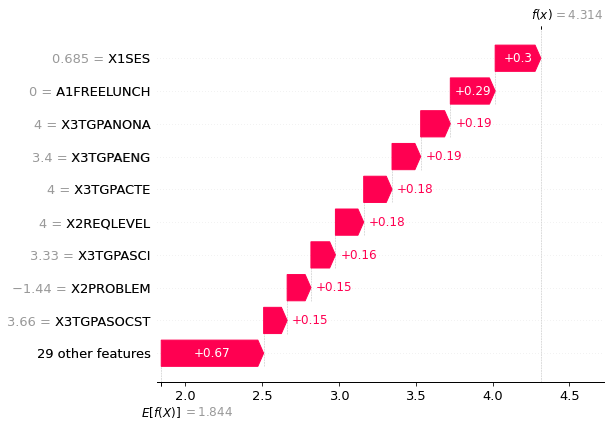

In [1304]:
shap.plots.waterfall(shap_values[0])

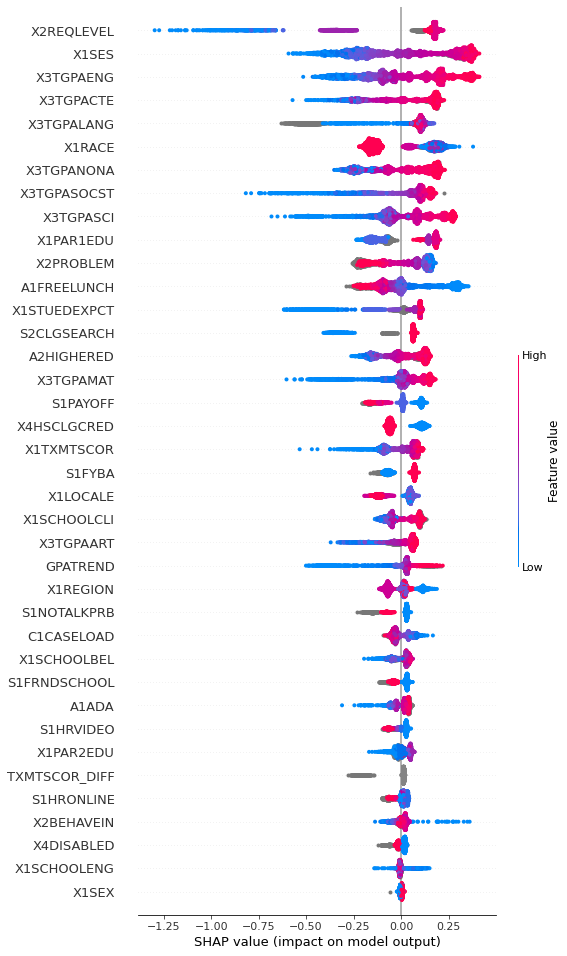

In [1294]:
shap.plots.beeswarm(shap_values, max_display=38)

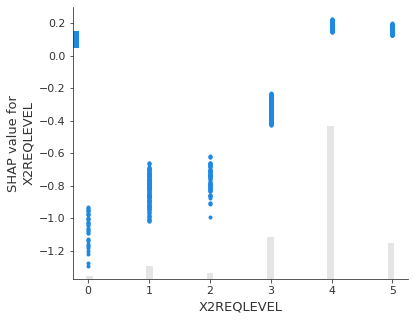

In [1288]:
shap.plots.scatter(shap_values[:, 'X2REQLEVEL'])

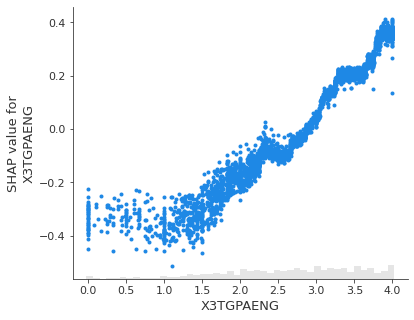

In [1296]:
shap.plots.scatter(shap_values[:, 'X3TGPAENG'])

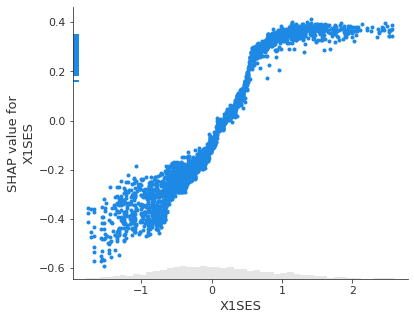

In [1295]:
shap.plots.scatter(shap_values[:, 'X1SES'])

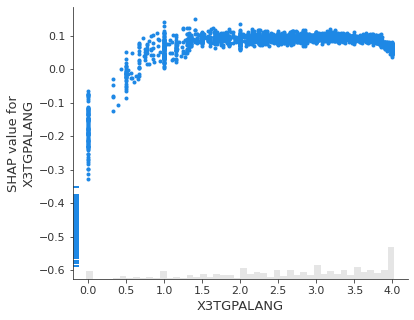

In [858]:
shap.plots.scatter(shap_values[:, 'X3TGPALANG'])

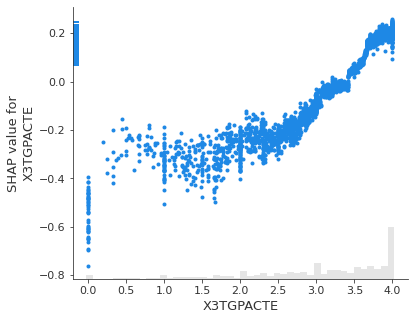

In [859]:
shap.plots.scatter(shap_values[:, 'X3TGPACTE'])

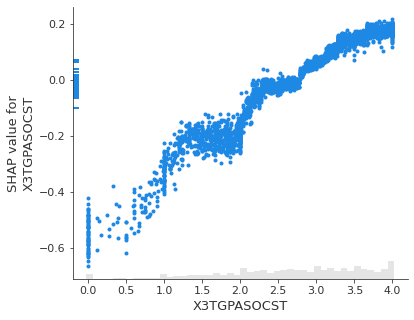

In [860]:
shap.plots.scatter(shap_values[:, 'X3TGPASOCST'])

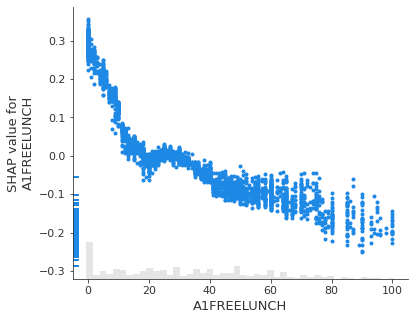

In [1297]:
shap.plots.scatter(shap_values[:, 'A1FREELUNCH'])

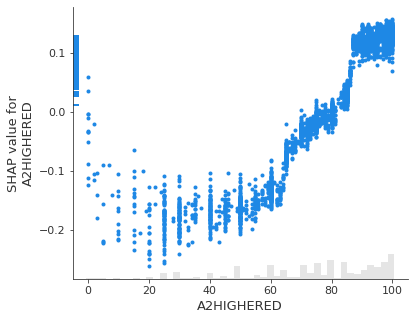

In [1298]:
shap.plots.scatter(shap_values[:, 'A2HIGHERED'])

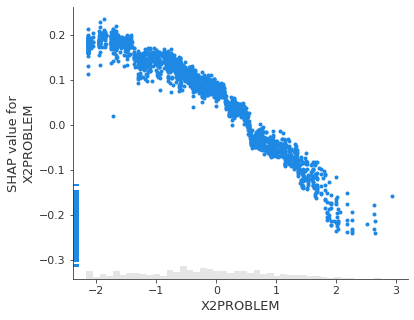

In [845]:
shap.plots.scatter(shap_values[:, 'X2PROBLEM'])

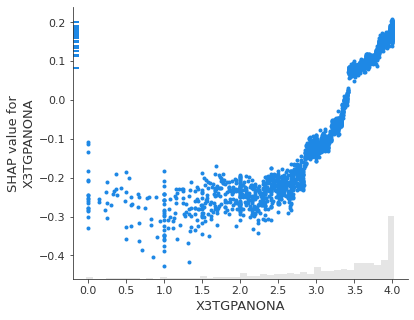

In [846]:
shap.plots.scatter(shap_values[:, 'X3TGPANONA'])

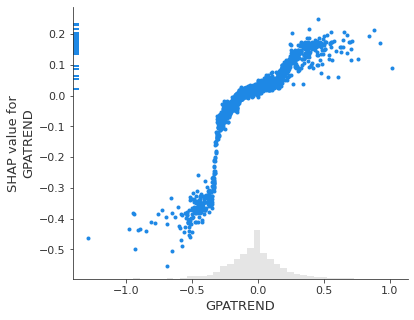

In [847]:
shap.plots.scatter(shap_values[:, 'GPATREND'])

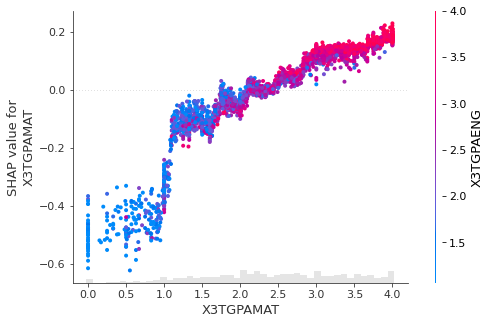

In [848]:
shap.plots.scatter(shap_values[:, 'X3TGPAMAT'], color=shap_values)

# TODO
1. get the explanatory variables (high school data)
    * maybe a correlation analysis could be done
2. Cluster the high schools, 4 types 
2. Target variables:
    1. Goes to college or not
    2. Given that they go to college, what type of college are they going
    3. Given that they go to college, are they choosing STEM as major or not

# Cluster analysis of high schools  

Variables to use:
* Race:
    * A1WHITESTU - White
    * A1HISPSTU - Hispanic/Latino/Latina origin
    * A1BLACKSTU - Black or African American
    * A1AMINDIANST - American Indian or Alaska Native
    * A1ASIANPISTU - Asian or Pacific Islander
* A1FREELUNCH - A1 B03A % of student body receiving free or reduced-price lunch
* C2PCTCALC - C2 C06A % 12th graders who have taken calculus
* C2PCTPHYS - C2 C06B % 12th graders who have taken physics
* C2PCTAP - C2 C09 % 12th graders who have taken in AP course(s)
* A2ELL - A2 B03B % of HS students who are limited English proficient
* A2MTHREQHS - A2 B17B Years of Mathematics coursework required for hs graduation 2012
* A2SCIREQHS - A2 B17C Years of Science coursework required for hs graduation 2012
* A2HIGHERED - A2 B19A % of 2010-2011 seniors entered higher education programs
* A14YRDEGREE - A1 B07A % of 08-09 seniors who went to 4-year Bachelor's-granting institution
* A12YRDEGREE - A1 B07B % of 08-09 seniors who went to Associates-granting/technical institution

Categorical?
* X1REGION or X1CENDIV for region

In [1032]:
vars_for_clust = ['A1WHITESTU', 'A1HISPSTU', 'A1BLACKSTU', 'A1AMINDIANST', 
                  'A1ASIANPISTU', 'A1FREELUNCH', 'C2PCTCALC', 'C2PCTPHYS', 
                  'C2PCTAP', 'A2ELL', 'A2MTHREQHS', 'A2SCIREQHS', 
                  'A2HIGHERED', 'A14YRDEGREE', 'A12YRDEGREE']

In [1033]:
from sklearn.cluster import KMeans

In [1037]:
schools = f2student2_raw[['SCH_ID']+vars_for_clust].replace([-4, -6,-7,-8,-9], np.nan).groupby('SCH_ID').mean().sort_values('SCH_ID')

In [1038]:
schools

,A1WHITESTU,A1HISPSTU,A1BLACKSTU,A1AMINDIANST,A1ASIANPISTU,A1FREELUNCH,C2PCTCALC,C2PCTPHYS,C2PCTAP,A2ELL,A2MTHREQHS,A2SCIREQHS,A2HIGHERED,A14YRDEGREE,A12YRDEGREE
SCH_ID,,,,,,,,,,,,,,,
1001,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,15.0,10.000000,6.0,5.0,50.411765,NaN,NaN
1002,96.0,2.0,1.0,0.0,1.0,38.0,10.0,5.0,10.0,1.076923,6.0,5.0,31.807692,20.0,50.0
1003,24.0,1.0,72.0,1.0,1.0,90.0,1.0,0.0,NaN,4.730769,NaN,5.0,31.192308,40.0,44.0
1004,79.0,14.0,5.0,0.0,2.0,0.0,15.0,50.0,30.0,5.000000,5.0,5.0,94.586207,82.0,13.0
1005,96.0,1.0,1.0,1.0,1.0,20.0,10.0,6.0,20.0,0.032258,5.0,5.0,56.645161,25.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940,35.0,51.0,8.0,NaN,7.0,36.0,45.0,100.0,55.0,5.000000,NaN,NaN,50.000000,55.0,25.0
1941,90.0,3.0,5.0,1.0,1.0,35.0,10.0,5.0,NaN,1.920000,6.0,5.0,57.640000,40.0,20.0
1942,97.0,2.0,1.0,0.0,0.0,18.0,11.0,39.0,24.0,1.535714,6.0,6.0,70.750000,41.0,31.0


In [1041]:
schools.isna().sum().sort_values()

A2HIGHERED        7
A2ELL             8
A2MTHREQHS       49
A2SCIREQHS       50
A1HISPSTU        78
A1WHITESTU       79
A1BLACKSTU       79
A1ASIANPISTU     80
A1AMINDIANST     83
C2PCTCALC        83
A1FREELUNCH      84
C2PCTPHYS        88
C2PCTAP         203
A12YRDEGREE     223
A14YRDEGREE     224
dtype: int64

In [1057]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler

In [1058]:
imp = IterativeImputer(max_iter=50,random_state=42)

In [1060]:
schools_imp = pd.DataFrame(MinMaxScaler().fit_transform(imp.fit_transform(schools)), index=schools.index, columns=schools.columns)

[IterativeImputer] Early stopping criterion not reached.


In [1061]:
schools_imp

,A1WHITESTU,A1HISPSTU,A1BLACKSTU,A1AMINDIANST,A1ASIANPISTU,A1FREELUNCH,C2PCTCALC,C2PCTPHYS,C2PCTAP,A2ELL,A2MTHREQHS,A2SCIREQHS,A2HIGHERED,A14YRDEGREE,A12YRDEGREE
SCH_ID,,,,,,,,,,,,,,,
1001,0.597549,0.221927,0.187614,0.026601,0.030250,0.587637,0.073884,0.078100,0.150000,0.117647,0.883560,0.643397,0.488781,0.276185,0.321774
1002,0.960000,0.074067,0.010000,0.009605,0.018843,0.448133,0.122627,0.078100,0.100000,0.012670,0.883560,0.643397,0.296987,0.180224,0.504004
1003,0.240000,0.064111,0.720000,0.019509,0.018843,0.910989,0.034889,0.029579,0.123776,0.055656,0.790404,0.643397,0.290642,0.360448,0.444485
1004,0.790000,0.193543,0.050000,0.009605,0.029281,0.109892,0.171370,0.514790,0.300000,0.058824,0.589040,0.643397,0.944188,0.738918,0.136968
1005,0.960000,0.064111,0.010000,0.019509,0.018843,0.287913,0.122627,0.087804,0.200000,0.000380,0.589040,0.643397,0.553043,0.225280,0.256007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940,0.350000,0.561924,0.080000,0.012337,0.081470,0.430331,0.463827,1.000000,0.550000,0.058824,0.711610,0.710820,0.484536,0.495616,0.256007
1941,0.900000,0.084024,0.050000,0.019509,0.018843,0.421430,0.122627,0.078100,0.201228,0.022588,0.883560,0.643397,0.563299,0.360448,0.206407
1942,0.970000,0.074067,0.010000,0.009605,0.008406,0.270111,0.132375,0.408043,0.240000,0.018067,0.883560,0.965095,0.698454,0.369459,0.315526


In [1062]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(schools_imp)

In [1067]:
schools_imp['Cluster'] = kmeans.labels_
schools_imp['Cluster'] = schools_imp['Cluster'].astype(str)

In [1068]:
schools_imp

,A1WHITESTU,A1HISPSTU,A1BLACKSTU,A1AMINDIANST,A1ASIANPISTU,A1FREELUNCH,C2PCTCALC,C2PCTPHYS,C2PCTAP,A2ELL,A2MTHREQHS,A2SCIREQHS,A2HIGHERED,A14YRDEGREE,A12YRDEGREE,Cluster
SCH_ID,,,,,,,,,,,,,,,,
1001,0.597549,0.221927,0.187614,0.026601,0.030250,0.587637,0.073884,0.078100,0.150000,0.117647,0.883560,0.643397,0.488781,0.276185,0.321774,3
1002,0.960000,0.074067,0.010000,0.009605,0.018843,0.448133,0.122627,0.078100,0.100000,0.012670,0.883560,0.643397,0.296987,0.180224,0.504004,2
1003,0.240000,0.064111,0.720000,0.019509,0.018843,0.910989,0.034889,0.029579,0.123776,0.055656,0.790404,0.643397,0.290642,0.360448,0.444485,3
1004,0.790000,0.193543,0.050000,0.009605,0.029281,0.109892,0.171370,0.514790,0.300000,0.058824,0.589040,0.643397,0.944188,0.738918,0.136968,0
1005,0.960000,0.064111,0.010000,0.019509,0.018843,0.287913,0.122627,0.087804,0.200000,0.000380,0.589040,0.643397,0.553043,0.225280,0.256007,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940,0.350000,0.561924,0.080000,0.012337,0.081470,0.430331,0.463827,1.000000,0.550000,0.058824,0.711610,0.710820,0.484536,0.495616,0.256007,0
1941,0.900000,0.084024,0.050000,0.019509,0.018843,0.421430,0.122627,0.078100,0.201228,0.022588,0.883560,0.643397,0.563299,0.360448,0.206407,2
1942,0.970000,0.074067,0.010000,0.009605,0.008406,0.270111,0.132375,0.408043,0.240000,0.018067,0.883560,0.965095,0.698454,0.369459,0.315526,2


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='A1FREELUNCH', ylabel='A2HIGHERED'>

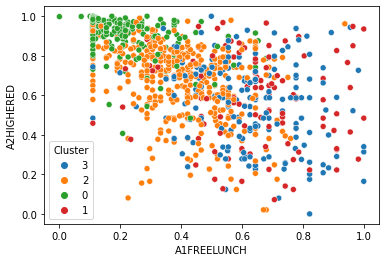

In [1073]:
sns.scatterplot('A1FREELUNCH', 'A2HIGHERED', hue='Cluster', data=schools_imp)

In [1110]:
temp = f2student2_raw[['STU_ID', 'SCH_ID', 'A1FREELUNCH', 'A2FREELUNCH', 'A2HIGHERED']].replace([-6,-7,-8,-9], np.nan).sort_values('SCH_ID')
temp

,STU_ID,SCH_ID,A1FREELUNCH,A2FREELUNCH,A2HIGHERED
3470,13471,1001,NaN,52.0,57.0
24270,34271,1001,NaN,55.0,50.0
6260,16261,1001,NaN,55.0,50.0
20324,30325,1001,NaN,55.0,50.0
24024,34025,1001,NaN,55.0,50.0
...,...,...,...,...,...
6972,16973,1944,10.0,1.0,99.0
6965,16966,1944,10.0,1.0,99.0
9609,19610,1944,10.0,1.0,99.0
15782,25783,1944,10.0,1.0,99.0


In [1111]:
f2student2_raw.SCH_ID.nunique()

944

In [1112]:
temp=temp.drop(columns=['STU_ID']).groupby('SCH_ID').mean().sort_values('SCH_ID')

In [1113]:
temp['A1FREELUNCH'] = temp['A1FREELUNCH'].fillna(temp.A2FREELUNCH)
temp = temp.drop(columns=['A2FREELUNCH'])

In [1114]:
temp

,A1FREELUNCH,A2HIGHERED
SCH_ID,,
1001,54.823529,50.411765
1002,38.000000,31.807692
1003,90.000000,31.192308
1004,0.000000,94.586207
1005,20.000000,56.645161
...,...,...
1940,36.000000,50.000000
1941,35.000000,57.640000
1942,18.000000,70.750000


In [1115]:
temp.isna().sum()

A1FREELUNCH    0
A2HIGHERED     7
dtype: int64

<AxesSubplot:ylabel='Density'>

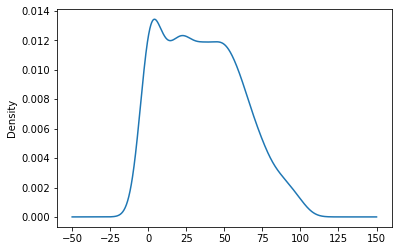

In [1116]:
temp.A1FREELUNCH.plot.kde()

<AxesSubplot:ylabel='Density'>

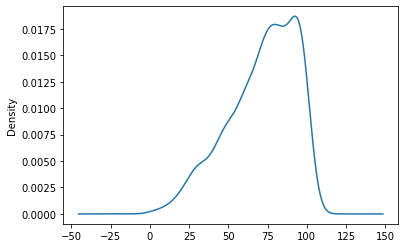

In [1117]:
temp.A2HIGHERED.plot.kde()

In [1118]:
temp['A1FREELUNCH_Q'] = pd.qcut(temp.A1FREELUNCH, 4, labels=False)
temp['A2HIGHERED_Q'] = pd.qcut(temp.A2HIGHERED, 4, labels=False)

In [1119]:
temp

,A1FREELUNCH,A2HIGHERED,A1FREELUNCH_Q,A2HIGHERED_Q
SCH_ID,,,,
1001,54.823529,50.411765,3,0.0
1002,38.000000,31.807692,2,0.0
1003,90.000000,31.192308,3,0.0
1004,0.000000,94.586207,0,3.0
1005,20.000000,56.645161,1,0.0
...,...,...,...,...
1940,36.000000,50.000000,2,0.0
1941,35.000000,57.640000,2,0.0
1942,18.000000,70.750000,1,1.0


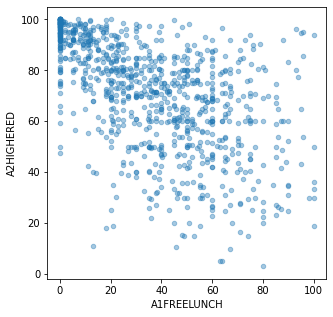

In [1120]:
temp.plot.scatter('A1FREELUNCH', 'A2HIGHERED', alpha=.4, figsize=(5,5))
plt.show()

In [1121]:
from sklearn.model_selection import cross_val_predict

In [1122]:
y_pred = cross_val_predict(model, X, y, cv=5, method='predict_proba')

In [1123]:
y_pred

array([[0.0224651 , 0.9775349 ],
       [0.04240699, 0.95759301],
       [0.03350539, 0.96649461],
       ...,
       [0.23298007, 0.76701993],
       [0.25828502, 0.74171498],
       [0.03140663, 0.96859337]])

In [1124]:
f2student2_clg['y_pred'] = y_pred.T[1]

In [1125]:
f2student2_clg

,X1SEX,X1RACE,X1TXMTSCOR,X1PAR1EDU,X1PAR2EDU,X1SES,X2PROBLEM,X2BEHAVEIN,X1STUEDEXPCT,X2REQLEVEL,...,X1REGION,A1FREELUNCH,A1ADA,C1CASELOAD,X1SCHOOLCLI,A2HIGHERED,X4EVRATNDCLG,GPATREND,TXMTSCOR_DIFF,y_pred
0,0.0,8.0,59.3710,5.0,5.0,1.5644,-2.14,-2.17,8.0,5.0,...,2,20.0,96.0,400.0,0.60,70.0,1.0,-0.005,0.0,0.977535
1,1.0,8.0,47.6821,3.0,2.0,-0.3699,-0.33,0.61,NaN,4.0,...,1,50.0,92.0,325.0,0.32,50.0,1.0,-0.024,0.0,0.957593
2,1.0,3.0,64.2431,7.0,NaN,1.2741,-1.01,0.52,10.0,4.0,...,4,24.0,94.0,515.0,-0.61,75.0,1.0,-0.239,0.0,0.966495
3,1.0,8.0,49.2690,4.0,NaN,0.5498,0.84,NaN,10.0,NaN,...,3,27.0,94.0,NaN,-2.14,50.0,0.0,0.025,NaN,0.963352
4,0.0,8.0,62.5897,4.0,NaN,0.1495,0.01,1.21,6.0,3.0,...,3,12.0,97.0,400.0,-0.65,95.0,0.0,-0.088,0.0,0.930560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25199,0.0,8.0,60.1506,7.0,2.0,1.2033,-0.40,0.74,4.0,4.0,...,3,5.0,90.0,185.0,0.84,99.0,1.0,NaN,0.0,0.987961
25202,1.0,5.0,46.0488,2.0,NaN,-1.2098,0.30,0.87,4.0,2.0,...,1,NaN,90.0,350.0,-0.80,75.0,0.0,-0.543,0.0,0.325869
25203,1.0,8.0,49.7801,2.0,2.0,-0.0649,NaN,0.89,10.0,4.0,...,2,0.0,97.0,220.0,1.33,92.0,1.0,-0.279,0.0,0.767020
25204,0.0,8.0,61.3193,5.0,NaN,0.8512,0.02,-0.23,6.0,3.0,...,2,3.0,94.0,350.0,-0.05,90.0,1.0,0.199,0.0,0.741715


In [1126]:
f2student2_clg['SCH_ID'] = f2student2_raw.loc[f2student2_clg.index]['SCH_ID']

In [1127]:
f2student2_clg = f2student2_clg.merge(temp, left_on='SCH_ID', right_index=True) 

In [1128]:
f2student2_clg

,X1SEX,X1RACE,X1TXMTSCOR,X1PAR1EDU,X1PAR2EDU,X1SES,X2PROBLEM,X2BEHAVEIN,X1STUEDEXPCT,X2REQLEVEL,...,A2HIGHERED_x,X4EVRATNDCLG,GPATREND,TXMTSCOR_DIFF,y_pred,SCH_ID,A1FREELUNCH_y,A2HIGHERED_y,A1FREELUNCH_Q,A2HIGHERED_Q
0,0.0,8.0,59.3710,5.0,5.0,1.5644,-2.14,-2.17,8.0,5.0,...,70.0,1.0,-0.005,0.0,0.977535,1723,20.0,69.428571,1,1.0
1874,0.0,8.0,59.9325,4.0,2.0,0.1574,-2.14,0.89,8.0,4.0,...,70.0,1.0,0.031,0.0,0.985983,1723,20.0,69.428571,1,1.0
2015,0.0,1.0,68.4763,5.0,NaN,0.6389,-2.14,-0.05,10.0,4.0,...,70.0,1.0,0.084,0.0,0.984083,1723,20.0,69.428571,1,1.0
2317,1.0,8.0,45.0899,4.0,2.0,0.1574,-2.14,0.74,NaN,4.0,...,70.0,1.0,-0.098,0.0,0.819922,1723,20.0,69.428571,1,1.0
4099,1.0,8.0,59.3969,3.0,3.0,-0.0817,-2.14,0.06,6.0,4.0,...,70.0,1.0,-0.117,0.0,0.969879,1723,20.0,69.428571,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20961,0.0,8.0,55.2405,2.0,2.0,-0.4763,0.93,-0.57,10.0,3.0,...,NaN,0.0,0.144,0.0,0.485962,1706,50.0,88.000000,2,2.0
20312,1.0,8.0,69.2818,5.0,5.0,1.4247,-2.14,0.70,6.0,5.0,...,100.0,1.0,0.004,0.0,0.987747,1031,0.0,100.000000,0,3.0
22823,1.0,8.0,53.7881,7.0,2.0,1.1049,-2.14,-0.17,4.0,4.0,...,100.0,1.0,-0.216,0.0,0.951988,1031,0.0,100.000000,0,3.0
20668,1.0,8.0,48.1055,4.0,2.0,0.2124,NaN,0.03,2.0,4.0,...,74.0,1.0,-0.189,0.0,0.826892,1786,0.0,74.000000,0,1.0


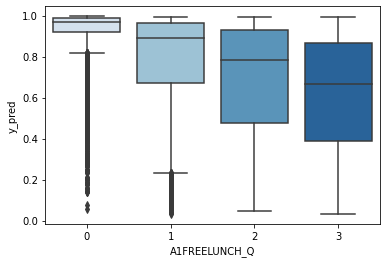

In [1129]:
sns.boxplot(x='A1FREELUNCH_Q', y='y_pred', data=f2student2_clg, palette='Blues')
plt.show()

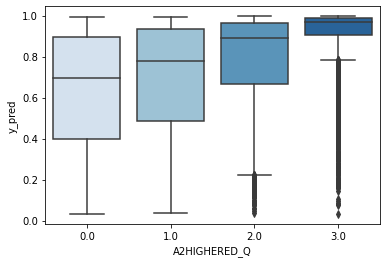

In [1130]:
sns.boxplot(x='A2HIGHERED_Q', y='y_pred', data=f2student2_clg, palette='Blues')
plt.show()

In [1131]:
temp.index.unique()

Int64Index([1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
            ...
            1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944],
           dtype='int64', name='SCH_ID', length=944)

(-0.1, 1.1)

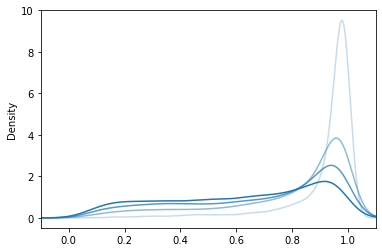

In [1132]:
alphas = [.25, .5, .75, 1]
for flcat in range(4):
    f2student2_clg[f2student2_clg.SCH_ID.isin(temp[temp.A1FREELUNCH_Q==flcat].index)]['y_pred'].plot.kde(color='tab:blue', alpha=alphas[flcat])
    
plt.xlim(-0.1, 1.1)

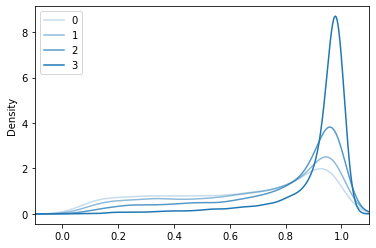

In [1133]:
alphas = [.25, .5, .75, 1]
for highered in range(4):
    f2student2_clg[f2student2_clg.SCH_ID.isin(temp[temp.A2HIGHERED_Q==highered].index)]['y_pred'].plot.kde(color='tab:blue', alpha=alphas[highered], label=highered)
    
plt.legend()
plt.xlim(-0.1, 1.1)
plt.show()

In [1134]:
f2student2_clg = f2student2_clg.merge(schools_imp, left_on='SCH_ID', right_index=True) 

In [1135]:
f2student2_clg

,X1SEX,X1RACE,X1TXMTSCOR,X1PAR1EDU,X1PAR2EDU,X1SES,X2PROBLEM,X2BEHAVEIN,X1STUEDEXPCT,X2REQLEVEL,...,C2PCTCALC,C2PCTPHYS,C2PCTAP,A2ELL,A2MTHREQHS,A2SCIREQHS,A2HIGHERED,A14YRDEGREE,A12YRDEGREE,Cluster
0,0.0,8.0,59.3710,5.0,5.0,1.5644,-2.14,-2.17,8.0,5.0,...,0.220113,0.126621,0.282829,0.005042,0.58904,0.643397,0.684831,0.468582,0.305606,2
1874,0.0,8.0,59.9325,4.0,2.0,0.1574,-2.14,0.89,8.0,4.0,...,0.220113,0.126621,0.282829,0.005042,0.58904,0.643397,0.684831,0.468582,0.305606,2
2015,0.0,1.0,68.4763,5.0,NaN,0.6389,-2.14,-0.05,10.0,4.0,...,0.220113,0.126621,0.282829,0.005042,0.58904,0.643397,0.684831,0.468582,0.305606,2
2317,1.0,8.0,45.0899,4.0,2.0,0.1574,-2.14,0.74,NaN,4.0,...,0.220113,0.126621,0.282829,0.005042,0.58904,0.643397,0.684831,0.468582,0.305606,2
4099,1.0,8.0,59.3969,3.0,3.0,-0.0817,-2.14,0.06,6.0,4.0,...,0.220113,0.126621,0.282829,0.005042,0.58904,0.643397,0.684831,0.468582,0.305606,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20961,0.0,8.0,55.2405,2.0,2.0,-0.4763,0.93,-0.57,10.0,3.0,...,0.073884,0.078100,0.250000,0.002477,0.58904,0.643397,0.876289,0.162202,0.226247,3
20312,1.0,8.0,69.2818,5.0,5.0,1.4247,-2.14,0.70,6.0,5.0,...,0.054386,0.039283,0.253589,0.352941,0.88356,0.965095,1.000000,0.518549,0.308706,3
22823,1.0,8.0,53.7881,7.0,2.0,1.1049,-2.14,-0.17,4.0,4.0,...,0.054386,0.039283,0.253589,0.352941,0.88356,0.965095,1.000000,0.518549,0.308706,3
20668,1.0,8.0,48.1055,4.0,2.0,0.2124,NaN,0.03,2.0,4.0,...,0.282641,0.373705,0.389680,0.047059,0.65885,0.588385,0.731959,0.622591,0.177978,0


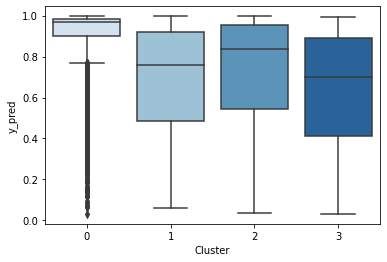

In [1300]:
sns.boxplot(x='Cluster', y='y_pred', data=f2student2_clg, palette='Blues', order=['0', '1', '2', '3'])
plt.show()

# Choses STEM as major 

In [1306]:
f2student2_selected.columns

Index(['X1SEX', 'X1RACE', 'X1TXMTSCOR', 'X1PAR1EDU', 'X1PAR2EDU', 'X1SES',
       'X2PROBLEM', 'X2BEHAVEIN', 'X1STUEDEXPCT', 'X2REQLEVEL', 'X3TGPAENG',
       'X3TGPAMAT', 'X3TGPASCI', 'X3TGPASOCST', 'X3TGPAART', 'X3TGPALANG',
       'X3TGPACTE', 'X3TGPANONA', 'X4HSCLGCRED', 'X4DISABLED', 'X1SCHOOLBEL',
       'X1SCHOOLENG', 'S1PAYOFF', 'S1NOTALKPRB', 'S1FRNDSCHOOL', 'S1HRVIDEO',
       'S1HRONLINE', 'S1FYBA', 'S2CLGSEARCH', 'X2MEFFORT', 'X2MTHID',
       'X2MTHUTI', 'X2MTHEFF', 'X2MTHINT_R', 'X2SEFFORT', 'X2SCIID',
       'X2SCIUTI', 'X2SCIEFF', 'X2SCIINT', 'S1NOMSACT', 'S1MTCHINTRST',
       'S1STCHINTRST', 'S1MTCHEASY', 'S1STCHEASY', 'S1TEFRNDS', 'S2MBORN',
       'S2SBORN', 'A1MTHSCIFAIR', 'A1MSSUMMER', 'A1MSSPEAKER', 'X1LOCALE',
       'X1REGION', 'A1FREELUNCH', 'A1ADA', 'C1CASELOAD', 'X1SCHOOLCLI',
       'A2HIGHERED', 'X4EVRATNDCLG', 'X4PS1SELECT', 'X4ENTMJST', 'GPATREND',
       'TXMTSCOR_DIFF'],
      dtype='object')

In [901]:
f2student2_stem = f2student2_selected[f2student2_selected.X4EVRATNDCLG==1]

In [902]:
f2student2_stem = f2student2_stem.drop(columns=['X4EVRATNDCLG', 'X4PS1SELECT', 'X1PAR2EDU'])

In [903]:
f2student2_stem

,X1SEX,X1RACE,X1TXMTSCOR,X1PAR1EDU,X1SES,X2PROBLEM,X2BEHAVEIN,X1STUEDEXPCT,X2REQLEVEL,X3TGPAENG,...,X1LOCALE,X1REGION,A1FREELUNCH,A1ADA,C1CASELOAD,X1SCHOOLCLI,A2HIGHERED,X4ENTMJST,GPATREND,TXMTSCOR_DIFF
0,0.0,8.0,59.3710,5.0,1.5644,-2.14,-2.17,8.0,5.0,2.69,...,4,2,20.0,96.0,400.0,0.60,70.0,NaN,-0.005,0.0
1,1.0,8.0,47.6821,3.0,-0.3699,-0.33,0.61,NaN,4.0,3.85,...,4,1,50.0,92.0,325.0,0.32,50.0,0.0,-0.024,0.0
2,1.0,3.0,64.2431,7.0,1.2741,-1.01,0.52,10.0,4.0,2.18,...,2,4,24.0,94.0,515.0,-0.61,75.0,1.0,-0.239,0.0
6,1.0,8.0,49.4960,2.0,-0.4300,-0.66,0.39,8.0,4.0,2.33,...,4,1,11.0,95.0,325.0,-0.66,85.0,0.0,0.006,0.0
7,0.0,8.0,54.6249,5.0,1.5144,NaN,0.61,8.0,4.0,3.08,...,3,1,32.0,92.0,250.0,-0.32,85.0,0.0,-0.202,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25197,0.0,8.0,66.0658,5.0,1.0526,-2.14,0.87,8.0,4.0,4.00,...,2,1,8.0,98.0,157.0,0.64,98.0,1.0,-0.041,0.0
25199,0.0,8.0,60.1506,7.0,1.2033,-0.40,0.74,4.0,4.0,3.76,...,4,3,5.0,90.0,185.0,0.84,99.0,0.0,NaN,0.0
25203,1.0,8.0,49.7801,2.0,-0.0649,NaN,0.89,10.0,4.0,2.54,...,1,2,0.0,97.0,220.0,1.33,92.0,0.0,-0.279,0.0
25204,0.0,8.0,61.3193,5.0,0.8512,0.02,-0.23,6.0,3.0,1.77,...,2,2,3.0,94.0,350.0,-0.05,90.0,0.0,0.199,0.0


In [904]:
f2student2_stem = f2student2_stem.dropna(subset=['X4ENTMJST'])

In [905]:
f2student2_stem.shape

(12134, 59)

In [906]:
f2student2_stem.dropna().shape

(1385, 59)

In [907]:
f2student2_stem.dropna(subset=['X3TGPAMAT', 'X3TGPAENG']).shape

(11549, 59)

In [908]:
f2student2_stem = f2student2_stem.dropna(subset=['X3TGPAMAT', 'X3TGPAENG'])

In [909]:
len(f2student2_stem)

11549

In [910]:
f2student2_stem.isna().sum().sort_values()

X4ENTMJST           0
X1REGION            0
X1LOCALE            0
X4HSCLGCRED         0
X3TGPAENG           0
X3TGPAMAT           0
X1SEX               1
X3TGPASCI          25
X3TGPASOCST        50
X3TGPANONA        127
GPATREND          208
X1RACE            446
TXMTSCOR_DIFF     556
X2REQLEVEL        605
S2CLGSEARCH       630
X1SES             773
S2MBORN           777
X2MTHID           781
X3TGPALANG        800
X2MTHUTI          807
S2SBORN           810
X2BEHAVEIN        820
X2SCIID           836
X1TXMTSCOR        847
X2SCIUTI          854
X2MTHEFF          870
A1FREELUNCH       908
X2SCIEFF          967
S1PAYOFF          999
S1FYBA           1004
S1NOMSACT        1010
X1SCHOOLENG      1039
S1TEFRNDS        1046
C1CASELOAD       1048
S1NOTALKPRB      1051
S1FRNDSCHOOL     1057
A2HIGHERED       1060
X4DISABLED       1123
X1SCHOOLBEL      1174
X3TGPACTE        1193
S1HRONLINE       1211
S1HRVIDEO        1361
X3TGPAART        1496
A1MTHSCIFAIR     1552
A1MSSUMMER       1552
A1MSSPEAKE

In [911]:
f2student2_stem['X1RACE'] = f2student2_stem['X1RACE'].astype(str).fillna('').copy()
f2student2_stem['X1LOCALE'] = f2student2_stem['X1LOCALE'].astype(str).fillna('').copy()
f2student2_stem['X1REGION'] = f2student2_stem['X1REGION'].astype(str).fillna('').copy()

In [912]:
X_stem = f2student2_stem[[col for col in f2student2_stem if col !='X4ENTMJST']]
y_stem = f2student2_stem['X4ENTMJST']

In [913]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_stem, y_stem, test_size=.20, stratify=y_stem)

In [914]:
def objective(trial):

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "iterations": trial.suggest_int("iterations", 500, 2500),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.99),
        "depth": trial.suggest_int("depth", 1, 16),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        "nan_mode": trial.suggest_categorical("nan_mode", ['Min', 'Max']),
        "used_ram_limit": "30gb",
        'verbose': False
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 20)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)
    
    if param["objective"] == "Logloss":
        param["auto_class_weights"] = trial.suggest_categorical("auto_class_weights", [None, 'Balanced', 'SqrtBalanced'])
    else:
        param["auto_class_weights"] = None

    gbm = CatBoostClassifier(**param)

    gbm.fit(X_train_s, y_train_s, eval_set=[(X_test_s, y_test_s)], verbose=0, early_stopping_rounds=100)

    preds = gbm.predict(X_test_s)
    pred_labels = np.rint(preds)
#     accuracy = accuracy_score(y_test, pred_labels)
    auc = roc_auc_score(y_test_s, gbm.predict_proba(X_test_s).T[1])
    return auc

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print(f"Number of finished trials: {len(study.trials)}")

print("Best trial:")
trial = study.best_trial

print(f"  Value: {trial.value}")

print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2022-06-20 14:05:44,277] A new study created in memory with name: no-name-c1832983-fbf2-44b7-b350-fe040fc2bcd2
[I 2022-06-20 14:07:41,020] Trial 0 finished with value: 0.7990369292593363 and parameters: {'objective': 'CrossEntropy', 'iterations': 1527, 'colsample_bylevel': 0.036058727010525024, 'depth': 15, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS', 'nan_mode': 'Max'}. Best is trial 0 with value: 0.7990369292593363.
[I 2022-06-20 14:08:14,017] Trial 1 finished with value: 0.7959902846101142 and parameters: {'objective': 'CrossEntropy', 'iterations': 1018, 'colsample_bylevel': 0.9271330200424936, 'depth': 11, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'nan_mode': 'Min', 'subsample': 0.6689867016989569}. Best is trial 0 with value: 0.7990369292593363.
[I 2022-06-20 14:08:17,072] Trial 2 finished with value: 0.8060020631731294 and parameters: {'objective': 'Logloss', 'iterations': 2370, 'colsample_bylevel': 0.37495903336168307, 'depth': 5, 'boosting_type': 'Plai

Number of finished trials: 100
Best trial:
  Value: 0.8079574586018152
  Params: 
    objective: Logloss
    iterations: 1363
    colsample_bylevel: 0.4373259942016522
    depth: 4
    boosting_type: Plain
    bootstrap_type: MVS
    nan_mode: Max
    auto_class_weights: None


In [917]:
model_stem = CatBoostClassifier(iterations=1363, depth=4, loss_function='Logloss',  colsample_bylevel=0.4373259942016522,
                                verbose=False, boosting_type='Plain', bootstrap_type='MVS', nan_mode='Max', #subsample=0.6446160228059471,
                                auto_class_weights=None,
                                cat_features=['X1RACE', 'X1LOCALE', 'X1REGION'])

In [918]:
cross_validate(model_stem, X_stem, y_stem, scoring=['roc_auc', 'average_precision'], cv=5)

{'fit_time': array([13.72815824, 13.84336638, 13.74959111, 13.84243774, 13.52877569]),
 'score_time': array([0.02504206, 0.02452183, 0.01601171, 0.01506138, 0.01562881]),
 'test_roc_auc': array([0.79273097, 0.7818281 , 0.8061416 , 0.78770039, 0.78828941]),
 'test_average_precision': array([0.58803699, 0.59302849, 0.60216728, 0.58095773, 0.59738785])}

In [919]:
Out[918]['test_roc_auc'].mean()

0.7913380944497025

In [920]:
y_stem.mean()

0.2650445926054204

In [966]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_stem, y_stem, test_size=.20, stratify=y_stem)

In [967]:
model_stem.fit(X_train_s, y_train_s, verbose=False)

In [968]:
model_stem.get_feature_importance(prettified=True)

,Feature Id,Importances
0,X2SCIID,11.188293
1,X1SEX,8.151139
2,X1TXMTSCOR,5.681932
3,X2MTHID,5.593807
4,X3TGPASCI,4.301482
5,X2SCIUTI,4.121583
6,X3TGPAMAT,3.066838
7,X2SCIINT,3.050570
8,X3TGPAENG,2.516563
9,X1RACE,2.377989


In [969]:
explainer_s = shap.Explainer(model_stem)
shap_values_s = explainer_s(X_test_s)

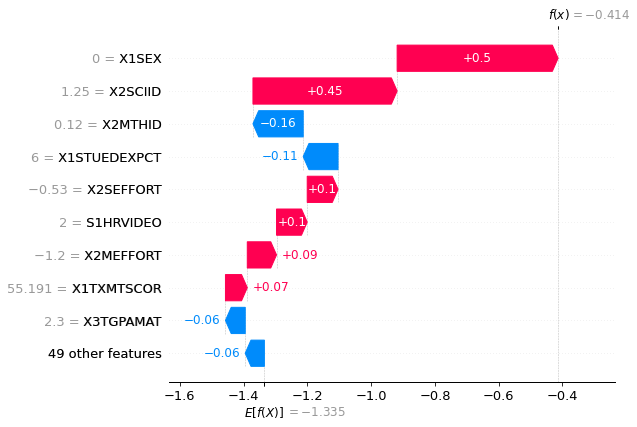

In [970]:
shap.plots.waterfall(shap_values_s[0])

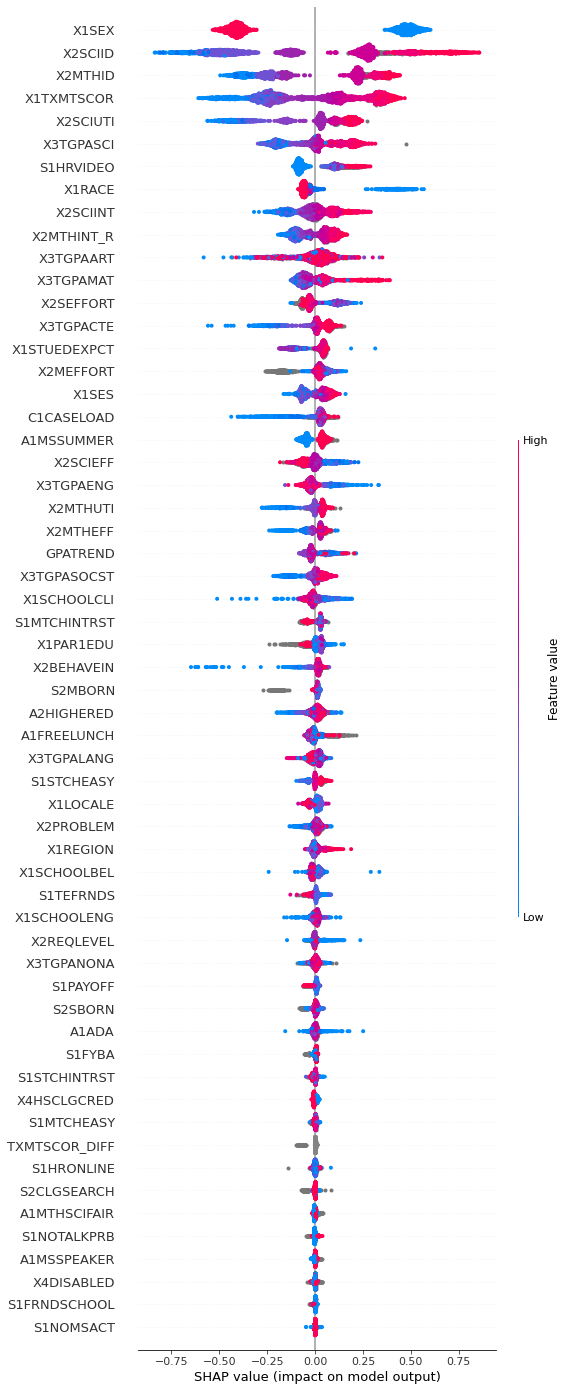

In [972]:
shap.plots.beeswarm(shap_values_s, max_display=60)

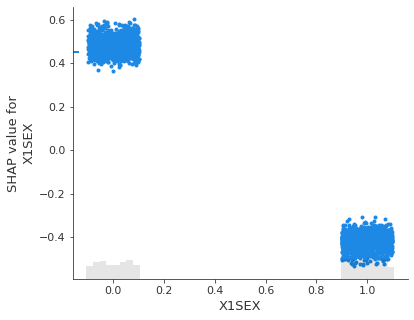

In [976]:
shap.plots.scatter(shap_values_s[:, 'X1SEX'])

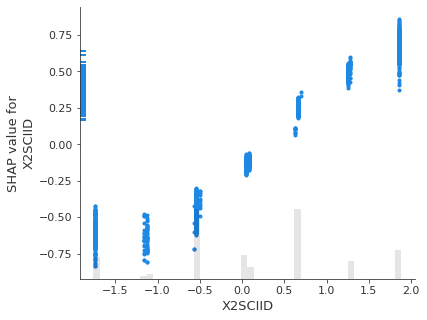

In [978]:
shap.plots.scatter(shap_values_s[:, 'X2SCIID'])

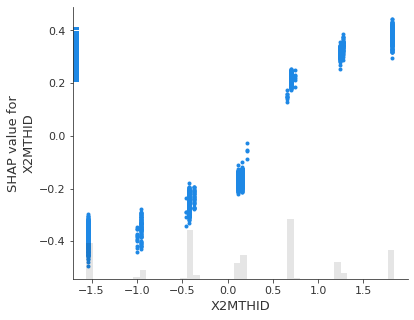

In [982]:
shap.plots.scatter(shap_values_s[:, 'X2MTHID'])

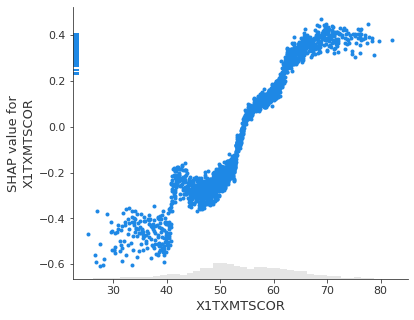

In [1301]:
shap.plots.scatter(shap_values_s[:, 'X1TXMTSCOR'])

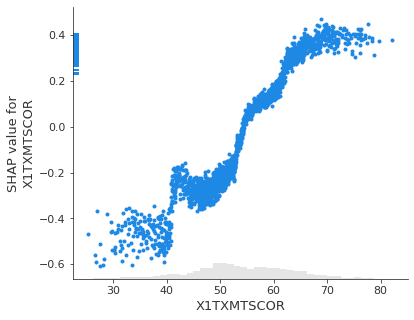

In [985]:
shap.plots.scatter(shap_values_s[:, 'X1TXMTSCOR'])

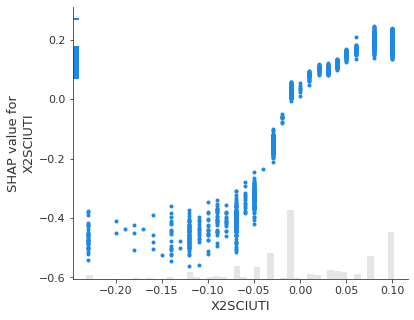

In [986]:
shap.plots.scatter(shap_values_s[:, 'X2SCIUTI'])

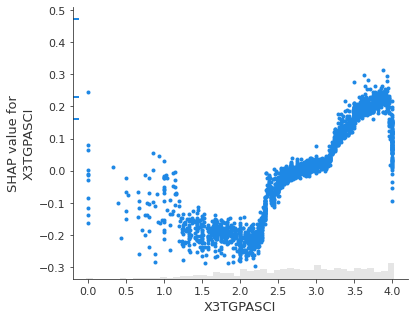

In [987]:
shap.plots.scatter(shap_values_s[:, 'X3TGPASCI'])

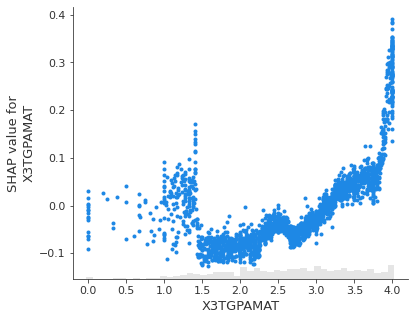

In [1002]:
shap.plots.scatter(shap_values_s[:, 'X3TGPAMAT'])

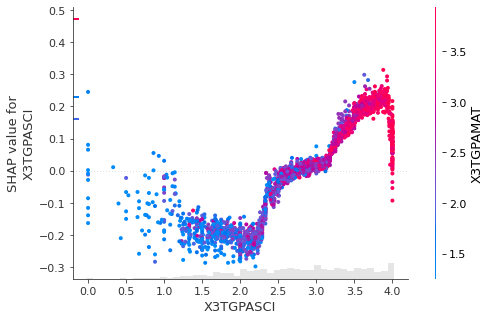

In [1004]:
shap.plots.scatter(shap_values_s[:, 'X3TGPASCI'], color=shap_values_s[:, 'X3TGPAMAT'])

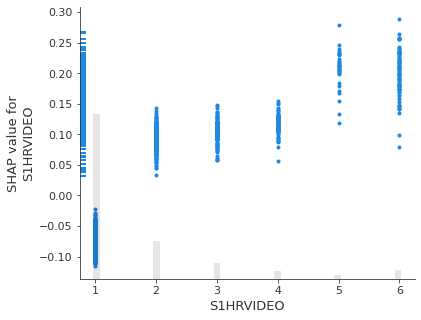

In [988]:
shap.plots.scatter(shap_values_s[:, 'S1HRVIDEO'])

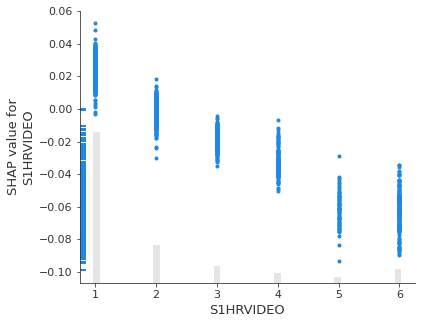

In [1302]:
shap.plots.scatter(shap_values[:, 'S1HRVIDEO'])

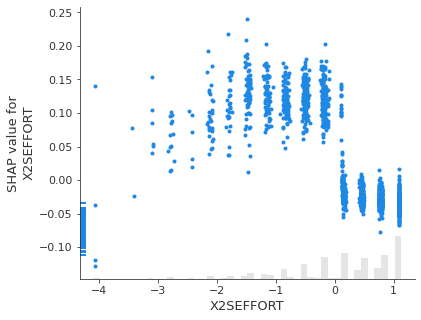

In [1023]:
shap.plots.scatter(shap_values_s[:, 'X2SEFFORT'])

In [1005]:
from sklearn.model_selection import cross_val_predict

In [1006]:
y_stem_pred = cross_val_predict(model_stem, X_stem, y_stem, cv=5, method='predict_proba')

In [1007]:
f2student2_stem['y_stem_pred'] = y_stem_pred.T[1]

In [1008]:
f2student2_stem

,X1SEX,X1RACE,X1TXMTSCOR,X1PAR1EDU,X1SES,X2PROBLEM,X2BEHAVEIN,X1STUEDEXPCT,X2REQLEVEL,X3TGPAENG,...,X1REGION,A1FREELUNCH,A1ADA,C1CASELOAD,X1SCHOOLCLI,A2HIGHERED,X4ENTMJST,GPATREND,TXMTSCOR_DIFF,y_stem_pred
1,1.0,8.0,47.6821,3.0,-0.3699,-0.33,0.61,NaN,4.0,3.85,...,1,50.0,92.0,325.0,0.32,50.0,0.0,-0.024,0.0,0.043618
2,1.0,3.0,64.2431,7.0,1.2741,-1.01,0.52,10.0,4.0,2.18,...,4,24.0,94.0,515.0,-0.61,75.0,1.0,-0.239,0.0,0.067411
6,1.0,8.0,49.4960,2.0,-0.4300,-0.66,0.39,8.0,4.0,2.33,...,1,11.0,95.0,325.0,-0.66,85.0,0.0,0.006,0.0,0.042432
7,0.0,8.0,54.6249,5.0,1.5144,NaN,0.61,8.0,4.0,3.08,...,1,32.0,92.0,250.0,-0.32,85.0,0.0,-0.202,0.0,0.287338
8,0.0,8.0,53.1875,2.0,-0.3103,0.59,0.34,NaN,4.0,2.75,...,3,71.0,93.0,350.0,-0.16,40.0,1.0,-0.157,0.0,0.330294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25197,0.0,8.0,66.0658,5.0,1.0526,-2.14,0.87,8.0,4.0,4.00,...,1,8.0,98.0,157.0,0.64,98.0,1.0,-0.041,0.0,0.811517
25199,0.0,8.0,60.1506,7.0,1.2033,-0.40,0.74,4.0,4.0,3.76,...,3,5.0,90.0,185.0,0.84,99.0,0.0,NaN,0.0,0.711002
25203,1.0,8.0,49.7801,2.0,-0.0649,NaN,0.89,10.0,4.0,2.54,...,2,0.0,97.0,220.0,1.33,92.0,0.0,-0.279,0.0,0.099227
25204,0.0,8.0,61.3193,5.0,0.8512,0.02,-0.23,6.0,3.0,1.77,...,2,3.0,94.0,350.0,-0.05,90.0,0.0,0.199,0.0,0.108108


In [1009]:
f2student2_stem['SCH_ID'] = f2student2_raw.loc[f2student2_stem.index]['SCH_ID']

In [1010]:
f2student2_stem = f2student2_stem.merge(temp, left_on='SCH_ID', right_index=True) 

In [1011]:
f2student2_stem

,X1SEX,X1RACE,X1TXMTSCOR,X1PAR1EDU,X1SES,X2PROBLEM,X2BEHAVEIN,X1STUEDEXPCT,X2REQLEVEL,X3TGPAENG,...,A2HIGHERED_x,X4ENTMJST,GPATREND,TXMTSCOR_DIFF,y_stem_pred,SCH_ID,A1FREELUNCH_y,A2HIGHERED_y,A1FREELUNCH_Q,A2HIGHERED_Q
1,1.0,8.0,47.6821,3.0,-0.3699,-0.33,0.61,NaN,4.0,3.85,...,50.0,0.0,-0.024000,0.0,0.043618,1024,50.0,50.789474,2,0.0
4473,0.0,8.0,47.0053,2.0,-0.6003,-0.33,NaN,8.0,5.0,2.91,...,50.0,0.0,0.062000,0.0,0.354290,1024,50.0,50.789474,2,0.0
4720,0.0,8.0,51.4931,2.0,-1.2450,-0.33,-0.02,10.0,4.0,2.70,...,50.0,0.0,0.101000,0.0,0.418925,1024,50.0,50.789474,2,0.0
14487,1.0,8.0,59.4278,5.0,0.0808,-0.33,1.03,8.0,5.0,4.00,...,50.0,0.0,0.035000,0.0,0.509112,1024,50.0,50.789474,2,0.0
15143,1.0,8.0,49.3417,2.0,-0.2245,-0.33,1.06,8.0,4.0,4.00,...,50.0,0.0,-0.022000,0.0,0.058147,1024,50.0,50.789474,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21933,1.0,5.0,37.4820,2.0,-0.0832,NaN,1.21,NaN,2.0,3.05,...,0.0,0.0,0.261333,0.0,0.060868,1353,0.0,59.166667,0,1.0
20312,1.0,8.0,69.2818,5.0,1.4247,-2.14,0.70,6.0,5.0,4.00,...,100.0,0.0,0.004000,0.0,0.093396,1031,0.0,100.000000,0,3.0
22823,1.0,8.0,53.7881,7.0,1.1049,-2.14,-0.17,4.0,4.0,2.98,...,100.0,0.0,-0.216000,0.0,0.036524,1031,0.0,100.000000,0,3.0
20400,1.0,8.0,41.2937,2.0,-0.4024,NaN,-0.07,10.0,3.0,1.00,...,NaN,0.0,0.000000,0.0,0.345226,1185,65.0,61.714286,3,1.0


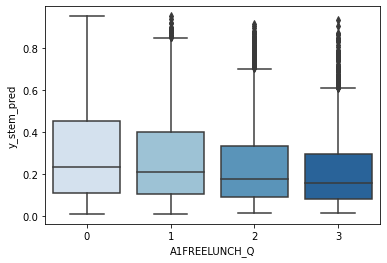

In [1012]:
sns.boxplot(x='A1FREELUNCH_Q', y='y_stem_pred', data=f2student2_stem, palette='Blues')
plt.show()

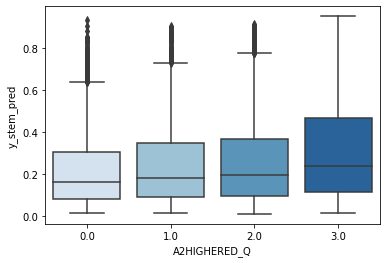

In [1013]:
sns.boxplot(x='A2HIGHERED_Q', y='y_stem_pred', data=f2student2_stem, palette='Blues')
plt.show()

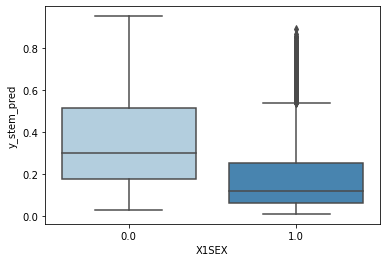

In [1014]:
sns.boxplot(x='X1SEX', y='y_stem_pred', data=f2student2_stem, palette='Blues')
plt.show()

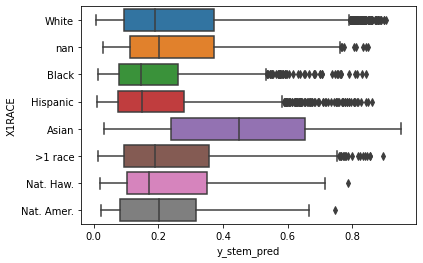

In [1022]:
sns.boxplot(y='X1RACE', x='y_stem_pred', data=f2student2_stem.replace(['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0'], 
                                                                      ['Nat. Amer.', 'Asian', 'Black', 'Hispanic', 'Hispanic', 
                                                                       '>1 race', 'Nat. Haw.', 'White']), orient='h')
plt.show()

In [737]:
temp.index.unique()

Int64Index([1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
            ...
            1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944],
           dtype='int64', name='SCH_ID', length=944)

In [1031]:
f2student2_stem[['X1RACE', 'X4ENTMJST', 'y_stem_pred']].replace(['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0'], 
                                                                ['Nat. Amer.', 'Asian', 'Black', 'Hispanic', 'Hispanic', 
                                                                 '>1 race', 'Nat. Haw.', 'White']).groupby('X1RACE').mean().sort_values('X4ENTMJST', ascending=False)

,X4ENTMJST,y_stem_pred
X1RACE,,
Asian,0.464920,0.454277
Nat. Haw.,0.285714,0.244114
White,0.254826,0.256701
Nat. Amer.,0.254545,0.240984
nan,0.251121,0.263667
>1 race,0.249198,0.248613
Hispanic,0.217666,0.204607
Black,0.194112,0.194541


In [1074]:
f2student2_stem = f2student2_stem.merge(schools_imp, left_on='SCH_ID', right_index=True) 

In [1075]:
f2student2_stem

,X1SEX,X1RACE,X1TXMTSCOR,X1PAR1EDU,X1SES,X2PROBLEM,X2BEHAVEIN,X1STUEDEXPCT,X2REQLEVEL,X3TGPAENG,...,C2PCTCALC,C2PCTPHYS,C2PCTAP,A2ELL,A2MTHREQHS,A2SCIREQHS,A2HIGHERED,A14YRDEGREE,A12YRDEGREE,Cluster
1,1.0,8.0,47.6821,3.0,-0.3699,-0.33,0.61,NaN,4.0,3.85,...,0.278604,0.369226,0.300000,0.001238,0.58904,0.643397,0.492675,0.450560,0.156807,2
4473,0.0,8.0,47.0053,2.0,-0.6003,-0.33,NaN,8.0,5.0,2.91,...,0.278604,0.369226,0.300000,0.001238,0.58904,0.643397,0.492675,0.450560,0.156807,2
4720,0.0,8.0,51.4931,2.0,-1.2450,-0.33,-0.02,10.0,4.0,2.70,...,0.278604,0.369226,0.300000,0.001238,0.58904,0.643397,0.492675,0.450560,0.156807,2
14487,1.0,8.0,59.4278,5.0,0.0808,-0.33,1.03,8.0,5.0,4.00,...,0.278604,0.369226,0.300000,0.001238,0.58904,0.643397,0.492675,0.450560,0.156807,2
15143,1.0,8.0,49.3417,2.0,-0.2245,-0.33,1.06,8.0,4.0,4.00,...,0.278604,0.369226,0.300000,0.001238,0.58904,0.643397,0.492675,0.450560,0.156807,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21933,1.0,5.0,37.4820,2.0,-0.0832,NaN,1.21,NaN,2.0,3.05,...,0.025141,0.029579,0.142573,0.006417,0.88356,0.643397,0.579038,0.225280,0.256007,2
20312,1.0,8.0,69.2818,5.0,1.4247,-2.14,0.70,6.0,5.0,4.00,...,0.054386,0.039283,0.253589,0.352941,0.88356,0.965095,1.000000,0.518549,0.308706,3
22823,1.0,8.0,53.7881,7.0,1.1049,-2.14,-0.17,4.0,4.0,2.98,...,0.054386,0.039283,0.253589,0.352941,0.88356,0.965095,1.000000,0.518549,0.308706,3
20400,1.0,8.0,41.2937,2.0,-0.4024,NaN,-0.07,10.0,3.0,1.00,...,0.025141,0.029579,0.118728,0.045752,0.88356,0.643397,0.605302,0.009011,0.841281,1


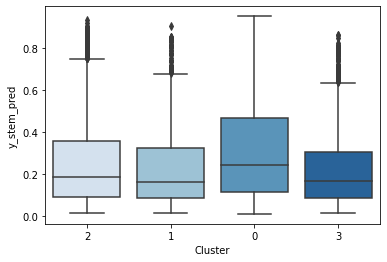

In [1076]:
sns.boxplot(x='Cluster', y='y_stem_pred', data=f2student2_stem, palette='Blues')
plt.show()

# Predict Math/sci identity

In [1303]:
f2student2_selected.columns

Index(['X1SEX', 'X1RACE', 'X1TXMTSCOR', 'X1PAR1EDU', 'X1PAR2EDU', 'X1SES',
       'X2PROBLEM', 'X2BEHAVEIN', 'X1STUEDEXPCT', 'X2REQLEVEL', 'X3TGPAENG',
       'X3TGPAMAT', 'X3TGPASCI', 'X3TGPASOCST', 'X3TGPAART', 'X3TGPALANG',
       'X3TGPACTE', 'X3TGPANONA', 'X4HSCLGCRED', 'X4DISABLED', 'X1SCHOOLBEL',
       'X1SCHOOLENG', 'S1PAYOFF', 'S1NOTALKPRB', 'S1FRNDSCHOOL', 'S1HRVIDEO',
       'S1HRONLINE', 'S1FYBA', 'S2CLGSEARCH', 'X2MEFFORT', 'X2MTHID',
       'X2MTHUTI', 'X2MTHEFF', 'X2MTHINT_R', 'X2SEFFORT', 'X2SCIID',
       'X2SCIUTI', 'X2SCIEFF', 'X2SCIINT', 'S1NOMSACT', 'S1MTCHINTRST',
       'S1STCHINTRST', 'S1MTCHEASY', 'S1STCHEASY', 'S1TEFRNDS', 'S2MBORN',
       'S2SBORN', 'A1MTHSCIFAIR', 'A1MSSUMMER', 'A1MSSPEAKER', 'X1LOCALE',
       'X1REGION', 'A1FREELUNCH', 'A1ADA', 'C1CASELOAD', 'X1SCHOOLCLI',
       'A2HIGHERED', 'X4EVRATNDCLG', 'X4PS1SELECT', 'X4ENTMJST', 'GPATREND',
       'TXMTSCOR_DIFF'],
      dtype='object')

In [1361]:
f2student2_msciid = f2student2_selected.drop(columns=['X4EVRATNDCLG', 'X4PS1SELECT', 'X4ENTMJST'])

In [1362]:
to_drop = ['X3TGPAENG', 'X3TGPAMAT', 'X3TGPASCI', 'X3TGPASOCST', 'X3TGPAART', 'GPATREND',
           'X3TGPALANG', 'X3TGPACTE', 'X3TGPANONA', 'X4HSCLGCRED', 'X4DISABLED','S1FYBA', 'S2CLGSEARCH', 
           'X2MTHEFF', 'X2MTHINT_R', 'X2SCIINT', 'X2SCIEFF', 'X2MTHUTI', 'X2SCIUTI']

In [1363]:
f2student2_msciid = f2student2_msciid.drop(columns=to_drop)

In [1364]:
f2student2_msciid

,X1SEX,X1RACE,X1TXMTSCOR,X1PAR1EDU,X1PAR2EDU,X1SES,X2PROBLEM,X2BEHAVEIN,X1STUEDEXPCT,X2REQLEVEL,...,A1MSSUMMER,A1MSSPEAKER,X1LOCALE,X1REGION,A1FREELUNCH,A1ADA,C1CASELOAD,X1SCHOOLCLI,A2HIGHERED,TXMTSCOR_DIFF
0,0.0,8.0,59.3710,5.0,5.0,1.5644,-2.14,-2.17,8.0,5.0,...,0.0,1.0,4,2,20.0,96.0,400.0,0.60,70.0,0.0
1,1.0,8.0,47.6821,3.0,2.0,-0.3699,-0.33,0.61,NaN,4.0,...,0.0,0.0,4,1,50.0,92.0,325.0,0.32,50.0,0.0
2,1.0,3.0,64.2431,7.0,NaN,1.2741,-1.01,0.52,10.0,4.0,...,0.0,0.0,2,4,24.0,94.0,515.0,-0.61,75.0,0.0
3,1.0,8.0,49.2690,4.0,NaN,0.5498,0.84,NaN,10.0,NaN,...,1.0,0.0,2,3,27.0,94.0,NaN,-2.14,50.0,NaN
4,0.0,8.0,62.5897,4.0,NaN,0.1495,0.01,1.21,6.0,3.0,...,1.0,1.0,1,3,12.0,97.0,400.0,-0.65,95.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25201,1.0,5.0,57.5729,NaN,NaN,0.0205,NaN,-0.58,10.0,3.0,...,0.0,0.0,2,3,65.0,95.0,370.0,-0.57,10.0,0.0
25202,1.0,5.0,46.0488,2.0,NaN,-1.2098,0.30,0.87,4.0,2.0,...,NaN,NaN,2,1,NaN,90.0,350.0,-0.80,75.0,0.0
25203,1.0,8.0,49.7801,2.0,2.0,-0.0649,NaN,0.89,10.0,4.0,...,0.0,1.0,1,2,0.0,97.0,220.0,1.33,92.0,0.0
25204,0.0,8.0,61.3193,5.0,NaN,0.8512,0.02,-0.23,6.0,3.0,...,1.0,1.0,2,2,3.0,94.0,350.0,-0.05,90.0,0.0


In [1365]:
f2student2_msciid[['X2MTHID', 'X2SCIID']].corr('spearman')

,X2MTHID,X2SCIID
X2MTHID,1.0000,0.2461
X2SCIID,0.2461,1.0000


<AxesSubplot:xlabel='X2MTHID', ylabel='X2SCIID'>

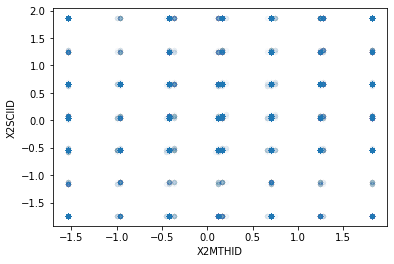

In [1366]:
f2student2_msciid[['X2MTHID', 'X2SCIID']].plot.scatter('X2MTHID', 'X2SCIID', alpha=.01)

<AxesSubplot:ylabel='Density'>

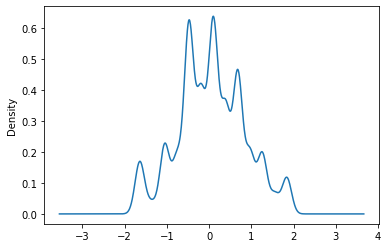

In [1367]:
f2student2_msciid[['X2MTHID', 'X2SCIID']].mean(axis=1).plot.kde()

<AxesSubplot:ylabel='Density'>

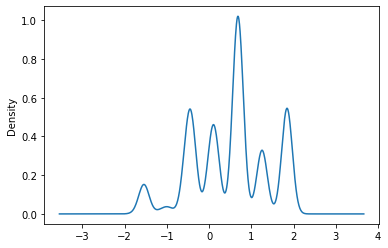

In [1368]:
f2student2_msciid[['X2MTHID', 'X2SCIID']].max(axis=1).plot.kde()

In [1369]:
f2student2_msciid = f2student2_msciid.dropna(subset=['X2MTHID', 'X2SCIID', 'X1SES', 'X1TXMTSCOR'])

In [1370]:
f2student2_msciid.shape

(17936, 40)

In [1371]:
f2student2_msciid.dropna(subset=['X1SES']).shape

(17936, 40)

In [1372]:
f2student2_msciid.isna().sum().sort_values()

X1SEX               0
X1REGION            0
X1LOCALE            0
X2SCIID             0
X2MTHID             0
TXMTSCOR_DIFF       0
X1TXMTSCOR          0
X1RACE              0
X1SES               0
X2REQLEVEL         60
S2MBORN            69
S2SBORN            84
S1NOMSACT         267
S1PAYOFF          307
S1TEFRNDS         399
X1SCHOOLENG       404
S1NOTALKPRB       426
S1FRNDSCHOOL      445
X2BEHAVEIN        479
X1SCHOOLBEL       584
S1HRONLINE        727
S1HRVIDEO         937
A1FREELUNCH      1458
C1CASELOAD       1567
A2HIGHERED       1723
S1MTCHEASY       1951
S1MTCHINTRST     1954
A1MSSPEAKER      2357
A1MTHSCIFAIR     2357
A1MSSUMMER       2357
X2MEFFORT        2787
S1STCHEASY       3199
S1STCHINTRST     3202
A1ADA            3211
X1SCHOOLCLI      3618
X1PAR1EDU        3622
X2PROBLEM        3630
X1STUEDEXPCT     3798
X2SEFFORT        4189
X1PAR2EDU        6578
dtype: int64

In [1373]:
f2student2_msciid['X1RACE'] = f2student2_msciid['X1RACE'].astype(str).fillna('').copy()
f2student2_msciid['X1LOCALE'] = f2student2_msciid['X1LOCALE'].astype(str).fillna('').copy()
f2student2_msciid['X1REGION'] = f2student2_msciid['X1REGION'].astype(str).fillna('').copy()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [1374]:
X_id = f2student2_msciid[[col for col in f2student2_msciid if col not in ['X2SCIID', 'X2MTHID']]]
y_mthid = f2student2_msciid['X2MTHID']
y_sciid = f2student2_msciid['X2SCIID']
y_id = f2student2_msciid[['X2MTHID', 'X2SCIID']]

In [1347]:
X_train_id, X_test_id, y_train_id, y_test_id = train_test_split(X_id, y_id, test_size=.20)

In [1349]:
from catboost import CatBoostRegressor

In [1350]:
from sklearn.metrics import mean_squared_error, r2_score

In [1351]:
def objective(trial):

    param = {
        "loss_function": trial.suggest_categorical("objective", ["RMSE", "MAE", "MAPE"]),
        "iterations": trial.suggest_int("iterations", 500, 2500),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.99),
        "depth": trial.suggest_int("depth", 1, 16),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        "nan_mode": trial.suggest_categorical("nan_mode", ['Min', 'Max']),
        "used_ram_limit": "30gb",
        'verbose': False
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 20)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)
    

    gbm = CatBoostRegressor(**param)

    gbm.fit(X_train_id, y_train_id['X2MTHID'], eval_set=[(X_test_id, y_test_id['X2MTHID'])], verbose=0, early_stopping_rounds=100)

    preds = gbm.predict(X_test_id)
    # pred_labels = np.rint(preds)
#     accuracy = accuracy_score(y_test, pred_labels)
    mse = mean_squared_error(y_test_id['X2MTHID'], preds)
    return mse

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)

print(f"Number of finished trials: {len(study.trials)}")

print("Best trial:")
trial = study.best_trial

print(f"  Value: {trial.value}")

print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2022-06-22 15:44:45,475] A new study created in memory with name: no-name-676871b2-4f38-40d2-b0ea-ec9ebc2d2ada
[I 2022-06-22 15:44:52,076] Trial 0 finished with value: 0.4871600712343354 and parameters: {'objective': 'RMSE', 'iterations': 1209, 'colsample_bylevel': 0.9346121508844351, 'depth': 8, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'nan_mode': 'Min', 'subsample': 0.3256186171948364}. Best is trial 0 with value: 0.4871600712343354.
[I 2022-06-22 15:50:15,845] Trial 1 finished with value: 0.5174471632956269 and parameters: {'objective': 'RMSE', 'iterations': 1573, 'colsample_bylevel': 0.8777956026414322, 'depth': 10, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'nan_mode': 'Min', 'bagging_temperature': 16.96428793459667}. Best is trial 0 with value: 0.4871600712343354.
[I 2022-06-22 16:35:34,959] Trial 2 finished with value: 0.5043069209015617 and parameters: {'objective': 'MAE', 'iterations': 1284, 'colsample_bylevel': 0.3521507195043906, 'depth': 15

KeyboardInterrupt: 

Trial 19 finished with value: 0.463728116512886 and parameters: {'objective': 'RMSE', 'iterations': 722, 'colsample_bylevel': 0.8082168815740043, 'depth': 10, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bernoulli', 'nan_mode': 'Max', 'subsample': 0.8307946584267557}. Best is trial 19 with value: 0.463728116512886.

In [1375]:
model_mid = CatBoostRegressor(iterations=772, depth=10, loss_function='RMSE',  colsample_bylevel=0.8082168815740043,
                                verbose=False, boosting_type='Ordered', bootstrap_type='Bernoulli', nan_mode='Max', subsample=0.8307946584267557,
                                cat_features=['X1RACE', 'X1LOCALE', 'X1REGION'])

In [1376]:
# cross_validate(model_stem, X_stem, y_stem, scoring=['roc_auc', 'average_precision'], cv=5)

In [1377]:
# Out[918]['test_roc_auc'].mean()

In [1378]:
X_train_id, X_test_id, y_train_id, y_test_id = train_test_split(X_id, y_id, test_size=.20)

In [1379]:
model_mid.fit(X_train_id, y_train_id['X2MTHID'], verbose=False)

In [1380]:
model_mid.get_feature_importance(prettified=True)

,Feature Id,Importances
0,X1TXMTSCOR,14.824068
1,X2MEFFORT,13.892279
2,S2MBORN,5.249699
3,X2BEHAVEIN,5.110762
4,X1SES,4.310726
5,X2SEFFORT,4.215058
6,X1SCHOOLBEL,3.963089
7,X1SCHOOLENG,3.827644
8,X1SCHOOLCLI,3.478199
9,X2PROBLEM,3.400095


In [1381]:
explainer_mid = shap.Explainer(model_mid)
shap_values_mid = explainer_mid(X_test_id)

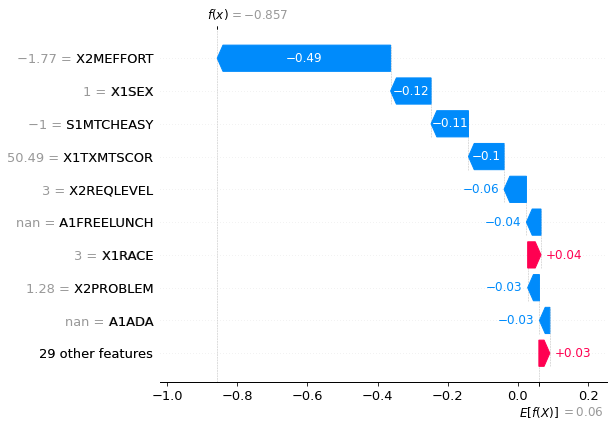

In [1382]:
shap.plots.waterfall(shap_values_mid[0])

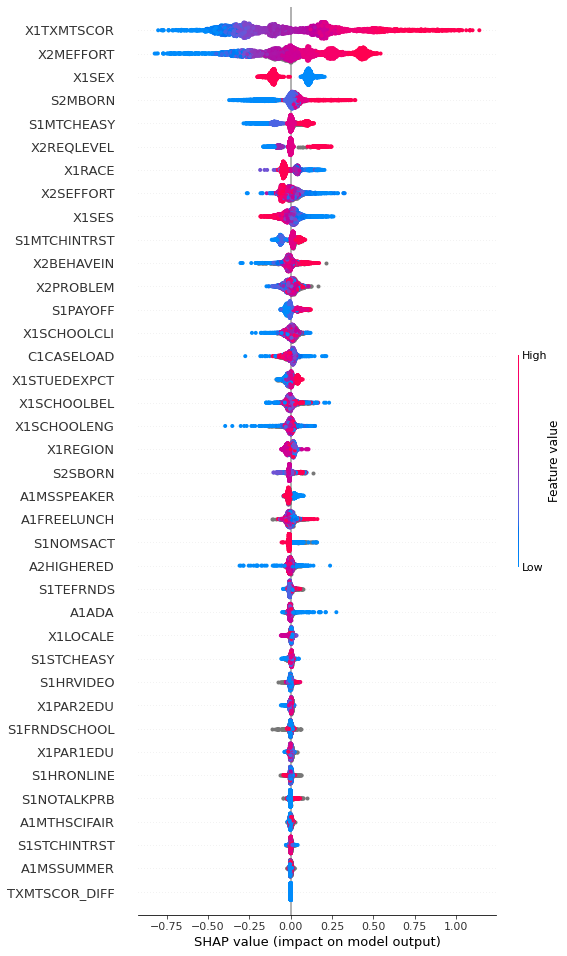

In [1383]:
shap.plots.beeswarm(shap_values_mid, max_display=50)

# CLG Selectivity 

In [1137]:
f2student2_selected.columns

Index(['X1SEX', 'X1RACE', 'X1TXMTSCOR', 'X1PAR1EDU', 'X1PAR2EDU', 'X1SES',
       'X2PROBLEM', 'X2BEHAVEIN', 'X1STUEDEXPCT', 'X2REQLEVEL', 'X3TGPAENG',
       'X3TGPAMAT', 'X3TGPASCI', 'X3TGPASOCST', 'X3TGPAART', 'X3TGPALANG',
       'X3TGPACTE', 'X3TGPANONA', 'X4HSCLGCRED', 'X4DISABLED', 'X1SCHOOLBEL',
       'X1SCHOOLENG', 'S1PAYOFF', 'S1NOTALKPRB', 'S1FRNDSCHOOL', 'S1HRVIDEO',
       'S1HRONLINE', 'S1FYBA', 'S2CLGSEARCH', 'X2MEFFORT', 'X2MTHID',
       'X2MTHUTI', 'X2MTHEFF', 'X2MTHINT_R', 'X2SEFFORT', 'X2SCIID',
       'X2SCIUTI', 'X2SCIEFF', 'X2SCIINT', 'S1NOMSACT', 'S1MTCHINTRST',
       'S1STCHINTRST', 'S1MTCHEASY', 'S1STCHEASY', 'S1TEFRNDS', 'S2MBORN',
       'S2SBORN', 'A1MTHSCIFAIR', 'A1MSSUMMER', 'A1MSSPEAKER', 'X1LOCALE',
       'X1REGION', 'A1FREELUNCH', 'A1ADA', 'C1CASELOAD', 'X1SCHOOLCLI',
       'A2HIGHERED', 'X4EVRATNDCLG', 'X4PS1SELECT', 'X4ENTMJST', 'GPATREND',
       'TXMTSCOR_DIFF'],
      dtype='object')

In [1171]:
f2student2_type = f2student2_selected[f2student2_selected.X4EVRATNDCLG==1]

In [1172]:
f2student2_type = f2student2_type.drop(columns=['X2MEFFORT', 'X2MTHID', 'X2MTHUTI', 'X2MTHEFF', 'X2MTHINT_R', 
                                                'X2SEFFORT', 'X2SCIID', 'X2SCIUTI', 'X2SCIEFF', 'X2SCIINT', 
                                                'S1NOMSACT', 'S1MTCHINTRST', 'S1STCHINTRST', 'S1MTCHEASY', 
                                                'S1STCHEASY', 'S1TEFRNDS', 'S2MBORN', 'S2SBORN', 'A1MTHSCIFAIR', 
                                                'A1MSSUMMER', 'A1MSSPEAKER','X4EVRATNDCLG', 'X1PAR2EDU'])

In [1173]:
f2student2_type

,X1SEX,X1RACE,X1TXMTSCOR,X1PAR1EDU,X1SES,X2PROBLEM,X2BEHAVEIN,X1STUEDEXPCT,X2REQLEVEL,X3TGPAENG,...,X1REGION,A1FREELUNCH,A1ADA,C1CASELOAD,X1SCHOOLCLI,A2HIGHERED,X4PS1SELECT,X4ENTMJST,GPATREND,TXMTSCOR_DIFF
0,0.0,8.0,59.3710,5.0,1.5644,-2.14,-2.17,8.0,5.0,2.69,...,2,20.0,96.0,400.0,0.60,70.0,1.0,NaN,-0.005,0.0
1,1.0,8.0,47.6821,3.0,-0.3699,-0.33,0.61,NaN,4.0,3.85,...,1,50.0,92.0,325.0,0.32,50.0,3.0,0.0,-0.024,0.0
2,1.0,3.0,64.2431,7.0,1.2741,-1.01,0.52,10.0,4.0,2.18,...,4,24.0,94.0,515.0,-0.61,75.0,2.0,1.0,-0.239,0.0
6,1.0,8.0,49.4960,2.0,-0.4300,-0.66,0.39,8.0,4.0,2.33,...,1,11.0,95.0,325.0,-0.66,85.0,1.0,0.0,0.006,0.0
7,0.0,8.0,54.6249,5.0,1.5144,NaN,0.61,8.0,4.0,3.08,...,1,32.0,92.0,250.0,-0.32,85.0,3.0,0.0,-0.202,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25197,0.0,8.0,66.0658,5.0,1.0526,-2.14,0.87,8.0,4.0,4.00,...,1,8.0,98.0,157.0,0.64,98.0,4.0,1.0,-0.041,0.0
25199,0.0,8.0,60.1506,7.0,1.2033,-0.40,0.74,4.0,4.0,3.76,...,3,5.0,90.0,185.0,0.84,99.0,3.0,0.0,NaN,0.0
25203,1.0,8.0,49.7801,2.0,-0.0649,NaN,0.89,10.0,4.0,2.54,...,2,0.0,97.0,220.0,1.33,92.0,3.0,0.0,-0.279,0.0
25204,0.0,8.0,61.3193,5.0,0.8512,0.02,-0.23,6.0,3.0,1.77,...,2,3.0,94.0,350.0,-0.05,90.0,1.0,0.0,0.199,0.0


In [1174]:
f2student2_type = f2student2_type.dropna(subset=['X4PS1SELECT'])

In [1175]:
f2student2_type.shape

(12957, 39)

In [1176]:
f2student2_type.dropna().shape

(2335, 39)

In [1177]:
f2student2_type.dropna(subset=['X3TGPAMAT', 'X3TGPAENG']).shape

(12317, 39)

In [1178]:
f2student2_type = f2student2_type.dropna(subset=['X3TGPAMAT', 'X3TGPAENG'])

In [1179]:
len(f2student2_type)

12317

In [1180]:
f2student2_type.isna().sum().sort_values()

X4PS1SELECT         0
X1REGION            0
X1LOCALE            0
X4HSCLGCRED         0
X3TGPAENG           0
X3TGPAMAT           0
X1SEX               1
X3TGPASCI          28
X3TGPASOCST        53
X3TGPANONA        135
GPATREND          223
X1RACE            472
TXMTSCOR_DIFF     582
X2REQLEVEL        632
S2CLGSEARCH       658
X1SES             824
X4ENTMJST         832
X2BEHAVEIN        864
X3TGPALANG        870
X1TXMTSCOR        905
A1FREELUNCH       985
S1FYBA           1063
S1PAYOFF         1063
X1SCHOOLENG      1112
S1NOTALKPRB      1118
S1FRNDSCHOOL     1124
C1CASELOAD       1124
A2HIGHERED       1133
X4DISABLED       1248
X1SCHOOLBEL      1249
X3TGPACTE        1251
S1HRONLINE       1294
S1HRVIDEO        1455
X3TGPAART        1589
X2PROBLEM        2259
A1ADA            2322
X1SCHOOLCLI      2517
X1PAR1EDU        2526
X1STUEDEXPCT     3075
dtype: int64

In [1248]:
f2student2_type['X1RACE'] = f2student2_type['X1RACE'].astype(str).fillna('').copy()
f2student2_type['X1LOCALE'] = f2student2_type['X1LOCALE'].astype(str).fillna('').copy()
f2student2_type['X1REGION'] = f2student2_type['X1REGION'].astype(str).fillna('').copy()
f2student2_type['X4PS1SELECT'] = f2student2_type['X4PS1SELECT'].astype(str).fillna('').copy()

In [1182]:
f2student2_type['X1RACE'] = f2student2_type['X1RACE'].replace('4.0', '5.0')

In [1249]:
X_type = f2student2_type[[col for col in f2student2_type if col !='X4PS1SELECT']]
y_type = f2student2_type['X4PS1SELECT']

In [1250]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_type, y_type, test_size=.20, stratify=y_type)

In [1251]:
from sklearn.metrics import accuracy_score

In [1252]:
model_type = CatBoostClassifier(loss_function='MultiClass')

In [1253]:
model_type.fit(X_train_t, y_train_t, verbose=False)

In [1254]:
accuracy_score(y_test_t, model_type.predict(X_test_t))

0.5637175324675324

In [ ]:
def objective(trial):

    param = {
        "objective": trial.suggest_categorical("objective", ["MultiClass"]),
        "iterations": trial.suggest_int("iterations", 500, 2500),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.99),
        "depth": trial.suggest_int("depth", 1, 16),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        # "nan_mode": trial.suggest_categorical("nan_mode", ['Min', 'Max']),
        "used_ram_limit": "30gb",
        'verbose': False
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 20)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)
    


    gbm = CatBoostClassifier(**param)

    gbm.fit(X_train_t, y_train_t, eval_set=[(X_test_t, y_test_t)], verbose=0, early_stopping_rounds=100)

    preds = gbm.predict(X_test_t)
    pred_labels = np.rint(preds)
#     accuracy = accuracy_score(y_test, pred_labels)
    acc = accuracy_score(y_test_t, preds)
    return acc

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print(f"Number of finished trials: {len(study.trials)}")

print("Best trial:")
trial = study.best_trial

print(f"  Value: {trial.value}")

print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

Trial 21 finished with value: 0.5762987012987013 and parameters: {'objective': 'MultiClass', 'iterations': 1757, 'colsample_bylevel': 0.3097003619855867, 'depth': 5, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.7249094684054292}. Best is trial 21 with value: 0.5762987012987013.

In [1255]:
model_type = CatBoostClassifier(loss_function='MultiClass', iterations=1757, depth=5, colsample_bylevel=0.3097003619855867, boosting_type='Plain', 
                                bootstrap_type='Bernoulli', subsample=0.7249094684054292, verbose=False, cat_features=['X1RACE', 'X1LOCALE', 'X1REGION'])

In [1202]:
cross_validate(model_type, X_type, y_type, scoring=['accuracy'], cv=5)

{'fit_time': array([28.42756271, 28.28745961, 27.57528019, 27.20132685, 26.84456515]),
 'score_time': array([0.02098942, 0.01851988, 0.02801919, 0.02551889, 0.01901531]),
 'test_accuracy': array([0.5726461 , 0.56696429, 0.54648802, 0.55704425, 0.5546082 ])}

In [1203]:
Out[1196]['test_accuracy'].mean()

0.5584943527848523

In [1200]:
f2student2_type['X4PS1SELECT'].unique()

array([1., 3., 2., 4.])

In [1256]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_type, y_type, test_size=.20, stratify=y_type)

In [1257]:
model_type.fit(X_train_t, y_train_t, verbose=False)

In [1258]:
model_type.get_feature_importance(prettified=True)

,Feature Id,Importances
0,X1TXMTSCOR,5.145416
1,A2HIGHERED,5.074890
2,X3TGPASCI,4.555032
3,A1FREELUNCH,4.312258
4,X1SES,4.254350
5,X1REGION,4.236843
6,X3TGPAENG,4.212973
7,C1CASELOAD,4.063523
8,X2PROBLEM,4.006057
9,X3TGPALANG,3.992472


In [1262]:
explainer_t = shap.Explainer(model_type)
shap_values_t = explainer_t(X_test_t)

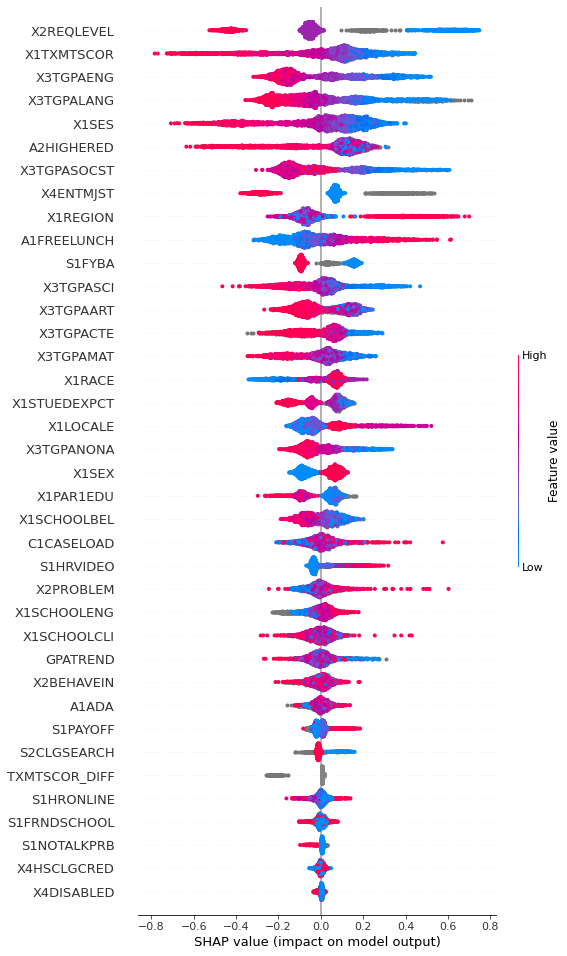

In [1265]:
shap.plots.beeswarm(shap_values_t[:,:,0], max_display=60)

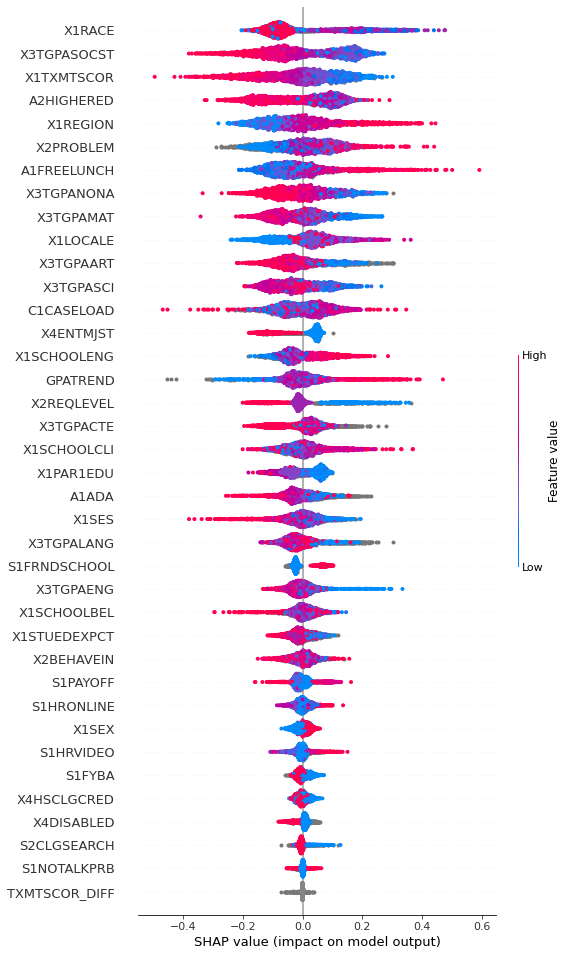

In [1231]:
shap.plots.beeswarm(shap_values_t[:,:,1], max_display=60)

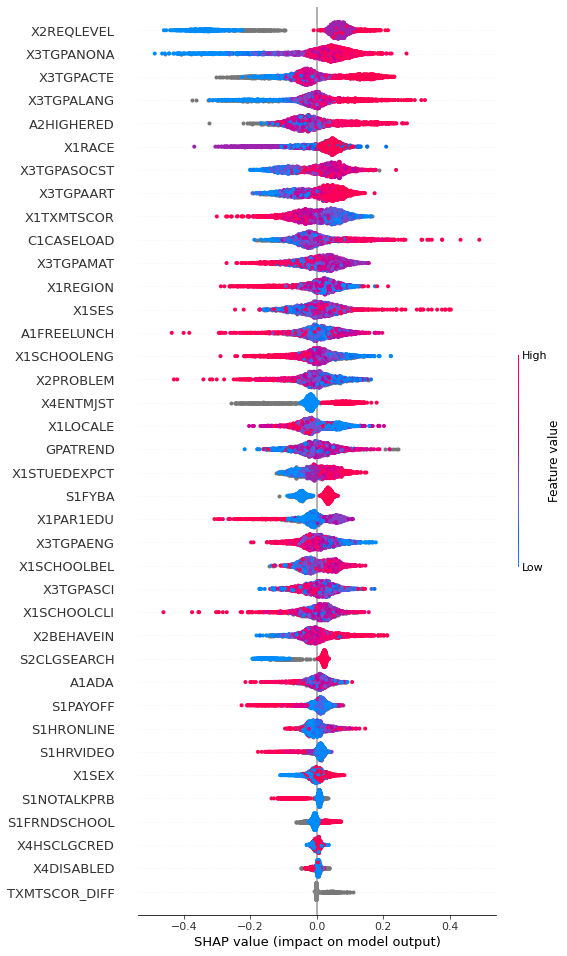

In [1237]:
shap.plots.beeswarm(shap_values_t[:,:,2], max_display=60)

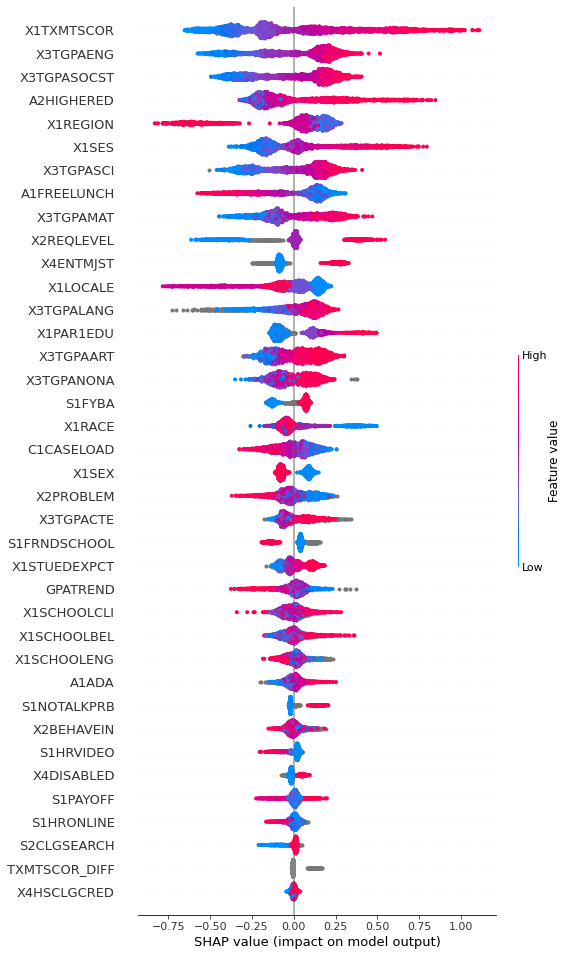

In [1240]:
shap.plots.beeswarm(shap_values_t[:,:,3], max_display=60)